In [1]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))


import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../Titanic prediction"]).decode("utf8"))

Python version: 3.6.8 |Anaconda, Inc.| (default, Dec 30 2018, 18:50:55) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.23.4
matplotlib version: 3.0.2
NumPy version: 1.16.0
SciPy version: 1.2.0
IPython version: 7.2.0
scikit-learn version: 0.20.2
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import catboost
from catboost import CatBoostClassifier, Pool, cv

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_validate

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode
from scipy.special import boxcox1p

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge, RidgeCV, ElasticNet
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import (RandomForestRegressor, AdaBoostRegressor, 
                              GradientBoostingRegressor)
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from catboost import Pool, CatBoostRegressor, cv

#Optimization Tools
from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from hyperopt import hp, tpe, STATUS_OK, Trials, fmin
from hyperopt.pyll import scope

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
data_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

In [4]:
data_raw.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
data_raw['Target'] = data_raw.Loan_Status.map({'Y':1, 'N':0})

In [6]:
print('Missing data in train set: \n', data_raw.isnull().sum())
print('-'*30)
print('Missing data in test set: \n', test_raw.isnull().sum())
print('-'*30)

Missing data in train set: 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Target                0
dtype: int64
------------------------------
Missing data in test set: 
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
------------------------------


# EDA

In [7]:
data_raw.drop(['Loan_ID','Loan_Status'],axis=1, inplace=True)

In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Target               614 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 57.6+ KB


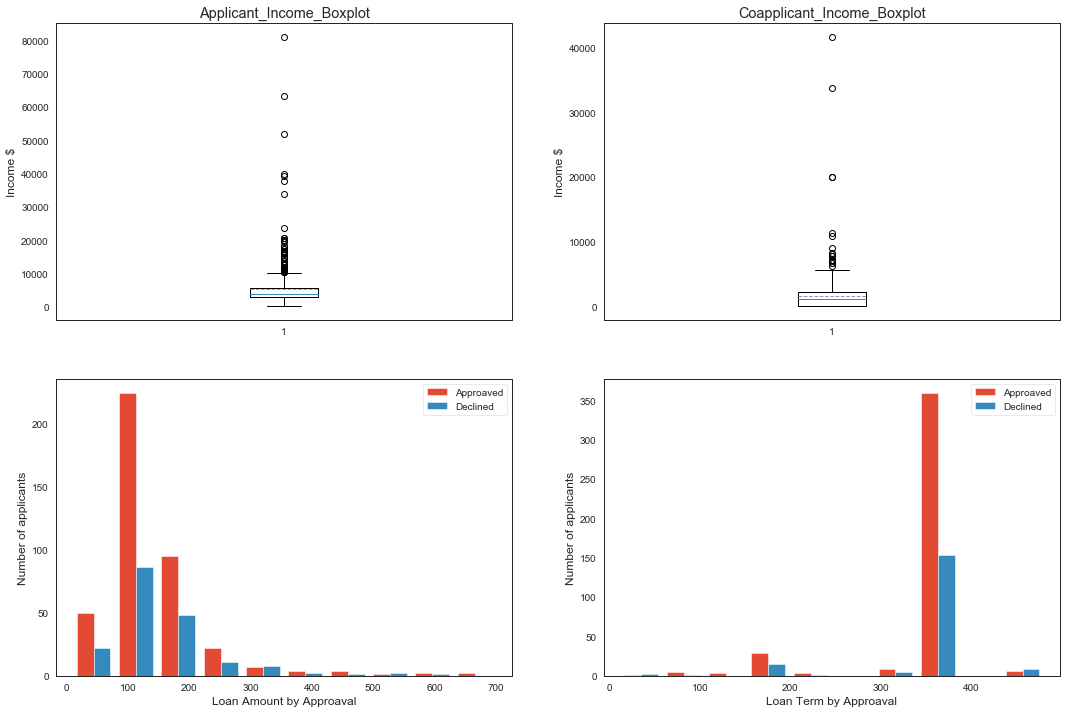

In [9]:
plt.figure(figsize=[18,12])

plt.subplot(221)
plt.boxplot(data_raw['ApplicantIncome'], showmeans=True, meanline=True)
plt.title('Applicant_Income_Boxplot')
plt.ylabel('Income $')

plt.subplot(222)
plt.boxplot(data_raw['CoapplicantIncome'], showmeans=True, meanline=True)
plt.title('Coapplicant_Income_Boxplot')
plt.ylabel('Income $')

plt.subplot(223)
plt.hist(x=[data_raw[data_raw.Target == 1].LoanAmount, data_raw[data_raw.Target == 0].LoanAmount], label=['Approaved', 'Declined'])
plt.xlabel('Loan Amount by Approaval')
plt.ylabel('Number of applicants')
plt.legend()

plt.subplot(224)
plt.hist(x=[data_raw[data_raw.Target == 1].Loan_Amount_Term, data_raw[data_raw.Target == 0].Loan_Amount_Term], label=['Approaved', 'Declined'])
plt.xlabel('Loan Term by Approaval')
plt.ylabel('Number of applicants')
plt.legend()

## Visualize application success rate by each variable

In [10]:
data_raw.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [11]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Target               614 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 57.6+ KB


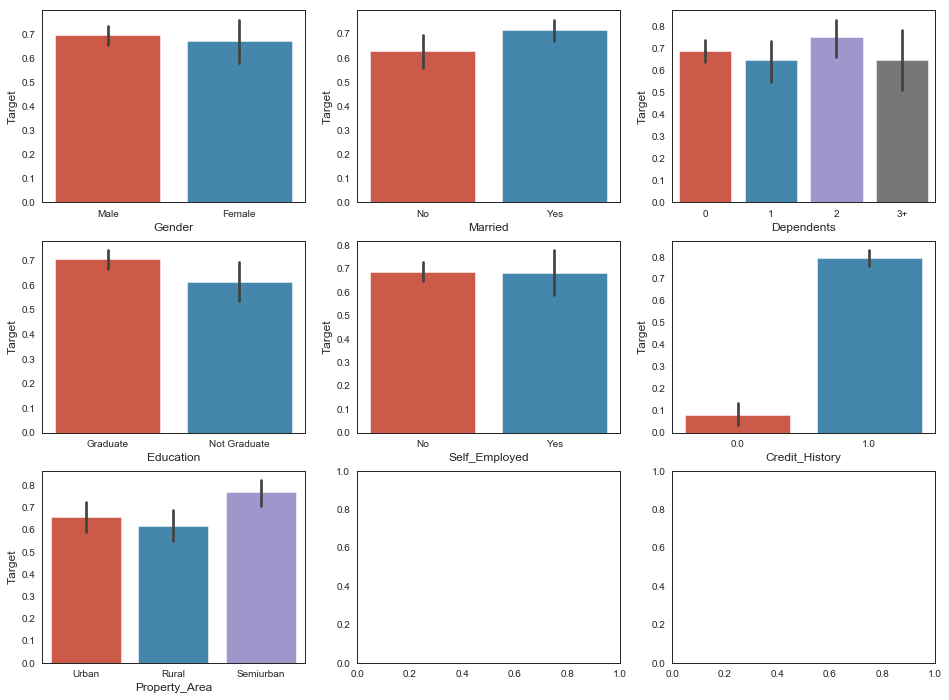

In [12]:
fig, axis = plt.subplots(3,3, figsize=(16,12))

sns.barplot(x='Gender', y='Target', data=data_raw, ax=axis[0,0])
sns.barplot(x='Married', y='Target', data=data_raw, ax=axis[0,1])
sns.barplot(x='Dependents', y='Target', data=data_raw, ax=axis[0,2])
sns.barplot(x='Education', y='Target', data=data_raw, ax=axis[1,0])
sns.barplot(x='Self_Employed', y='Target', data=data_raw, ax=axis[1,1])
sns.barplot(x='Credit_History', y='Target', data=data_raw, ax=axis[1,2])
sns.barplot(x='Property_Area', y='Target', data=data_raw, ax=axis[2,0]);



## Look at correlations

In [13]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.7 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':14 }
    )
    plt.title('Pearson Correlation of Features', y=1.05, size = 15)

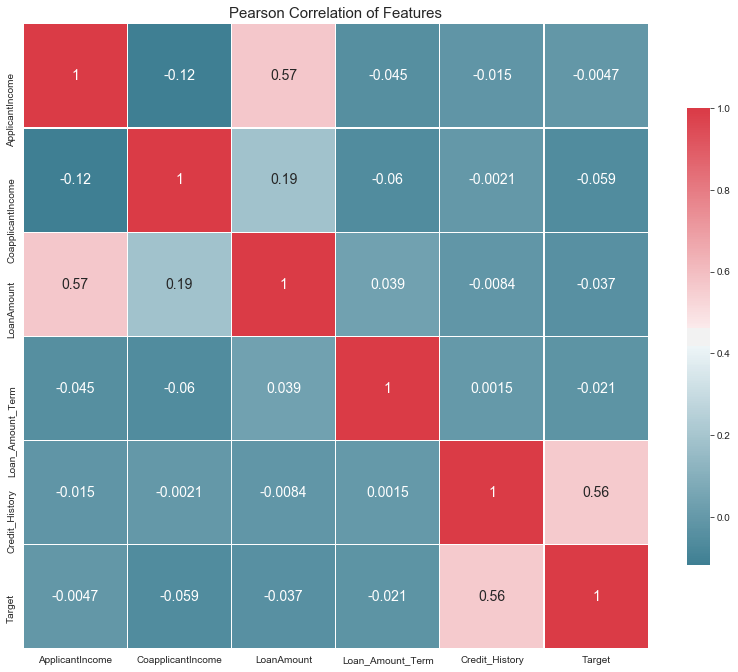

In [14]:
correlation_heatmap(data_raw)

In [15]:
data_raw.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Target'],
      dtype='object')

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

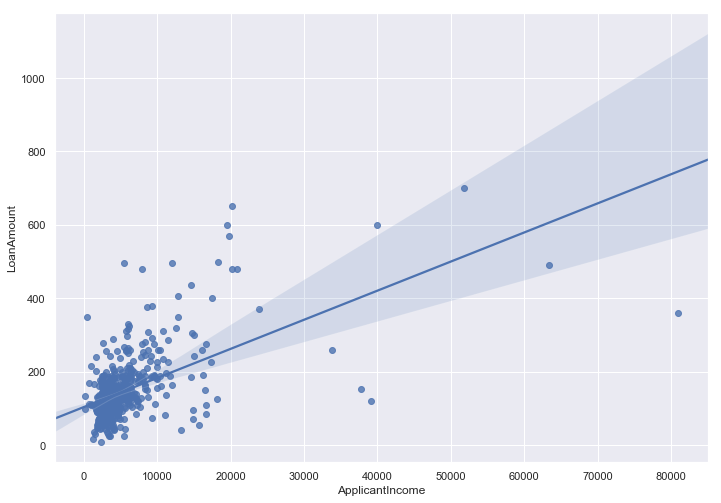

In [17]:
sns.regplot(y='LoanAmount', x='ApplicantIncome', data=data_raw)

In [18]:
data_raw[data_raw.LoanAmount>550]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,1
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,1
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1
369,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,0
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,1


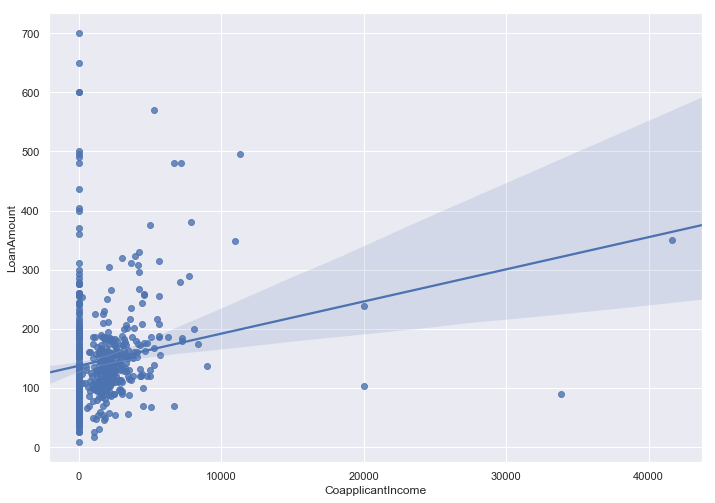

In [19]:
sns.regplot(y='LoanAmount', x='CoapplicantIncome', data=data_raw);

In [20]:
data_raw.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [21]:
data_raw.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Target                0
dtype: int64

In [22]:
data_raw.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [23]:
data_raw.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### Label encoding

In [24]:
data_together = [data_raw, test_raw]

In [25]:
for dataset in data_together:
    dataset['Tol_Income'] = dataset.ApplicantIncome+dataset.CoapplicantIncome

In [26]:
# label = LabelEncoder()
for dataset in data_together:
    dataset['Gender_Code'] = dataset.Gender.map({'Male':1, 'Female': 0})
    dataset['Married_Code'] = dataset.Married.map({'Yes':1, 'No': 0})
    dataset['Dependents_Code'] = dataset.Dependents.map({'0':0, '1': 1, '2':2, '3+':3})
    dataset['Education_Code'] = dataset.Education.map({'Graduate': 1, 'Not Graduate':0})
    dataset['Self_Employed_Code'] = dataset.Self_Employed.map({'No':0, 'Yes': 1})
    dataset['Property_Area_Code'] = dataset.Property_Area.map({'Rural':0, 'Urban': 2, 'Semiurban':1})

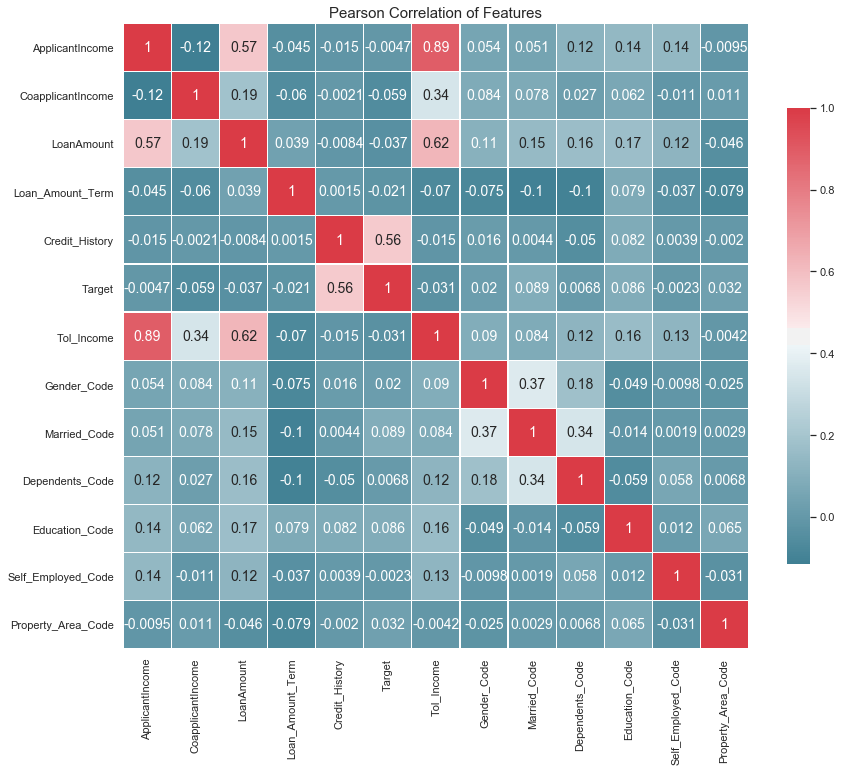

In [27]:
correlation_heatmap(data_raw)

## Deal with Missing Values

In [28]:
print(data_raw.isnull().sum(),"-"*30,test_raw.isnull().sum(), sep='\n')

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Target                 0
Tol_Income             0
Gender_Code           13
Married_Code           3
Dependents_Code       15
Education_Code         0
Self_Employed_Code    32
Property_Area_Code     0
dtype: int64
------------------------------
Loan_ID                0
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             5
Loan_Amount_Term       6
Credit_History        29
Property_Area          0
Tol_Income             0
Gender_Code           11
Married_Code           0
Dependents_Code       10
Education_Code         0
Self_Employed_Code    23
Property_Area_Code     0
dtype:

#### Gender is correlated with 'Married' & 'Dependents'

In [29]:
from fancyimpute import KNN
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [30]:
train_cl = data_raw.copy()
xgb = XGBClassifier(n_estimators=500)

In [31]:
train_cl.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target,Tol_Income,Gender_Code,Married_Code,Dependents_Code,Education_Code,Self_Employed_Code,Property_Area_Code
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0,1.0,0.0,0.0,1,0.0,2
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,1.0,1.0,1.0,1,0.0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,1.0,1.0,0.0,1,1.0,2
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,1.0,1.0,0.0,0,0.0,2
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,1.0,0.0,0.0,1,0.0,2


In [32]:
train_cl.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Target                  int64
Tol_Income            float64
Gender_Code           float64
Married_Code          float64
Dependents_Code       float64
Education_Code          int64
Self_Employed_Code    float64
Property_Area_Code      int64
dtype: object

## Transforming skewed feature variable

In [33]:
# Applying a log(1+x) transformation to all skewed numeric features
numeric_feats = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Tol_Income']

# Compute Their Skewness
skewed_feats = train_cl[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head()

,Skew
CoapplicantIncome,7.473217
ApplicantIncome,6.523526
Tol_Income,5.619677
LoanAmount,NaN
Loan_Amount_Term,NaN



 mu = 5403.46 and sigma = 6104.06



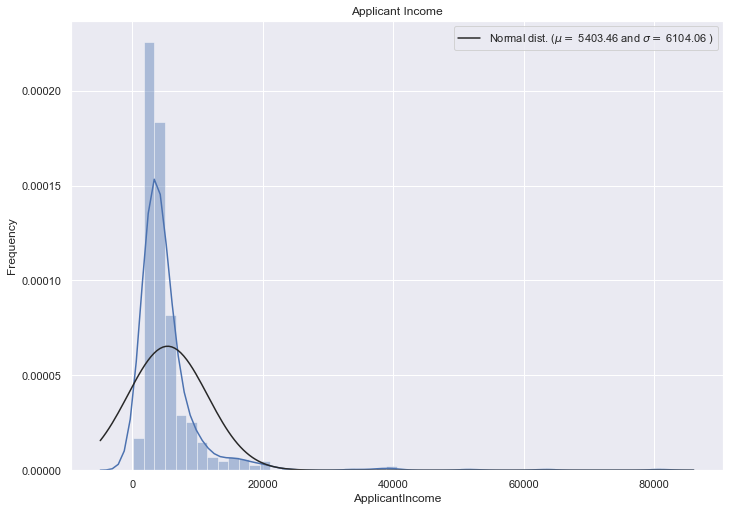

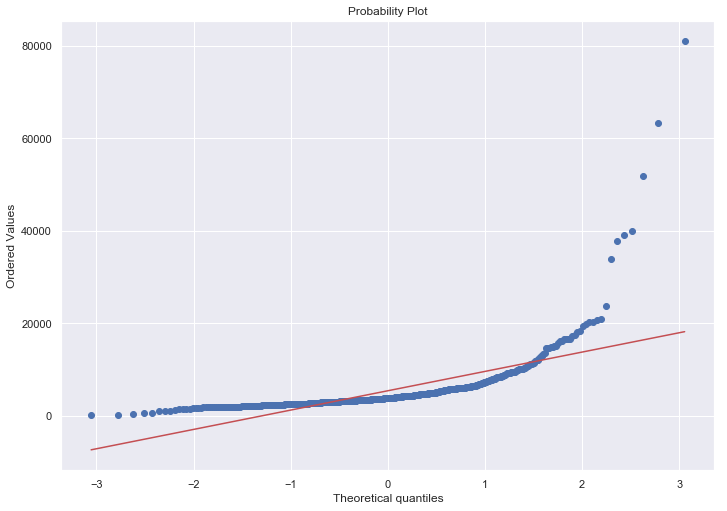

In [34]:
(mu, sigma) = norm.fit(train_cl.ApplicantIncome)

sns.distplot(train_cl.ApplicantIncome, fit=norm)
plt.ylabel('Frequency')
plt.title('Applicant Income')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)], loc='best')

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
fig = plt.figure()
res = stats.probplot(train_cl.ApplicantIncome, plot=plt)


In [35]:
temp = pd.DataFrame()

In [36]:
temp["Transformed"] = np.log1p(train_cl.ApplicantIncome)
train_cl.ApplicantIncome = np.log1p(train_cl.ApplicantIncome)


 mu = 8.34 and sigma = 0.64



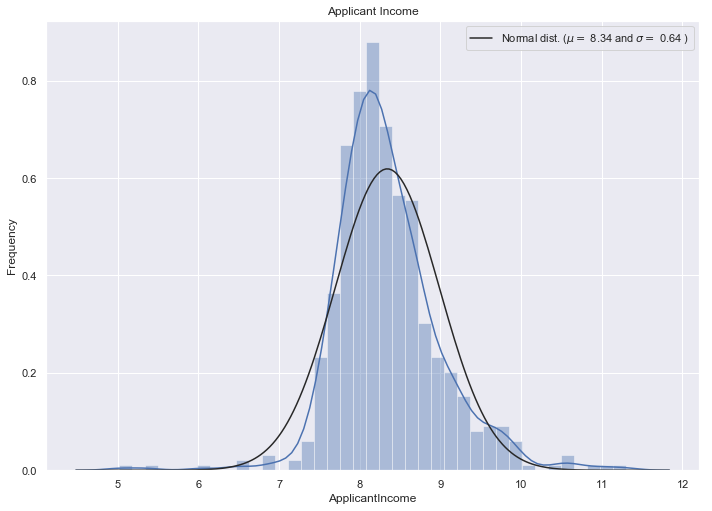

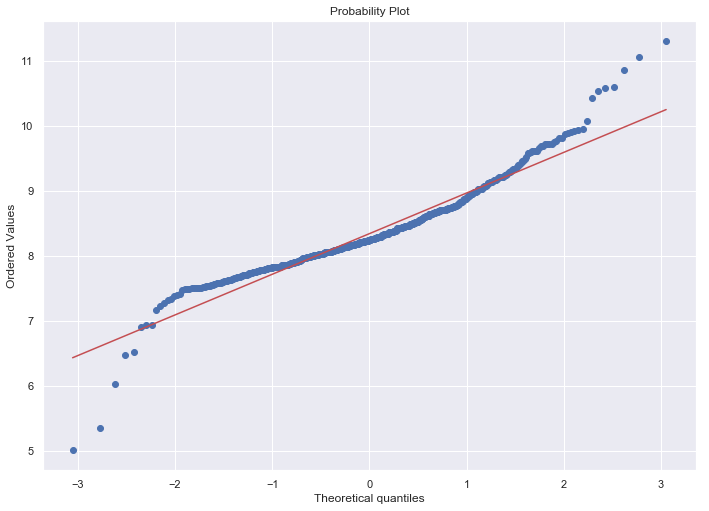

In [37]:
(mu, sigma) = norm.fit(train_cl.ApplicantIncome)

sns.distplot(train_cl.ApplicantIncome, fit=norm)
plt.ylabel('Frequency')
plt.title('Applicant Income')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)], loc='best')

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
fig = plt.figure()
res = stats.probplot(train_cl.ApplicantIncome, plot=plt)

In [38]:
skew(train_cl.Tol_Income)

5.619676668480719

In [39]:
train_cl.Tol_Income = np.log1p(train_cl.Tol_Income)
skew(train_cl.Tol_Income)

1.0744152503370539

In [40]:
def transform_skew(df=train_cl, column_name='ApplicantIncome'):
    (mu, sigma) = norm.fit(df[column_name])

    sns.distplot(df[column_name], fit=norm)
    plt.ylabel('Frequency')
    plt.title(column_name)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)], loc='best')

    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    fig = plt.figure()
    res = stats.probplot(df[column_name], plot=plt)
    
    df[column_name] = np.log1p(df[column_name])
    
    (mu, sigma) = norm.fit(df[column_name])

    sns.distplot(df[column_name], fit=norm)
    plt.ylabel('Frequency')
    plt.title(column_name)
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu,sigma)], loc='best')

    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    fig = plt.figure()
    res = stats.probplot(df[column_name], plot=plt)

In [41]:
scaler = MinMaxScaler()
column_name = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Tol_Income']

scaler.fit(train_cl[column_name])    
train_cl[column_name] = scaler.transform(train_cl[column_name])
test_raw[column_name] = scaler.transform(test_raw[column_name])

In [42]:
train_cl.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Target,Tol_Income,Gender_Code,Married_Code,Dependents_Code,Education_Code,Self_Employed_Code,Property_Area_Code
0,Male,No,0,Graduate,No,0.581854,0.000000,NaN,0.74359,1.0,Urban,1,0.347520,1.0,0.0,0.0,1,0.0,2
1,Male,Yes,1,Graduate,No,0.543052,0.036192,0.172214,0.74359,1.0,Rural,0,0.357583,1.0,1.0,1.0,1,0.0,0
2,Male,Yes,0,Graduate,Yes,0.475649,0.000000,0.082489,0.74359,1.0,Urban,1,0.181795,1.0,1.0,0.0,1,1.0,2
3,Male,Yes,0,Not Graduate,No,0.451844,0.056592,0.160637,0.74359,1.0,Urban,1,0.305642,1.0,1.0,0.0,0,0.0,2
4,Male,No,0,Graduate,No,0.585909,0.000000,0.191027,0.74359,1.0,Urban,1,0.353847,1.0,0.0,0.0,1,0.0,2


In [43]:
test_raw.drop(columns='Loan_ID',inplace=True)
test_raw.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Tol_Income,Gender_Code,Married_Code,Dependents_Code,Education_Code,Self_Employed_Code,Property_Area_Code
0,Male,Yes,0,Graduate,No,909.314250,0.000000,0.146165,0.74359,1.0,Urban,1418.346135,1.0,1,0.0,1,0.0,2
1,Male,Yes,1,Graduate,No,488.625860,0.036000,0.169320,0.74359,1.0,Urban,1134.315689,1.0,1,1.0,1,0.0,2
2,Male,Yes,2,Graduate,No,794.754628,0.043200,0.287988,0.74359,1.0,Urban,1686.486766,1.0,1,2.0,1,0.0,2
3,Male,Yes,2,Graduate,No,371.520469,0.061104,0.131693,0.74359,NaN,Urban,1211.281981,1.0,1,2.0,1,0.0,2
4,Male,No,0,Not Graduate,No,520.447977,0.000000,0.099855,0.74359,1.0,Urban,811.553818,1.0,0,0.0,0,0.0,2


Use XGBoost as baseline model

In [44]:
def find_KNN_parameter(impute=['Gender_Code'], related_col=[]):
    Xcol=related_col
    Ycol='Target'
    
    X = train_cl.loc[:,Xcol+impute]
    Y = train_cl.loc[:,Ycol]
    
    Xnorm = X
    
    kvals = np.linspace(10,80,20, dtype='int64')
    knn_errs = []
    for k in kvals:
        knn_err = []
        Xknn = KNN(k=k, verbose=False).fit_transform(Xnorm)
        knn_err = model_selection.cross_val_score(xgb, Xknn, Y, cv=10, n_jobs=-1).mean()

        knn_errs.append(knn_err)
#         print("[KNN] Estimated XGB Test Error (n = {}, k = {}, 10-fold CV): {}".format(len(Xknn), k, np.mean(knn_err)))
    
#     sns.set_style("darkgrid")
#     _ = plt.plot(kvals, knn_errs)
#     _ = plt.xlabel('K')
#     _ = plt.ylabel('10-fold CV Error Rate')

    knn_err = max(knn_errs)
    k_opt = kvals[knn_errs.index(knn_err)]

    Xknn = KNN(k=k_opt, verbose=False).fit_transform(Xnorm)
    Yknn = Y

    print("[BEST KNN] Estimated RF Test Error (n = {}, k = {}, 10-fold CV): {}".format(len(Xknn), k_opt, np.mean(knn_err)))
    
    return pd.DataFrame(Xknn).iloc[:,-1]

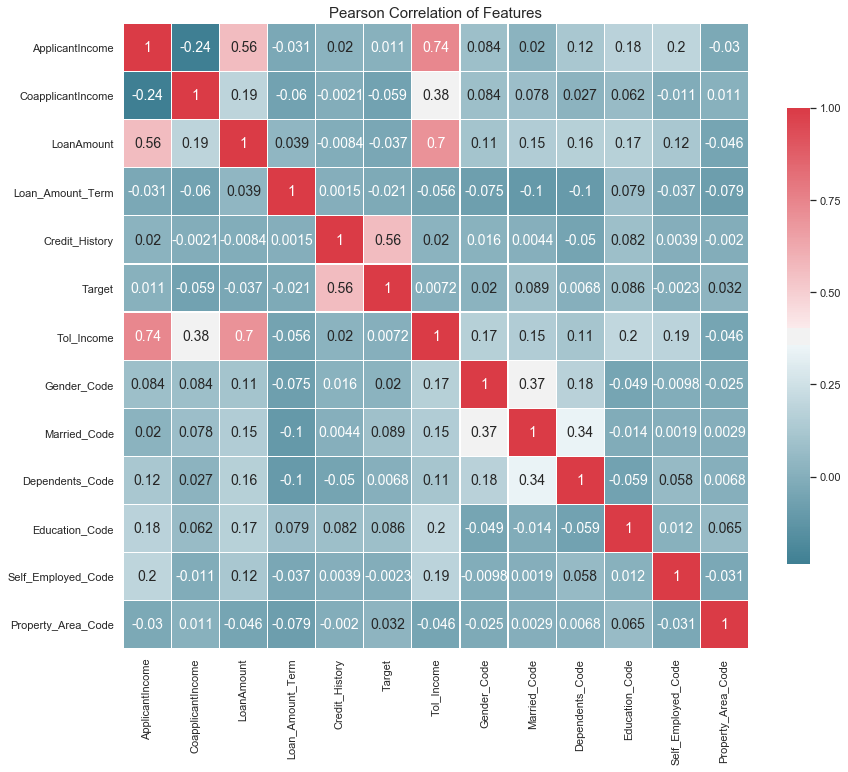

In [45]:
correlation_heatmap(train_cl)

## Impute both Gender_Code for Train and test

In [46]:
train_cl.Gender_Code = find_KNN_parameter(impute=['Gender_Code'], related_col=['Married_Code','Dependents_Code','Tol_Income'])

[BEST KNN] Estimated RF Test Error (n = 614, k = 13, 10-fold CV): 0.6105906843611761


In [47]:
test_raw.Gender_Code = pd.DataFrame(KNN(k=13, verbose=False).fit_transform(test_raw.loc[:,['Married_Code','Dependents_Code']+['Gender_Code']])).iloc[:,-1]

## Married is correlated with 'LoanAmount','Gender_Code','Dependent_Code'

In [48]:
train_cl.Married_Code = find_KNN_parameter(impute=['Married_Code'], related_col=['Gender_Code','Dependents_Code'])

[BEST KNN] Estimated RF Test Error (n = 614, k = 13, 10-fold CV): 0.6776476710902941


In [49]:
test_raw.Married_Code = pd.DataFrame(KNN(k=10, verbose=False).fit_transform(test_raw.loc[:,['Gender_Code','Dependents_Code']+['Married_Code']])).iloc[:,-1]

## Impute Dependets_Code for both

In [50]:
train_cl.Dependents_Code = find_KNN_parameter(impute=['Dependents_Code'], related_col=['LoanAmount',
                                                                                      'Gender_Code','Married_Code'])

[BEST KNN] Estimated RF Test Error (n = 614, k = 43, 10-fold CV): 0.6320582877959928


In [51]:
test_raw.Dependents_Code = pd.DataFrame(KNN(k=43, verbose=False).fit_transform(test_raw.loc[:,['LoanAmount',
                                                                                      'Gender_Code','Married_Code']+['Dependents_Code']])).iloc[:,-1]

In [52]:
train_cl.Self_Employed_Code = find_KNN_parameter(impute=['Self_Employed_Code'],related_col=['ApplicantIncome','LoanAmount','Tol_Income'])

[BEST KNN] Estimated RF Test Error (n = 614, k = 10, 10-fold CV): 0.6237574811345303


In [53]:
test_raw.Self_Employed_Code = pd.DataFrame(KNN(k=10, verbose=False).fit_transform(test_raw.loc[:,['ApplicantIncome','LoanAmount','Tol_Income']+['Self_Employed_Code']])).iloc[:,-1]

## Deal with Credit_History

In [54]:
test_raw.Credit_History.value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [55]:
train_cl.loc[train_cl.Credit_History.isnull(),['Credit_History','Target']].T

,16,24,30,42,79,83,86,95,117,125,...,497,503,506,530,533,544,556,565,583,600
Credit_History,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Target,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [56]:
train_cl.loc[(train_cl.Credit_History.isnull() & (train_cl.Target == 1)),['Credit_History']] = 1.0

In [57]:
train_cl.loc[(train_cl.Credit_History.isnull() & (train_cl.Target == 0)),['Credit_History']] = 0.0

In [58]:
test_raw.Credit_History.fillna(value=1.0,inplace=True)
test_raw.Credit_History.isnull().sum()

0

## Loan_Amount_Term

In [59]:
data_raw.Loan_Amount_Term.fillna(data_raw.Loan_Amount_Term.mode()[0], inplace = True)
train_cl.Loan_Amount_Term.fillna(train_cl.Loan_Amount_Term.mode()[0], inplace = True)

In [60]:
test_raw.Loan_Amount_Term.fillna(test_raw.Loan_Amount_Term.mode()[0], inplace = True)

## LoanAmount

In [61]:
train_cl.LoanAmount = find_KNN_parameter(impute=['LoanAmount'],related_col=['ApplicantIncome','CoapplicantIncome','Tol_Income','Education_Code'])

[BEST KNN] Estimated RF Test Error (n = 614, k = 68, 10-fold CV): 0.626984126984127


In [62]:
test_raw.LoanAmount = pd.DataFrame(KNN(k=68, verbose=False).fit_transform(test_raw.loc[:,['ApplicantIncome','CoapplicantIncome','Tol_Income','Education_Code']+['LoanAmount']])).iloc[:,-1]

## Now tranform 'Gender','Married','Denpendents','Self_Employed' according to their Code

In [63]:
print(train_cl.isnull().sum(),"-"*30,test_raw.isnull().sum(), sep='\n')

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Target                 0
Tol_Income             0
Gender_Code            0
Married_Code           0
Dependents_Code        0
Education_Code         0
Self_Employed_Code     0
Property_Area_Code     0
dtype: int64
------------------------------
Gender                11
Married                0
Dependents            10
Education              0
Self_Employed         23
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Tol_Income             0
Gender_Code            0
Married_Code           0
Dependents_Code        0
Education_Code         0
Self_Employed_Code     0
Property_Area_Code     0
dtype: int64


In [64]:
# all Gender_code is above 0.5, so all conver back to Male
train_cl.Gender.fillna('Male',inplace=True)

In [65]:
test_raw.loc[(test_raw.Gender.isnull() & (test_raw.Gender_Code < 0.5)),['Gender']] = 'Female'
test_raw.loc[(test_raw.Gender.isnull() & (test_raw.Gender_Code >= 0.5)),['Gender']] = 'Male'

In [66]:
train_cl.loc[(train_cl.Married.isnull() & (train_cl.Married_Code>0.5)),['Married']] = 'Yes'

In [67]:
train_cl.loc[(train_cl.Married.isnull() & (train_cl.Married_Code<0.5)),['Married']] = 'No'

In [68]:
train_cl.loc[train_cl.Dependents.isnull(),['Dependents','Dependents_Code']].T

,102,104,120,226,228,293,301,332,335,346,355,435,517,571,597
Dependents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents_Code,1.06977,1.06981,0.869056,0.73006,1.11595,1.24758,0.822673,0.00453161,1.06364,0.917605,0.713492,0.348837,0.989055,0.936525,0.016444


In [69]:
index_temp = train_cl[train_cl.Dependents.isnull()].index
index_temp

Int64Index([102, 104, 120, 226, 228, 293, 301, 332, 335, 346, 355, 435, 517,
            571, 597],
           dtype='int64')

In [70]:
Dependents_List = []
for label, content in train_cl.loc[index_temp,['Dependents_Code']].iteritems():
    for x in content:
        Dependents_List.append(x)

In [71]:
train_cl.loc[index_temp,['Dependents']] = ['3+' if x>2.5 else '2' if x > 1.5 else '1' if x > 0.5 else '0' for x in Dependents_List]

In [72]:
train_cl.loc[index_temp,['Dependents','Dependents_Code']].T

,102,104,120,226,228,293,301,332,335,346,355,435,517,571,597
Dependents,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0
Dependents_Code,1.06977,1.06981,0.869056,0.73006,1.11595,1.24758,0.822673,0.00453161,1.06364,0.917605,0.713492,0.348837,0.989055,0.936525,0.016444


In [73]:
test_raw.loc[test_raw.Dependents.isnull(),['Dependents','Dependents_Code']].T

,46,70,111,138,202,247,251,265,302,312
Dependents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents_Code,1.09989,0.216597,0.644774,0.000328403,1.10035,1.09302,0.854333,0.0330107,0.289009,0.00806739


In [74]:
index_temp = test_raw[test_raw.Dependents.isnull()].index
print(index_temp)
Dependents_List = []
for label, content in test_raw.loc[index_temp,['Dependents_Code']].iteritems():
    for x in content:
        Dependents_List.append(x)
test_raw.loc[index_temp,['Dependents']] = ['3+' if x>2.5 else '2' if x > 1.5 else '1' if x > 0.5 else '0' for x in Dependents_List]

Int64Index([46, 70, 111, 138, 202, 247, 251, 265, 302, 312], dtype='int64')


In [75]:
test_raw.loc[index_temp,['Dependents','Dependents_Code']].T

,46,70,111,138,202,247,251,265,302,312
Dependents,1,0,1,0,1,1,1,0,0,0
Dependents_Code,1.09989,0.216597,0.644774,0.000328403,1.10035,1.09302,0.854333,0.0330107,0.289009,0.00806739


In [76]:
train_cl.loc[train_cl.Self_Employed.isnull(),['Self_Employed','Self_Employed_Code']].T

,11,19,24,29,30,95,107,111,114,158,...,411,432,447,463,468,535,542,579,600,601
Self_Employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed_Code,0.0676191,0,0.0904705,0,0,0.394229,0.53553,0.0437786,0.073222,0,...,0.0486315,0.137412,0,0.351736,0.172851,0,0,0.0534923,0.216966,0.0964047


In [77]:
train_cl.loc[(train_cl.Self_Employed.isnull() & (train_cl.Self_Employed_Code <= 0.5)),['Self_Employed']] = 'No'
train_cl.loc[(train_cl.Self_Employed.isnull() & (train_cl.Self_Employed_Code > 0.5)),['Self_Employed']] = 'Yes'

In [78]:
test_raw.loc[test_raw.Self_Employed.isnull(),['Self_Employed','Self_Employed_Code']].T

,8,11,13,36,72,89,142,161,168,175,...,259,276,278,285,287,294,297,301,323,326
Self_Employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed_Code,0.00825466,0.0260525,0.0413798,0,0.602033,0.000986547,0.674329,0,0,0.0533725,...,0.0593533,6.18768e-06,0.0319852,0.838566,0.129598,0.0327628,0,0.311468,0.0737431,0


In [79]:
test_raw.loc[(test_raw.Self_Employed.isnull() & (test_raw.Self_Employed_Code <= 0.5)),['Self_Employed']] = 'No'
test_raw.loc[(test_raw.Self_Employed.isnull() & (test_raw.Self_Employed_Code > 0.5)),['Self_Employed']] = 'Yes'

In [80]:
temp_test = pd.read_csv('test.csv')
train_cl['Loan_time_ratio'] = train_cl.LoanAmount / data_raw.Loan_Amount_Term
test_raw['Loan_time_ratio'] = test_raw.LoanAmount / temp_test.Loan_Amount_Term

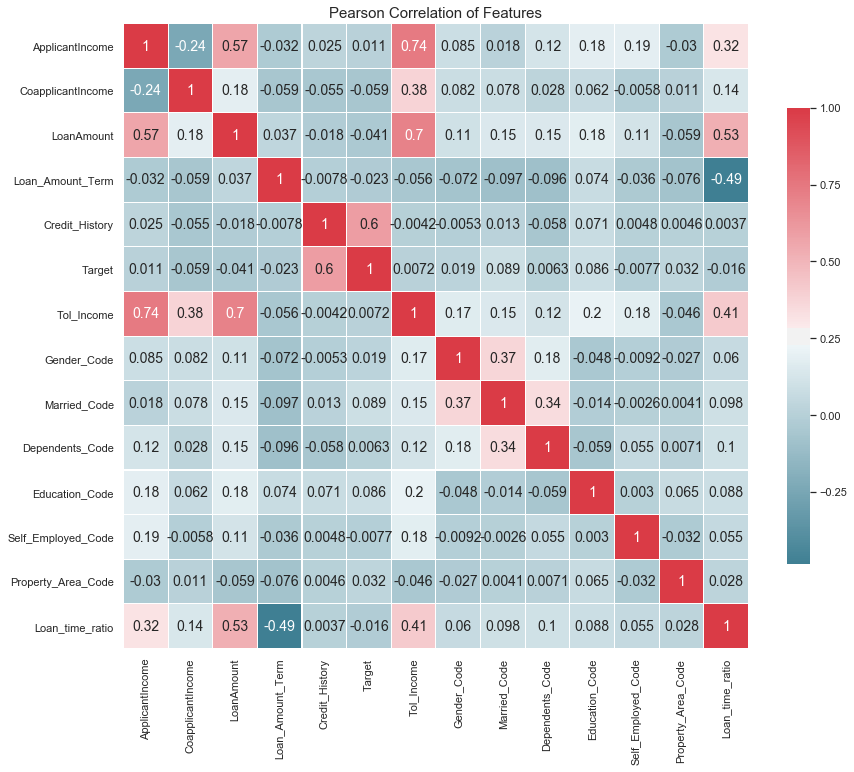

In [81]:
correlation_heatmap(train_cl)

In [82]:
train_cl.Loan_Amount_Term.value_counts()

0.743590    526
0.358974     44
1.000000     15
0.615385     13
0.153846      4
0.487179      4
0.230769      3
0.102564      2
0.051282      2
0.000000      1
Name: Loan_Amount_Term, dtype: int64

In [83]:
train_cl.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes
Dependents,0,1,0,0,0,2,0,3+,2,1,2,2,2,0,2,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
ApplicantIncome,0.581854,0.543052,0.475649,0.451844,0.585909,0.569648,0.435654,0.477546,0.521647,0.70696,0.485914,0.44665,0.479473,0.399021,0.34254,0.555306,0.504472,0.500622,0.553269,0.452888
CoapplicantIncome,0,0.0361917,0,0.0565915,0,0.100703,0.0363837,0.0600955,0.0366237,0.26323,0.0167999,0.0441596,0.194542,0.0681595,0.0260638,0,0,0,0,0.0839993
LoanAmount,0.204956,0.172214,0.0824891,0.160637,0.191027,0.373372,0.124457,0.21563,0.230101,0.492041,0.0882779,0.144718,0.276411,0.151954,0.0115774,0.167873,0.131693,0.0969609,0.17945,0.153401
Loan_Amount_Term,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.230769,0.74359,0.487179,0.74359,0.74359,0.74359
Credit_History,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1


In [84]:
test_raw.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Gender,Male,Male,Male,Male,Male,Male,Female,Male,Male,Male,Male,Male,Male,Male,Female,Male,Male,Male,Male,Male
Married,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,Yes,No
Dependents,0,1,2,2,0,0,1,2,2,0,0,1,3+,2,0,1,2,3+,0,0
Education,Graduate,Graduate,Graduate,Graduate,Not Graduate,Not Graduate,Not Graduate,Not Graduate,Graduate,Not Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
ApplicantIncome,909.314,488.626,794.755,371.52,520.448,343.676,353.382,616.71,2168.36,381.067,491.013,346.858,662.056,1936.05,741.612,900.881,728.406,601.594,1467.16,206.045
CoapplicantIncome,0,0.0359997,0.0431997,0.0611035,0,0.0821273,0,0,0,0.0575995,0,0.0363837,0,0,0,0,0.0699834,0.00799194,0.189982,0.0832793
LoanAmount,0.146165,0.16932,0.287988,0.131693,0.0998553,0.206946,0.0723589,0.199711,0.392185,0.164978,0.117221,0.221418,0.0448625,0.227207,0.166425,0.176556,0.276411,0.16932,0.421129,0.131693
Loan_Amount_Term,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.487179,0.74359,0.74359,0.74359,0.358974,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.358974
Credit_History,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1


In [85]:
train_cl.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Target                  int64
Tol_Income            float64
Gender_Code           float64
Married_Code          float64
Dependents_Code       float64
Education_Code          int64
Self_Employed_Code    float64
Property_Area_Code      int64
Loan_time_ratio       float64
dtype: object

In [86]:
# Applying a log(1+x) transformation to all skewed numeric features
numeric_feats = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Tol_Income','Loan_time_ratio']

# Compute Their Skewness
skewed_feats = train_cl[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skewed_feats})
skewness.head(6)

,Skew
Loan_time_ratio,9.185549
CoapplicantIncome,7.473217
LoanAmount,2.689217
Tol_Income,1.074415
ApplicantIncome,0.480949
Loan_Amount_Term,-2.396240


In [87]:
temp.Transformed = np.log(train_cl.CoapplicantIncome+0.01)

In [88]:
temp.Transformed = np.log(train_cl.LoanAmount+0.05)

In [89]:
skew(temp.Transformed)

0.41457949304273256

In [90]:
train_cl.CoapplicantIncome = np.log(train_cl.CoapplicantIncome+0.01)

In [91]:
train_cl.LoanAmount = np.log(train_cl.LoanAmount+0.05)

In [92]:
train_cl.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male,Male
Married,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes
Dependents,0,1,0,0,0,2,0,3+,2,1,2,2,2,0,2,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No
ApplicantIncome,0.581854,0.543052,0.475649,0.451844,0.585909,0.569648,0.435654,0.477546,0.521647,0.70696,0.485914,0.44665,0.479473,0.399021,0.34254,0.555306,0.504472,0.500622,0.553269,0.452888
CoapplicantIncome,-4.60517,-3.07495,-4.60517,-2.70918,-4.60517,-2.2009,-3.07081,-2.6579,-3.06565,-1.29744,-3.61936,-2.91582,-1.58698,-2.549,-3.32247,-4.60517,-4.60517,-4.60517,-4.60517,-2.36447
LoanAmount,-1.36666,-1.50411,-2.02125,-1.55762,-1.42284,-0.859504,-1.74608,-1.32565,-1.2726,-0.612415,-1.97849,-1.6362,-1.1196,-1.59972,-2.78746,-1.52384,-1.70544,-1.91759,-1.47207,-1.59258
Loan_Amount_Term,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.74359,0.230769,0.74359,0.487179,0.74359,0.74359,0.74359
Credit_History,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1


In [93]:
train_cl.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Target',
       'Tol_Income', 'Gender_Code', 'Married_Code', 'Dependents_Code',
       'Education_Code', 'Self_Employed_Code', 'Property_Area_Code',
       'Loan_time_ratio'],
      dtype='object')

In [94]:
catboost_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Tol_Income']

In [95]:
ML_columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 
       'Tol_Income', 'Gender_Code', 'Married_Code', 'Dependents_Code',
       'Education_Code', 'Self_Employed_Code', 'Property_Area_Code']

In [96]:
len(catboost_columns)

12

In [97]:
len(ML_columns)

12

## Save the final datasets

In [98]:
X_normal = train_cl[ML_columns]
Y_normal = train_cl['Target']
test_normal = test_raw[ML_columns]
X_cat = train_cl[catboost_columns]
Y_cat = train_cl['Target']
test_cat = test_raw[catboost_columns]

In [336]:
X_normal.to_csv('X_normal.csv')
Y_normal.to_csv('Y_normal.csv',header='Target')
test_normal.to_csv('test_normal.csv')
X_cat.to_csv('X_cat.csv')
Y_cat.to_csv('Y_cat.csv',header='Target')
test_cat.to_csv('test_cat.csv')

## Load dataset for ML models

In [337]:
# X_normal = pd.read_csv('X_normal.csv',index_col=0)
# Y_normal = pd.read_csv('Y_normal.csv',index_col=0)
# test_normal = pd.read_csv('test_normal.csv',index_col=0)
# X_cat = pd.read_csv('X_cat.csv',index_col=0)
# Y_cat = pd.read_csv('Y_cat.csv',index_col=0)
# test_cat = pd.read_csv('test_cat.csv',index_col=0)

In [99]:
X_normal.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
ApplicantIncome,0.581854,0.543052,0.475649,0.451844,0.585909,0.569648,0.435654,0.477546,0.521647,0.706960,0.485914,0.446650,0.479473,0.399021,0.342540,0.555306,0.504472,0.500622,0.553269,0.452888
CoapplicantIncome,-4.605170,-3.074955,-4.605170,-2.709178,-4.605170,-2.200903,-3.070807,-2.657896,-3.065646,-1.297442,-3.619358,-2.915819,-1.586980,-2.549004,-3.322466,-4.605170,-4.605170,-4.605170,-4.605170,-2.364468
LoanAmount,-1.366664,-1.504114,-2.021255,-1.557620,-1.422844,-0.859504,-1.746075,-1.325653,-1.272604,-0.612415,-1.978490,-1.636204,-1.119598,-1.599717,-2.787460,-1.523845,-1.705436,-1.917589,-1.472070,-1.592577
Loan_Amount_Term,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.743590,0.230769,0.743590,0.487179,0.743590,0.743590,0.743590
Credit_History,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
Tol_Income,0.347520,0.357583,0.181795,0.305642,0.353847,0.470859,0.243648,0.334046,0.333688,0.696019,0.246915,0.273449,0.508326,0.292859,0.124858,0.306094,0.226771,0.220763,0.302914,0.357950
Gender_Code,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
Married_Code,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents_Code,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Education_Code,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000


# Machine Learning

### SklearnHelper

In [100]:
ntrain = X_normal.shape[0]
ntest = test_normal.shape[0]

In [101]:
SEED = 7
NFOLDS = 5
kf = KFold(n_splits=NFOLDS, random_state=SEED)

# class SklearnHelper(BaseEstimator):
#     def __init__(self, clf, seed=0, params=None):
# #         params['random_state'] = seed
#         self.clf = clf(**params)

#     def train(self, x_train, y_train):
#         self.clf.fit(x_train, y_train)

#     def predict(self, x):
#         return self.clf.predict(x)
    
#     def fit(self,x,y):
#         return self.clf.fit(x,y)
    
#     def feature_importances(self,x,y):
#         print(self.clf.fit(x,y).feature_importances_)


### Out-of-Fold Prediction

In [102]:
def get_oof(classifier,train_x,train_y,test_x):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.zeros((NFOLDS,ntest))
    
    for i,(train_idx,test_idx) in enumerate(kf.split(train_x)):
        kf_train_x = train_x.iloc[train_idx]
        kf_train_y = train_y[train_idx]
        kf_test_x = train_x.iloc[test_idx]
        
        classifier.fit(kf_train_x,kf_train_y)
        oof_train[test_idx] = classifier.predict(kf_test_x)
        oof_test_skf[i,:] = classifier.predict(test_x)
    
    oof_test = oof_test_skf.mean(axis=0)
    
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

In [104]:
# def get_oof(clf, x_train, y_train, x_test):
#     oof_train = np.zeros((ntrain,))
#     oof_test = np.zeros((ntest,))
#     oof_test_skf = np.zeros((NFOLDS, ntest))

#     for i, (train_index, test_index) in enumerate(kf.split(x_train)):
# #         print(i,'train_index are:', train_index, 'test_index are:', test_index, sep='\n')
#         x_tr = x_train.iloc[train_index]
#         y_tr = y_train[train_index]
#         x_te = x_train.iloc[test_index]

#         clf.fit(x_tr, y_tr)

#         oof_train[test_index] = clf.predict(x_te)
#         oof_test_skf[i, :] = clf.predict(x_test)

#     oof_test[:] = oof_test_skf.mean(axis=0) 
# #     print(oof_train.reshape(-1, 1).shape)
#     return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

## Test with many ML algorithms with default parameters

In [105]:
MLA = [
#     Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

#     Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
#     GLM
    linear_model.LogisticRegression(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifier(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
#     Kernel Method
    KernelRidge(),
    
#     Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
#     Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
#     Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier(learning_rate=0.01, gamma=0.1, max_depth=2, n_estimators=500, min_child_weight=1, seed=0)    
    ]
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, train_size=0.6)

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
# MLA_predict = Y_normal

In [106]:
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_cl[ML_columns], train_cl['Target'], cv  = cv_split,scoring='roc_auc')

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train_cl[ML_columns], train_cl['Target'])
#     MLA_predict[MLA_name] = alg.predict(train_cl[ML_columns])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
17,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.877543,0.794512,0.0856897,0.017688
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.995455,0.784711,0.0785367,0.0489725
18,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.87161,0.783282,0.0773282,0.0194854
14,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.804903,0.781954,0.0563082,0.00180044
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.906879,0.770585,0.110515,0.080634
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.999093,0.766669,0.0523221,0.0132912
15,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.816913,0.765621,0.151835,0.00169895
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.762915,0.0863382,0.00919468
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.99945,0.758749,0.124012,0.00889556
13,KernelRidge,"{'alpha': 1, 'coef0': 1, 'degree': 3, 'gamma':...",0.804165,0.754838,0.0704009,0.00609648


Here we select

    1.BernoulliNB
    2.RidgeClassifierCV    
    3.LinearSVC
    4.NuSVC
    5.LogisticRegressionCV
    6.XGBClassifier
    7.LightGMB
    8.RandomForestClassifier
    9.ExtraTreesClassifier
    10.KNeighborsClassifier
    11.CatBoost

In [107]:
train_cl.Target.value_counts()

1    422
0    192
Name: Target, dtype: int64

# Create class for MLA and HP-tuning

In [125]:
cv = model_selection.StratifiedKFold(n_splits=7, random_state=SEED)

In [121]:
from hyperopt import space_eval

In [238]:
class Bayesian_Optimizer:
    def __init__(self, clf, param_space, scoring_metrics ='f1_weighted', 
                 max_eval = 100 , cv = cv ,train_set=train_cl, X_col=ML_columns, Y_col = 'Target'):
        self.clf = clf
        self.param_space = param_space
        self.max_eval = max_eval
        self.train_set = train_set
        self.X_col = X_col
        self.Y_col = Y_col
        self.scoring_metrics = scoring_metrics
        self.cv = cv
        self.epoch = 1
        
    def hyperopt_run(self, space):
        model = self.clf(**space)
        score = cross_val_score(model,
                                self.train_set[self.X_col], 
                                self.train_set[self.Y_col], 
#                                 cv  = self.cv,
                                cv=5,
                                scoring=self.scoring_metrics                     
                               )
        print("Epoch : {}: {} Score {:.3f} params {}".format(self.epoch, self.scoring_metrics,score.mean(), space))
        self.epoch+=1
        return {'loss':(1 - score.mean()), 'status': STATUS_OK}
    def HP_optimization(self):
        trials = Trials()
        best = fmin(fn=self.hyperopt_run,
                    space=self.param_space,
                    algo=tpe.suggest,
                    max_evals=self.max_eval
                    )
        best_option = space_eval(self.param_space, best)
        self.best_option = best_option
        print('the best option is:', best_option)
        clf = self.clf(**self.best_option)
        final_score = cross_val_score(clf,
                                      self.train_set[self.X_col],
                                      self.train_set[self.Y_col],
                                      cv  = self.cv,
                                      scoring=self.scoring_metrics                            
                               )
        print('Cooresponding loss:', final_score.mean(), sep='\n')

In [310]:
model = naive_bayes.BernoulliNB(alpha=1)
score1 = cross_val_score(model,
                        train_cl[ML_columns], 
                        train_cl['Target'], 
#                          cv  = self.cv,
                        cv=5,
                        scoring='balanced_accuracy'
                       )

In [311]:
model = naive_bayes.BernoulliNB(alpha=5)
score2 = cross_val_score(model,
                        train_cl[ML_columns], 
                        train_cl['Target'], 
#                          cv  = self.cv,
                        cv=5,
                        scoring='balanced_accuracy'
                       )

In [312]:
model = naive_bayes.BernoulliNB(alpha=10)
score3 = cross_val_score(model,
                        train_cl[ML_columns], 
                        train_cl['Target'], 
#                          cv  = self.cv,
                        cv=5,
                        scoring='balanced_accuracy'
                       )

In [313]:
model = linear_model.RidgeClassifier(**Ridge.best_option)
score4 = cross_val_score(model,
                        train_cl[ML_columns], 
                        train_cl['Target'], 
#                          cv  = self.cv,
                        cv=5,
                        scoring='balanced_accuracy'
                       )

In [314]:
model = svm.SVC(**SVC.best_option)
score5 = cross_val_score(model,
                        train_cl[ML_columns], 
                        train_cl['Target'], 
#                          cv  = self.cv,
                        cv=5,
                        scoring='balanced_accuracy'
                       )

In [315]:
print(score1,score2,score3,score4,score5, sep='\n')

[0.76334842 0.68054299 0.68546366 0.7966792  0.77036341]
[0.76334842 0.68054299 0.68546366 0.7966792  0.77036341]
[0.76334842 0.68054299 0.68546366 0.7966792  0.77036341]
[0.76334842 0.68054299 0.68546366 0.7966792  0.77036341]
[0.76923077 0.68054299 0.68546366 0.7966792  0.77036341]


In [239]:
NB_space = {
    'alpha': hp.uniform('alpha',0,10)
}
NB = Bayesian_Optimizer(clf=naive_bayes.BernoulliNB, param_space=NB_space, max_eval=500)
NB.HP_optimization()

Epoch : 1: f1_weighted Score 0.812 params {'alpha': 9.442523561210042}
Epoch : 2: f1_weighted Score 0.812 params {'alpha': 9.791168535830156}
Epoch : 3: f1_weighted Score 0.812 params {'alpha': 3.0121736866668867}
Epoch : 4: f1_weighted Score 0.812 params {'alpha': 7.955005699845429}
Epoch : 5: f1_weighted Score 0.812 params {'alpha': 6.481950127602416}
Epoch : 6: f1_weighted Score 0.812 params {'alpha': 1.726291620858963}
Epoch : 7: f1_weighted Score 0.812 params {'alpha': 1.4846186725354071}
Epoch : 8: f1_weighted Score 0.812 params {'alpha': 3.685402697681651}
Epoch : 9: f1_weighted Score 0.812 params {'alpha': 2.026114447327446}
Epoch : 10: f1_weighted Score 0.812 params {'alpha': 1.5830186482667263}
Epoch : 11: f1_weighted Score 0.812 params {'alpha': 6.867007591908292}
Epoch : 12: f1_weighted Score 0.812 params {'alpha': 1.9479199845599027}
Epoch : 13: f1_weighted Score 0.812 params {'alpha': 9.83382765149963}
Epoch : 14: f1_weighted Score 0.812 params {'alpha': 7.531592537757933

Epoch : 124: f1_weighted Score 0.812 params {'alpha': 9.669226664825468}
Epoch : 125: f1_weighted Score 0.812 params {'alpha': 6.361029444754973}
Epoch : 126: f1_weighted Score 0.812 params {'alpha': 7.438271245521774}
Epoch : 127: f1_weighted Score 0.812 params {'alpha': 6.657696977145979}
Epoch : 128: f1_weighted Score 0.812 params {'alpha': 6.58012901019246}
Epoch : 129: f1_weighted Score 0.812 params {'alpha': 0.3291032041115034}
Epoch : 130: f1_weighted Score 0.812 params {'alpha': 0.8004699525159463}
Epoch : 131: f1_weighted Score 0.812 params {'alpha': 0.6609236727429019}
Epoch : 132: f1_weighted Score 0.812 params {'alpha': 2.098372443061543}
Epoch : 133: f1_weighted Score 0.812 params {'alpha': 1.3402991912421993}
Epoch : 134: f1_weighted Score 0.812 params {'alpha': 2.275070666011063}
Epoch : 135: f1_weighted Score 0.812 params {'alpha': 3.8549366417937447}
Epoch : 136: f1_weighted Score 0.812 params {'alpha': 4.5302994356351824}
Epoch : 137: f1_weighted Score 0.812 params {'

Epoch : 240: f1_weighted Score 0.812 params {'alpha': 4.108227303746129}
Epoch : 241: f1_weighted Score 0.812 params {'alpha': 4.466375451143132}
Epoch : 242: f1_weighted Score 0.812 params {'alpha': 4.571395434224363}
Epoch : 243: f1_weighted Score 0.812 params {'alpha': 9.401757896892253}
Epoch : 244: f1_weighted Score 0.812 params {'alpha': 8.761787172657723}
Epoch : 245: f1_weighted Score 0.812 params {'alpha': 9.78746809893025}
Epoch : 246: f1_weighted Score 0.812 params {'alpha': 8.994969683028346}
Epoch : 247: f1_weighted Score 0.812 params {'alpha': 9.78742134796536}
Epoch : 248: f1_weighted Score 0.812 params {'alpha': 8.567310910645297}
Epoch : 249: f1_weighted Score 0.812 params {'alpha': 5.886554012576778}
Epoch : 250: f1_weighted Score 0.812 params {'alpha': 7.151433623204371}
Epoch : 251: f1_weighted Score 0.812 params {'alpha': 5.652407411572025}
Epoch : 252: f1_weighted Score 0.812 params {'alpha': 4.879947758165899}
Epoch : 253: f1_weighted Score 0.812 params {'alpha':

Epoch : 352: f1_weighted Score 0.812 params {'alpha': 4.135904301111704}
Epoch : 353: f1_weighted Score 0.812 params {'alpha': 3.9705193435392507}
Epoch : 354: f1_weighted Score 0.812 params {'alpha': 4.349086259991522}
Epoch : 355: f1_weighted Score 0.812 params {'alpha': 4.5989487555912545}
Epoch : 356: f1_weighted Score 0.812 params {'alpha': 4.503096755815297}
Epoch : 357: f1_weighted Score 0.812 params {'alpha': 5.336294792993729}
Epoch : 358: f1_weighted Score 0.812 params {'alpha': 4.8047240520418315}
Epoch : 359: f1_weighted Score 0.812 params {'alpha': 8.821909645045439}
Epoch : 360: f1_weighted Score 0.812 params {'alpha': 8.673501488223906}
Epoch : 361: f1_weighted Score 0.812 params {'alpha': 9.414339298535163}
Epoch : 362: f1_weighted Score 0.812 params {'alpha': 9.512758517167626}
Epoch : 363: f1_weighted Score 0.812 params {'alpha': 9.676528297063362}
Epoch : 364: f1_weighted Score 0.812 params {'alpha': 9.983223770724122}
Epoch : 365: f1_weighted Score 0.812 params {'al

Epoch : 469: f1_weighted Score 0.812 params {'alpha': 5.885340368396098}
Epoch : 470: f1_weighted Score 0.812 params {'alpha': 6.743089150131635}
Epoch : 471: f1_weighted Score 0.812 params {'alpha': 6.1342342011298445}
Epoch : 472: f1_weighted Score 0.812 params {'alpha': 6.871211636328711}
Epoch : 473: f1_weighted Score 0.812 params {'alpha': 8.992284715308843}
Epoch : 474: f1_weighted Score 0.812 params {'alpha': 8.486629436981744}
Epoch : 475: f1_weighted Score 0.812 params {'alpha': 8.77228203884761}
Epoch : 476: f1_weighted Score 0.812 params {'alpha': 9.096185863225404}
Epoch : 477: f1_weighted Score 0.812 params {'alpha': 8.64742078785639}
Epoch : 478: f1_weighted Score 0.812 params {'alpha': 8.288485899085867}
Epoch : 479: f1_weighted Score 0.812 params {'alpha': 8.216611016387006}
Epoch : 480: f1_weighted Score 0.812 params {'alpha': 8.051695806222991}
Epoch : 481: f1_weighted Score 0.812 params {'alpha': 7.959094008993858}
Epoch : 482: f1_weighted Score 0.812 params {'alpha'

In [240]:
Ridge_space = {
    'alpha': hp.uniform('alpha',0,20),
    'normalize': hp.choice('normalize', [False, True]),
    'solver': hp.choice('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
}
Ridge = Bayesian_Optimizer(clf=linear_model.RidgeClassifier, param_space=Ridge_space, max_eval=500)
Ridge.HP_optimization()

Epoch : 1: f1_weighted Score 0.812 params {'alpha': 13.56202039322546, 'normalize': False, 'solver': 'sparse_cg'}
Epoch : 2: f1_weighted Score 0.812 params {'alpha': 2.4363758271755653, 'normalize': False, 'solver': 'lsqr'}
Epoch : 3: f1_weighted Score 0.560 params {'alpha': 6.391918301184822, 'normalize': True, 'solver': 'svd'}
Epoch : 4: f1_weighted Score 0.560 params {'alpha': 12.30491545981909, 'normalize': True, 'solver': 'svd'}
Epoch : 5: f1_weighted Score 0.560 params {'alpha': 9.080687288776536, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 6: f1_weighted Score 0.812 params {'alpha': 17.91227584666291, 'normalize': False, 'solver': 'sparse_cg'}
Epoch : 7: f1_weighted Score 0.812 params {'alpha': 1.0748950247090794, 'normalize': False, 'solver': 'lsqr'}
Epoch : 8: f1_weighted Score 0.812 params {'alpha': 13.712416941831416, 'normalize': False, 'solver': 'lsqr'}
Epoch : 9: f1_weighted Score 0.812 params {'alpha': 4.392782517694016, 'normalize': False, 'solver': 'svd'}
Epoch :

Epoch : 77: f1_weighted Score 0.812 params {'alpha': 15.436202751886958, 'normalize': False, 'solver': 'auto'}
Epoch : 78: f1_weighted Score 0.812 params {'alpha': 6.001793846566093, 'normalize': False, 'solver': 'sparse_cg'}
Epoch : 79: f1_weighted Score 0.812 params {'alpha': 9.682531717571264, 'normalize': False, 'solver': 'auto'}
Epoch : 80: f1_weighted Score 0.812 params {'alpha': 3.9952782434851652, 'normalize': False, 'solver': 'lsqr'}
Epoch : 81: f1_weighted Score 0.560 params {'alpha': 8.68022442838346, 'normalize': True, 'solver': 'cholesky'}
Epoch : 82: f1_weighted Score 0.812 params {'alpha': 3.3952988490451315, 'normalize': False, 'solver': 'svd'}
Epoch : 83: f1_weighted Score 0.812 params {'alpha': 12.699198263227581, 'normalize': False, 'solver': 'cholesky'}
Epoch : 84: f1_weighted Score 0.812 params {'alpha': 12.724082724041391, 'normalize': False, 'solver': 'sparse_cg'}
Epoch : 85: f1_weighted Score 0.560 params {'alpha': 14.89995127508491, 'normalize': True, 'solver':

Epoch : 151: f1_weighted Score 0.812 params {'alpha': 12.171897506409255, 'normalize': False, 'solver': 'cholesky'}
Epoch : 152: f1_weighted Score 0.812 params {'alpha': 14.656226446476209, 'normalize': False, 'solver': 'sparse_cg'}
Epoch : 153: f1_weighted Score 0.812 params {'alpha': 13.903448332800021, 'normalize': False, 'solver': 'svd'}
Epoch : 154: f1_weighted Score 0.812 params {'alpha': 10.43343061725584, 'normalize': False, 'solver': 'svd'}
Epoch : 155: f1_weighted Score 0.812 params {'alpha': 10.786239818431538, 'normalize': False, 'solver': 'auto'}
Epoch : 156: f1_weighted Score 0.812 params {'alpha': 13.207167739384815, 'normalize': False, 'solver': 'auto'}
Epoch : 157: f1_weighted Score 0.812 params {'alpha': 10.83013146432574, 'normalize': False, 'solver': 'auto'}
Epoch : 158: f1_weighted Score 0.812 params {'alpha': 15.945802286358028, 'normalize': False, 'solver': 'sparse_cg'}
Epoch : 159: f1_weighted Score 0.812 params {'alpha': 18.146597791954875, 'normalize': False, 

Epoch : 223: f1_weighted Score 0.812 params {'alpha': 16.79726017469323, 'normalize': False, 'solver': 'lsqr'}
Epoch : 224: f1_weighted Score 0.812 params {'alpha': 15.241682927865348, 'normalize': False, 'solver': 'lsqr'}
Epoch : 225: f1_weighted Score 0.812 params {'alpha': 5.8333103588054005, 'normalize': False, 'solver': 'lsqr'}
Epoch : 226: f1_weighted Score 0.812 params {'alpha': 16.10228673527384, 'normalize': False, 'solver': 'lsqr'}
Epoch : 227: f1_weighted Score 0.560 params {'alpha': 14.748376087032565, 'normalize': True, 'solver': 'lsqr'}
Epoch : 228: f1_weighted Score 0.812 params {'alpha': 6.926402918134978, 'normalize': False, 'solver': 'sag'}
Epoch : 229: f1_weighted Score 0.812 params {'alpha': 5.192346336660454, 'normalize': False, 'solver': 'lsqr'}
Epoch : 230: f1_weighted Score 0.812 params {'alpha': 4.2907962190093, 'normalize': False, 'solver': 'lsqr'}
Epoch : 231: f1_weighted Score 0.812 params {'alpha': 9.110399260835713, 'normalize': False, 'solver': 'lsqr'}
Ep

Epoch : 298: f1_weighted Score 0.810 params {'alpha': 1.5769533914557847, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 299: f1_weighted Score 0.560 params {'alpha': 3.2696967130742465, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 300: f1_weighted Score 0.812 params {'alpha': 0.22846186837073512, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 301: f1_weighted Score 0.560 params {'alpha': 3.8545116850041095, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 302: f1_weighted Score 0.560 params {'alpha': 5.481823010166738, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 303: f1_weighted Score 0.812 params {'alpha': 1.1786684095068098, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 304: f1_weighted Score 0.804 params {'alpha': 1.8034181526579331, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 305: f1_weighted Score 0.564 params {'alpha': 3.0724217886501197, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 306: f1_weighted Score 0.812 params {'alpha': 0.5457498334246279

Epoch : 372: f1_weighted Score 0.812 params {'alpha': 12.28164941910015, 'normalize': False, 'solver': 'cholesky'}
Epoch : 373: f1_weighted Score 0.812 params {'alpha': 12.534570434362875, 'normalize': False, 'solver': 'cholesky'}
Epoch : 374: f1_weighted Score 0.812 params {'alpha': 11.791243570941171, 'normalize': False, 'solver': 'cholesky'}
Epoch : 375: f1_weighted Score 0.812 params {'alpha': 12.976492922742853, 'normalize': False, 'solver': 'cholesky'}
Epoch : 376: f1_weighted Score 0.812 params {'alpha': 14.89380996982873, 'normalize': False, 'solver': 'cholesky'}
Epoch : 377: f1_weighted Score 0.812 params {'alpha': 14.241977256079299, 'normalize': False, 'solver': 'cholesky'}
Epoch : 378: f1_weighted Score 0.812 params {'alpha': 13.508885008291013, 'normalize': False, 'solver': 'cholesky'}
Epoch : 379: f1_weighted Score 0.812 params {'alpha': 13.897177489996226, 'normalize': False, 'solver': 'cholesky'}
Epoch : 380: f1_weighted Score 0.812 params {'alpha': 13.240683766462338, 

Epoch : 446: f1_weighted Score 0.560 params {'alpha': 17.234312797175377, 'normalize': True, 'solver': 'saga'}
Epoch : 447: f1_weighted Score 0.560 params {'alpha': 19.64348178885844, 'normalize': True, 'solver': 'saga'}
Epoch : 448: f1_weighted Score 0.812 params {'alpha': 0.21705150709976856, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 449: f1_weighted Score 0.812 params {'alpha': 0.11152249426618119, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 450: f1_weighted Score 0.812 params {'alpha': 0.9154390061542736, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 451: f1_weighted Score 0.812 params {'alpha': 0.7287867081809001, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 452: f1_weighted Score 0.812 params {'alpha': 0.028504081589264985, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 453: f1_weighted Score 0.812 params {'alpha': 1.1362391759491877, 'normalize': True, 'solver': 'sparse_cg'}
Epoch : 454: f1_weighted Score 0.808 params {'alpha': 1.749732081650561, 'norma

In [241]:
SVC_space = {
    'C': hp.uniform('C',0,10),
    'kernel': hp.choice('kernel', ['linear','poly','rbf','sigmoid']),
    'probability': hp.choice('probability', [False,True])
}
SVC = Bayesian_Optimizer(clf=svm.SVC, param_space=SVC_space, max_eval=500)
SVC.HP_optimization()

Epoch : 1: f1_weighted Score 0.812 params {'C': 6.011502588138247, 'kernel': 'poly', 'probability': True}
Epoch : 2: f1_weighted Score 0.812 params {'C': 5.849913345186107, 'kernel': 'linear', 'probability': True}
Epoch : 3: f1_weighted Score 0.812 params {'C': 6.61842481867556, 'kernel': 'linear', 'probability': True}
Epoch : 4: f1_weighted Score 0.812 params {'C': 8.561665661512919, 'kernel': 'rbf', 'probability': False}
Epoch : 5: f1_weighted Score 0.810 params {'C': 9.039723088368357, 'kernel': 'poly', 'probability': True}
Epoch : 6: f1_weighted Score 0.812 params {'C': 3.945567950048372, 'kernel': 'poly', 'probability': False}
Epoch : 7: f1_weighted Score 0.812 params {'C': 7.591329137970442, 'kernel': 'linear', 'probability': False}
Epoch : 8: f1_weighted Score 0.812 params {'C': 4.301306811262196, 'kernel': 'poly', 'probability': False}
Epoch : 9: f1_weighted Score 0.812 params {'C': 3.0124727160078404, 'kernel': 'poly', 'probability': False}
Epoch : 10: f1_weighted Score 0.612 

Epoch : 76: f1_weighted Score 0.812 params {'C': 5.853325486933446, 'kernel': 'rbf', 'probability': True}
Epoch : 77: f1_weighted Score 0.812 params {'C': 5.340557064248413, 'kernel': 'poly', 'probability': True}
Epoch : 78: f1_weighted Score 0.812 params {'C': 7.552711923268223, 'kernel': 'rbf', 'probability': True}
Epoch : 79: f1_weighted Score 0.812 params {'C': 5.316379636818272, 'kernel': 'poly', 'probability': False}
Epoch : 80: f1_weighted Score 0.812 params {'C': 8.773856949076553, 'kernel': 'rbf', 'probability': True}
Epoch : 81: f1_weighted Score 0.812 params {'C': 2.20904807689531, 'kernel': 'linear', 'probability': False}
Epoch : 82: f1_weighted Score 0.812 params {'C': 1.43589229329993, 'kernel': 'linear', 'probability': False}
Epoch : 83: f1_weighted Score 0.615 params {'C': 7.921734722956838, 'kernel': 'sigmoid', 'probability': True}
Epoch : 84: f1_weighted Score 0.738 params {'C': 0.03829240797429079, 'kernel': 'poly', 'probability': True}
Epoch : 85: f1_weighted Score 

Epoch : 152: f1_weighted Score 0.812 params {'C': 7.625094553837112, 'kernel': 'linear', 'probability': True}
Epoch : 153: f1_weighted Score 0.812 params {'C': 8.264494007021012, 'kernel': 'linear', 'probability': True}
Epoch : 154: f1_weighted Score 0.812 params {'C': 9.182803805750938, 'kernel': 'rbf', 'probability': True}
Epoch : 155: f1_weighted Score 0.812 params {'C': 7.432445465916541, 'kernel': 'rbf', 'probability': True}
Epoch : 156: f1_weighted Score 0.812 params {'C': 2.301080178767758, 'kernel': 'rbf', 'probability': True}
Epoch : 157: f1_weighted Score 0.812 params {'C': 2.6604402830633584, 'kernel': 'rbf', 'probability': True}
Epoch : 158: f1_weighted Score 0.812 params {'C': 1.3053200286164925, 'kernel': 'rbf', 'probability': True}
Epoch : 159: f1_weighted Score 0.812 params {'C': 2.590045132354155, 'kernel': 'rbf', 'probability': True}
Epoch : 160: f1_weighted Score 0.812 params {'C': 0.2827976605278657, 'kernel': 'poly', 'probability': True}
Epoch : 161: f1_weighted Sc

Epoch : 229: f1_weighted Score 0.617 params {'C': 5.924679950228601, 'kernel': 'sigmoid', 'probability': False}
Epoch : 230: f1_weighted Score 0.615 params {'C': 3.957741347213041, 'kernel': 'sigmoid', 'probability': False}
Epoch : 231: f1_weighted Score 0.560 params {'C': 0.20465447657605862, 'kernel': 'sigmoid', 'probability': False}
Epoch : 232: f1_weighted Score 0.812 params {'C': 6.475505218599042, 'kernel': 'rbf', 'probability': True}
Epoch : 233: f1_weighted Score 0.812 params {'C': 7.805402491348902, 'kernel': 'linear', 'probability': True}
Epoch : 234: f1_weighted Score 0.812 params {'C': 4.783376777657315, 'kernel': 'poly', 'probability': False}
Epoch : 235: f1_weighted Score 0.812 params {'C': 7.606231533348897, 'kernel': 'linear', 'probability': True}
Epoch : 236: f1_weighted Score 0.812 params {'C': 7.448981389189186, 'kernel': 'linear', 'probability': True}
Epoch : 237: f1_weighted Score 0.812 params {'C': 7.995203251346944, 'kernel': 'linear', 'probability': True}
Epoch 

Epoch : 306: f1_weighted Score 0.812 params {'C': 2.7229671771046884, 'kernel': 'poly', 'probability': False}
Epoch : 307: f1_weighted Score 0.650 params {'C': 0.7496252248701091, 'kernel': 'sigmoid', 'probability': False}
Epoch : 308: f1_weighted Score 0.812 params {'C': 0.2732417111683401, 'kernel': 'poly', 'probability': False}
Epoch : 309: f1_weighted Score 0.812 params {'C': 1.4393966203583817, 'kernel': 'linear', 'probability': False}
Epoch : 310: f1_weighted Score 0.812 params {'C': 0.5858656076352463, 'kernel': 'poly', 'probability': False}
Epoch : 311: f1_weighted Score 0.812 params {'C': 0.10834206206405562, 'kernel': 'linear', 'probability': False}
Epoch : 312: f1_weighted Score 0.812 params {'C': 1.6839340987939637, 'kernel': 'linear', 'probability': False}
Epoch : 313: f1_weighted Score 0.812 params {'C': 1.2844072913757305, 'kernel': 'linear', 'probability': False}
Epoch : 314: f1_weighted Score 0.812 params {'C': 1.4605100978283585, 'kernel': 'linear', 'probability': Fal

Epoch : 382: f1_weighted Score 0.617 params {'C': 9.709913770617037, 'kernel': 'sigmoid', 'probability': True}
Epoch : 383: f1_weighted Score 0.812 params {'C': 9.905349705277358, 'kernel': 'rbf', 'probability': True}
Epoch : 384: f1_weighted Score 0.812 params {'C': 9.477147635994726, 'kernel': 'rbf', 'probability': True}
Epoch : 385: f1_weighted Score 0.812 params {'C': 9.166632128846782, 'kernel': 'rbf', 'probability': True}
Epoch : 386: f1_weighted Score 0.812 params {'C': 9.32691595068092, 'kernel': 'rbf', 'probability': True}
Epoch : 387: f1_weighted Score 0.812 params {'C': 8.387733319169453, 'kernel': 'rbf', 'probability': True}
Epoch : 388: f1_weighted Score 0.812 params {'C': 8.605779120802866, 'kernel': 'rbf', 'probability': True}
Epoch : 389: f1_weighted Score 0.812 params {'C': 9.056561148080226, 'kernel': 'rbf', 'probability': True}
Epoch : 390: f1_weighted Score 0.812 params {'C': 8.577722685134471, 'kernel': 'rbf', 'probability': True}
Epoch : 391: f1_weighted Score 0.8

Epoch : 461: f1_weighted Score 0.812 params {'C': 1.5804136369617776, 'kernel': 'poly', 'probability': False}
Epoch : 462: f1_weighted Score 0.812 params {'C': 1.4488505597176589, 'kernel': 'poly', 'probability': False}
Epoch : 463: f1_weighted Score 0.812 params {'C': 0.3020281213462537, 'kernel': 'poly', 'probability': False}
Epoch : 464: f1_weighted Score 0.813 params {'C': 0.20106097877419357, 'kernel': 'poly', 'probability': False}
Epoch : 465: f1_weighted Score 0.560 params {'C': 0.013050769177536559, 'kernel': 'linear', 'probability': False}
Epoch : 466: f1_weighted Score 0.812 params {'C': 0.12654112509240134, 'kernel': 'linear', 'probability': False}
Epoch : 467: f1_weighted Score 0.812 params {'C': 1.1967731853916335, 'kernel': 'linear', 'probability': False}
Epoch : 468: f1_weighted Score 0.630 params {'C': 0.5775447152609962, 'kernel': 'sigmoid', 'probability': False}
Epoch : 469: f1_weighted Score 0.812 params {'C': 1.6918061696424704, 'kernel': 'linear', 'probability': Fa

In [242]:
NuSVC_space = {
    'nu': hp.loguniform('nu',np.log(0.000001),np.log(0.6)),
    'kernel': hp.choice('kernel', ['linear','poly','rbf','sigmoid']),
    'probability': hp.choice('probability', [False,True])
}
NuSVC = Bayesian_Optimizer(clf=svm.NuSVC, param_space=NuSVC_space, max_eval=500)
NuSVC.HP_optimization()

Epoch : 1: f1_weighted Score 0.410 params {'kernel': 'rbf', 'nu': 0.0020738622936460355, 'probability': False}
Epoch : 2: f1_weighted Score 0.477 params {'kernel': 'sigmoid', 'nu': 0.015339126015989022, 'probability': False}
Epoch : 3: f1_weighted Score 0.513 params {'kernel': 'sigmoid', 'nu': 2.5477099759838767e-06, 'probability': False}
Epoch : 4: f1_weighted Score 0.459 params {'kernel': 'rbf', 'nu': 1.268817290710088e-06, 'probability': True}
Epoch : 5: f1_weighted Score 0.484 params {'kernel': 'poly', 'nu': 3.5507661235326736e-06, 'probability': True}
Epoch : 6: f1_weighted Score 0.486 params {'kernel': 'sigmoid', 'nu': 0.0005068327265441575, 'probability': True}
Epoch : 7: f1_weighted Score 0.484 params {'kernel': 'sigmoid', 'nu': 0.0017119815384854437, 'probability': False}
Epoch : 8: f1_weighted Score 0.472 params {'kernel': 'linear', 'nu': 9.943004981856247e-05, 'probability': False}
Epoch : 9: f1_weighted Score 0.510 params {'kernel': 'rbf', 'nu': 1.3366476340660064e-05, 'pro

Epoch : 76: f1_weighted Score 0.812 params {'kernel': 'linear', 'nu': 0.395045373559029, 'probability': True}
Epoch : 77: f1_weighted Score 0.812 params {'kernel': 'linear', 'nu': 0.3806926110606222, 'probability': True}
Epoch : 78: f1_weighted Score 0.775 params {'kernel': 'rbf', 'nu': 0.2772439810991068, 'probability': True}
Epoch : 79: f1_weighted Score 0.513 params {'kernel': 'sigmoid', 'nu': 0.15785161523420238, 'probability': False}
Epoch : 80: f1_weighted Score 0.667 params {'kernel': 'poly', 'nu': 0.09104935306676357, 'probability': True}
Epoch : 81: f1_weighted Score 0.453 params {'kernel': 'linear', 'nu': 0.0003133509223428637, 'probability': True}
Epoch : 82: f1_weighted Score 0.516 params {'kernel': 'linear', 'nu': 1.443370950173412e-06, 'probability': True}
Epoch : 83: f1_weighted Score 0.394 params {'kernel': 'linear', 'nu': 0.05040230118859764, 'probability': False}
Epoch : 84: f1_weighted Score 0.651 params {'kernel': 'rbf', 'nu': 0.019251483258292883, 'probability': Tr

Epoch : 150: f1_weighted Score 0.812 params {'kernel': 'linear', 'nu': 0.5982127838746856, 'probability': True}
Epoch : 151: f1_weighted Score 0.523 params {'kernel': 'linear', 'nu': 0.18212671977071634, 'probability': False}
Epoch : 152: f1_weighted Score 0.645 params {'kernel': 'linear', 'nu': 0.2492843650982249, 'probability': True}
Epoch : 153: f1_weighted Score 0.431 params {'kernel': 'linear', 'nu': 0.06962371616295705, 'probability': True}
Epoch : 154: f1_weighted Score 0.738 params {'kernel': 'linear', 'nu': 0.3183957796648238, 'probability': True}
Epoch : 155: f1_weighted Score 0.381 params {'kernel': 'linear', 'nu': 0.04917973534490781, 'probability': True}
Epoch : 156: f1_weighted Score 0.452 params {'kernel': 'linear', 'nu': 0.14476359918682902, 'probability': True}
Epoch : 157: f1_weighted Score 0.415 params {'kernel': 'linear', 'nu': 0.10357727950236374, 'probability': False}
Epoch : 158: f1_weighted Score 0.430 params {'kernel': 'linear', 'nu': 0.03676655632171198, 'prob

Epoch : 226: f1_weighted Score 0.812 params {'kernel': 'linear', 'nu': 0.5993748184432766, 'probability': True}
Epoch : 227: f1_weighted Score 0.457 params {'kernel': 'linear', 'nu': 0.018140545623453793, 'probability': False}
Epoch : 228: f1_weighted Score 0.448 params {'kernel': 'poly', 'nu': 0.0011561437397501445, 'probability': False}
Epoch : 229: f1_weighted Score 0.506 params {'kernel': 'linear', 'nu': 0.007607604975404352, 'probability': True}
Epoch : 230: f1_weighted Score 0.685 params {'kernel': 'linear', 'nu': 0.3045649311201217, 'probability': True}
Epoch : 231: f1_weighted Score 0.416 params {'kernel': 'linear', 'nu': 0.10501867799401587, 'probability': False}
Epoch : 232: f1_weighted Score 0.810 params {'kernel': 'rbf', 'nu': 0.5869205160085434, 'probability': False}
Epoch : 233: f1_weighted Score 0.528 params {'kernel': 'linear', 'nu': 0.21396790985120756, 'probability': False}
Epoch : 234: f1_weighted Score 0.503 params {'kernel': 'sigmoid', 'nu': 0.05372116294847834, 'p

Epoch : 299: f1_weighted Score 0.669 params {'kernel': 'rbf', 'nu': 0.07864174689206564, 'probability': True}
Epoch : 300: f1_weighted Score 0.510 params {'kernel': 'rbf', 'nu': 1.3021010719980077e-05, 'probability': True}
Epoch : 301: f1_weighted Score 0.648 params {'kernel': 'rbf', 'nu': 0.023713404867145235, 'probability': False}
Epoch : 302: f1_weighted Score 0.734 params {'kernel': 'poly', 'nu': 0.17602293326456184, 'probability': True}
Epoch : 303: f1_weighted Score 0.616 params {'kernel': 'rbf', 'nu': 0.016585533529972597, 'probability': False}
Epoch : 304: f1_weighted Score 0.524 params {'kernel': 'linear', 'nu': 2.563145918900755e-05, 'probability': True}
Epoch : 305: f1_weighted Score 0.812 params {'kernel': 'linear', 'nu': 0.5757374367215853, 'probability': True}
Epoch : 306: f1_weighted Score 0.414 params {'kernel': 'linear', 'nu': 0.0004376303595077321, 'probability': True}
Epoch : 307: f1_weighted Score 0.810 params {'kernel': 'rbf', 'nu': 0.36232423125187074, 'probabilit

Epoch : 374: f1_weighted Score 0.660 params {'kernel': 'linear', 'nu': 0.25667426542252886, 'probability': True}
Epoch : 375: f1_weighted Score 0.578 params {'kernel': 'linear', 'nu': 0.19944754778474513, 'probability': False}
Epoch : 376: f1_weighted Score 0.488 params {'kernel': 'sigmoid', 'nu': 0.006372061128713621, 'probability': True}
Epoch : 377: f1_weighted Score 0.386 params {'kernel': 'linear', 'nu': 0.0010595117823387957, 'probability': True}
Epoch : 378: f1_weighted Score 0.375 params {'kernel': 'linear', 'nu': 0.12298614374380547, 'probability': False}
Epoch : 379: f1_weighted Score 0.812 params {'kernel': 'rbf', 'nu': 0.47342061888233483, 'probability': False}
Epoch : 380: f1_weighted Score 0.414 params {'kernel': 'linear', 'nu': 0.04215079916041794, 'probability': False}
Epoch : 381: f1_weighted Score 0.496 params {'kernel': 'linear', 'nu': 7.995392835832725e-06, 'probability': True}
Epoch : 382: f1_weighted Score 0.484 params {'kernel': 'sigmoid', 'nu': 0.002187878722781

Epoch : 447: f1_weighted Score 0.703 params {'kernel': 'poly', 'nu': 0.11142626019808288, 'probability': False}
Epoch : 448: f1_weighted Score 0.812 params {'kernel': 'linear', 'nu': 0.5996527528834095, 'probability': True}
Epoch : 449: f1_weighted Score 0.633 params {'kernel': 'linear', 'nu': 0.23048395539608868, 'probability': True}
Epoch : 450: f1_weighted Score 0.511 params {'kernel': 'sigmoid', 'nu': 0.042269366271031485, 'probability': False}
Epoch : 451: f1_weighted Score 0.678 params {'kernel': 'poly', 'nu': 0.13348958862786792, 'probability': False}
Epoch : 452: f1_weighted Score 0.707 params {'kernel': 'rbf', 'nu': 0.15717036100575454, 'probability': True}
Epoch : 453: f1_weighted Score 0.673 params {'kernel': 'rbf', 'nu': 0.018920548874745986, 'probability': True}
Epoch : 454: f1_weighted Score 0.812 params {'kernel': 'linear', 'nu': 0.5979186333277899, 'probability': True}
Epoch : 455: f1_weighted Score 0.494 params {'kernel': 'linear', 'nu': 3.6662484091878775e-05, 'probab

In [243]:
LR_space = {
    'C': hp.uniform('C',0,20),
}
LR = Bayesian_Optimizer(clf=linear_model.LogisticRegression, param_space=LR_space, max_eval=300)
LR.HP_optimization()

Epoch : 1: f1_weighted Score 0.812 params {'C': 16.74016055987566}
Epoch : 2: f1_weighted Score 0.812 params {'C': 16.798093766300518}
Epoch : 3: f1_weighted Score 0.812 params {'C': 15.425959633849464}
Epoch : 4: f1_weighted Score 0.812 params {'C': 2.489283005319509}
Epoch : 5: f1_weighted Score 0.812 params {'C': 5.2439459977601715}
Epoch : 6: f1_weighted Score 0.812 params {'C': 4.115074582572151}
Epoch : 7: f1_weighted Score 0.812 params {'C': 5.240591012288713}
Epoch : 8: f1_weighted Score 0.812 params {'C': 6.536793760352692}
Epoch : 9: f1_weighted Score 0.812 params {'C': 7.401176756212093}
Epoch : 10: f1_weighted Score 0.812 params {'C': 7.512424849518222}
Epoch : 11: f1_weighted Score 0.812 params {'C': 15.191036320437837}
Epoch : 12: f1_weighted Score 0.812 params {'C': 16.614854181859837}
Epoch : 13: f1_weighted Score 0.812 params {'C': 6.626458361237915}
Epoch : 14: f1_weighted Score 0.812 params {'C': 18.234080175364905}
Epoch : 15: f1_weighted Score 0.812 params {'C': 13

Epoch : 121: f1_weighted Score 0.812 params {'C': 11.410300234309819}
Epoch : 122: f1_weighted Score 0.812 params {'C': 12.349961728703438}
Epoch : 123: f1_weighted Score 0.812 params {'C': 10.149044401276365}
Epoch : 124: f1_weighted Score 0.812 params {'C': 8.897731266537917}
Epoch : 125: f1_weighted Score 0.812 params {'C': 8.576496046885381}
Epoch : 126: f1_weighted Score 0.812 params {'C': 15.026218899138165}
Epoch : 127: f1_weighted Score 0.812 params {'C': 11.713169229770696}
Epoch : 128: f1_weighted Score 0.812 params {'C': 15.951275463017517}
Epoch : 129: f1_weighted Score 0.812 params {'C': 15.466893137449787}
Epoch : 130: f1_weighted Score 0.812 params {'C': 12.65972560157162}
Epoch : 131: f1_weighted Score 0.812 params {'C': 13.242797048054452}
Epoch : 132: f1_weighted Score 0.812 params {'C': 0.5858805785313899}
Epoch : 133: f1_weighted Score 0.812 params {'C': 13.579971483244996}
Epoch : 134: f1_weighted Score 0.812 params {'C': 13.293167838137759}
Epoch : 135: f1_weighte

Epoch : 239: f1_weighted Score 0.812 params {'C': 14.971987643153424}
Epoch : 240: f1_weighted Score 0.812 params {'C': 14.727341028674603}
Epoch : 241: f1_weighted Score 0.812 params {'C': 18.407127362642925}
Epoch : 242: f1_weighted Score 0.812 params {'C': 16.78226143089009}
Epoch : 243: f1_weighted Score 0.812 params {'C': 2.9146105225441543}
Epoch : 244: f1_weighted Score 0.812 params {'C': 6.2321318592155235}
Epoch : 245: f1_weighted Score 0.812 params {'C': 1.7209624816571742}
Epoch : 246: f1_weighted Score 0.812 params {'C': 4.898279959346167}
Epoch : 247: f1_weighted Score 0.812 params {'C': 5.268257179400609}
Epoch : 248: f1_weighted Score 0.812 params {'C': 8.162339999863008}
Epoch : 249: f1_weighted Score 0.812 params {'C': 4.4381272337044235}
Epoch : 250: f1_weighted Score 0.812 params {'C': 7.737273723389473}
Epoch : 251: f1_weighted Score 0.812 params {'C': 9.866321696591461}
Epoch : 252: f1_weighted Score 0.812 params {'C': 9.143989263099208}
Epoch : 253: f1_weighted Sc

In [244]:
XGB_space = {
        'max_depth': scope.int(hp.quniform('max_depth', 2, 20, 1)),
        'min_child_weight': hp.uniform ('min_child_weight', 0, 10),
        'subsample': hp.uniform ('subsample', 0.8, 1),
        'n_estimators' : scope.int(hp.quniform('n_estimators', 50,1500,25)),
        'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
        'gamma' : hp.uniform('gamma', 0, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3, 1.0)
}
XGB = Bayesian_Optimizer(clf=XGBClassifier, param_space=XGB_space, max_eval=3000)
XGB.HP_optimization()

Epoch : 1: f1_weighted Score 0.807 params {'colsample_bytree': 0.522311933965428, 'gamma': 0.9568287306347576, 'learning_rate': 0.006008891866799576, 'max_depth': 10, 'min_child_weight': 2.6645624944042243, 'n_estimators': 250, 'subsample': 0.9937336484557917}
Epoch : 2: f1_weighted Score 0.799 params {'colsample_bytree': 0.37535821043025636, 'gamma': 0.10449699806869361, 'learning_rate': 0.015115896223929148, 'max_depth': 17, 'min_child_weight': 5.5783728659840826, 'n_estimators': 1225, 'subsample': 0.884227971917166}
Epoch : 3: f1_weighted Score 0.811 params {'colsample_bytree': 0.8609483430245202, 'gamma': 0.45860276118601806, 'learning_rate': 0.005041326795247257, 'max_depth': 18, 'min_child_weight': 2.5426142305939914, 'n_estimators': 100, 'subsample': 0.879181547709469}
Epoch : 4: f1_weighted Score 0.805 params {'colsample_bytree': 0.5974894272628306, 'gamma': 0.6664513943867955, 'learning_rate': 0.0058831244810484615, 'max_depth': 6, 'min_child_weight': 6.141465456938054, 'n_est

Epoch : 33: f1_weighted Score 0.800 params {'colsample_bytree': 0.3079244851414563, 'gamma': 0.9842726727025499, 'learning_rate': 0.00629900410177929, 'max_depth': 15, 'min_child_weight': 3.8232811436146044, 'n_estimators': 350, 'subsample': 0.9078983142902677}
Epoch : 34: f1_weighted Score 0.808 params {'colsample_bytree': 0.36945684839538134, 'gamma': 0.8740312464119091, 'learning_rate': 0.011683389107738204, 'max_depth': 20, 'min_child_weight': 5.2144385934457675, 'n_estimators': 525, 'subsample': 0.8036504995702177}
Epoch : 35: f1_weighted Score 0.805 params {'colsample_bytree': 0.3987185561140445, 'gamma': 0.9078611933389615, 'learning_rate': 0.012857158801402127, 'max_depth': 17, 'min_child_weight': 3.0359198107187026, 'n_estimators': 150, 'subsample': 0.8861966495166803}
Epoch : 36: f1_weighted Score 0.797 params {'colsample_bytree': 0.41346514744465446, 'gamma': 0.7651180897695279, 'learning_rate': 0.02133160942174857, 'max_depth': 18, 'min_child_weight': 4.477311118454197, 'n_

Epoch : 65: f1_weighted Score 0.806 params {'colsample_bytree': 0.5577383084448323, 'gamma': 0.04053668587260911, 'learning_rate': 0.005580632699157664, 'max_depth': 19, 'min_child_weight': 6.820127565432068, 'n_estimators': 1150, 'subsample': 0.8664990722268492}
Epoch : 66: f1_weighted Score 0.812 params {'colsample_bytree': 0.4696334771916814, 'gamma': 0.9878865393219991, 'learning_rate': 0.019666121847178364, 'max_depth': 14, 'min_child_weight': 7.350392036570837, 'n_estimators': 175, 'subsample': 0.8431238504897269}
Epoch : 67: f1_weighted Score 0.806 params {'colsample_bytree': 0.5976099291031385, 'gamma': 0.9521688685431233, 'learning_rate': 0.018677880195151125, 'max_depth': 15, 'min_child_weight': 6.1531816389320575, 'n_estimators': 325, 'subsample': 0.8552842712787379}
Epoch : 68: f1_weighted Score 0.812 params {'colsample_bytree': 0.34112830281516376, 'gamma': 0.7240372111760197, 'learning_rate': 0.006853934605594438, 'max_depth': 14, 'min_child_weight': 8.058444823475947, 'n

Epoch : 97: f1_weighted Score 0.809 params {'colsample_bytree': 0.5425320669267537, 'gamma': 0.9380688555635327, 'learning_rate': 0.005000944751940984, 'max_depth': 13, 'min_child_weight': 6.335031971071814, 'n_estimators': 850, 'subsample': 0.8671753735809308}
Epoch : 98: f1_weighted Score 0.812 params {'colsample_bytree': 0.5921839646438827, 'gamma': 0.7444289953874436, 'learning_rate': 0.0063402453311139535, 'max_depth': 16, 'min_child_weight': 7.21441249585586, 'n_estimators': 325, 'subsample': 0.8402318118948946}
Epoch : 99: f1_weighted Score 0.808 params {'colsample_bytree': 0.3487107652191296, 'gamma': 0.6798347019435035, 'learning_rate': 0.008975253114660147, 'max_depth': 18, 'min_child_weight': 5.528019387828817, 'n_estimators': 625, 'subsample': 0.8061058201804101}
Epoch : 100: f1_weighted Score 0.773 params {'colsample_bytree': 0.32112646371977127, 'gamma': 0.9201186950372646, 'learning_rate': 0.10334082153171195, 'max_depth': 14, 'min_child_weight': 1.8705099628187805, 'n_e

Epoch : 129: f1_weighted Score 0.792 params {'colsample_bytree': 0.602739422567375, 'gamma': 0.9950856921060334, 'learning_rate': 0.12841549412196532, 'max_depth': 10, 'min_child_weight': 7.5963897532471, 'n_estimators': 700, 'subsample': 0.8108457616397268}
Epoch : 130: f1_weighted Score 0.793 params {'colsample_bytree': 0.5858980100410613, 'gamma': 0.48567637431908134, 'learning_rate': 0.019829814397365593, 'max_depth': 18, 'min_child_weight': 4.182482903438913, 'n_estimators': 750, 'subsample': 0.9171751785390432}
Epoch : 131: f1_weighted Score 0.792 params {'colsample_bytree': 0.7496252642776263, 'gamma': 0.6711762362712641, 'learning_rate': 0.07061854874406191, 'max_depth': 17, 'min_child_weight': 4.763035191822703, 'n_estimators': 825, 'subsample': 0.9659388959946241}
Epoch : 132: f1_weighted Score 0.794 params {'colsample_bytree': 0.4980659707117364, 'gamma': 0.758284745542663, 'learning_rate': 0.02248822518235849, 'max_depth': 11, 'min_child_weight': 2.2266034139092374, 'n_esti

Epoch : 161: f1_weighted Score 0.812 params {'colsample_bytree': 0.40148272337484453, 'gamma': 0.807834326939288, 'learning_rate': 0.012480514760339206, 'max_depth': 18, 'min_child_weight': 7.450591480431055, 'n_estimators': 125, 'subsample': 0.8856590263161505}
Epoch : 162: f1_weighted Score 0.793 params {'colsample_bytree': 0.45843285426572883, 'gamma': 0.9242612770518517, 'learning_rate': 0.016334512852391802, 'max_depth': 15, 'min_child_weight': 3.760715010993968, 'n_estimators': 450, 'subsample': 0.9032555169689488}
Epoch : 163: f1_weighted Score 0.806 params {'colsample_bytree': 0.9515777303755963, 'gamma': 0.9996821475877549, 'learning_rate': 0.006649742330388608, 'max_depth': 16, 'min_child_weight': 5.3143005630924165, 'n_estimators': 750, 'subsample': 0.8235928942494354}
Epoch : 164: f1_weighted Score 0.812 params {'colsample_bytree': 0.5749105290634974, 'gamma': 0.8984414941555405, 'learning_rate': 0.00582274493101668, 'max_depth': 13, 'min_child_weight': 6.851473367475236, '

Epoch : 193: f1_weighted Score 0.811 params {'colsample_bytree': 0.46376797775493284, 'gamma': 0.7917453417364805, 'learning_rate': 0.01325806496090863, 'max_depth': 18, 'min_child_weight': 5.447325917012692, 'n_estimators': 300, 'subsample': 0.9179972282067254}
Epoch : 194: f1_weighted Score 0.799 params {'colsample_bytree': 0.42817696222076984, 'gamma': 0.6909203028726351, 'learning_rate': 0.01761925724319076, 'max_depth': 11, 'min_child_weight': 7.684970138901647, 'n_estimators': 625, 'subsample': 0.8751494811211827}
Epoch : 195: f1_weighted Score 0.812 params {'colsample_bytree': 0.4093390556414551, 'gamma': 0.502834122493959, 'learning_rate': 0.009094214964951984, 'max_depth': 12, 'min_child_weight': 7.986959200404591, 'n_estimators': 425, 'subsample': 0.8875954637588016}
Epoch : 196: f1_weighted Score 0.802 params {'colsample_bytree': 0.8695734774026393, 'gamma': 0.628597317712985, 'learning_rate': 0.02326265110353492, 'max_depth': 13, 'min_child_weight': 7.054831490678099, 'n_es

Epoch : 225: f1_weighted Score 0.806 params {'colsample_bytree': 0.3444051679050471, 'gamma': 0.6143950708964973, 'learning_rate': 0.032836324926268916, 'max_depth': 7, 'min_child_weight': 3.7773287195938043, 'n_estimators': 75, 'subsample': 0.9205653668902775}
Epoch : 226: f1_weighted Score 0.802 params {'colsample_bytree': 0.39236617044879457, 'gamma': 0.713385291072554, 'learning_rate': 0.02804929502291498, 'max_depth': 6, 'min_child_weight': 4.181958426626784, 'n_estimators': 225, 'subsample': 0.8939593547588613}
Epoch : 227: f1_weighted Score 0.802 params {'colsample_bytree': 0.3214540476598517, 'gamma': 0.688715401505757, 'learning_rate': 0.021909565526461765, 'max_depth': 7, 'min_child_weight': 4.364676190493677, 'n_estimators': 325, 'subsample': 0.976165904558405}
Epoch : 228: f1_weighted Score 0.797 params {'colsample_bytree': 0.7987043040473845, 'gamma': 0.6671651253621713, 'learning_rate': 0.10294628226437927, 'max_depth': 19, 'min_child_weight': 4.87019617484955, 'n_estimat

Epoch : 257: f1_weighted Score 0.809 params {'colsample_bytree': 0.34200711311587345, 'gamma': 0.55943175100457, 'learning_rate': 0.013211884976708051, 'max_depth': 9, 'min_child_weight': 4.89071164455089, 'n_estimators': 275, 'subsample': 0.9471611351534519}
Epoch : 258: f1_weighted Score 0.812 params {'colsample_bytree': 0.4116915548330952, 'gamma': 0.7415644162043236, 'learning_rate': 0.014589567878404184, 'max_depth': 12, 'min_child_weight': 7.54796119384188, 'n_estimators': 150, 'subsample': 0.887999464773874}
Epoch : 259: f1_weighted Score 0.793 params {'colsample_bytree': 0.461248642467309, 'gamma': 0.7790112687617025, 'learning_rate': 0.03008378584764176, 'max_depth': 12, 'min_child_weight': 5.66125047959422, 'n_estimators': 375, 'subsample': 0.8783049360759838}
Epoch : 260: f1_weighted Score 0.811 params {'colsample_bytree': 0.43594355386896066, 'gamma': 0.7061499464623118, 'learning_rate': 0.008709392371994557, 'max_depth': 16, 'min_child_weight': 6.407380186377726, 'n_estima

Epoch : 289: f1_weighted Score 0.809 params {'colsample_bytree': 0.3526581767950864, 'gamma': 0.6869391956297579, 'learning_rate': 0.007771821321007596, 'max_depth': 19, 'min_child_weight': 4.994617895066737, 'n_estimators': 425, 'subsample': 0.9806831530759145}
Epoch : 290: f1_weighted Score 0.792 params {'colsample_bytree': 0.4012379047254708, 'gamma': 0.6101165212853396, 'learning_rate': 0.011328731004558425, 'max_depth': 8, 'min_child_weight': 3.448419778200517, 'n_estimators': 75, 'subsample': 0.9993993236297721}
Epoch : 291: f1_weighted Score 0.810 params {'colsample_bytree': 0.49084585801144415, 'gamma': 0.7364098052005812, 'learning_rate': 0.01966964057912059, 'max_depth': 17, 'min_child_weight': 4.520353605703737, 'n_estimators': 125, 'subsample': 0.9188612673527169}
Epoch : 292: f1_weighted Score 0.810 params {'colsample_bytree': 0.4660115724521227, 'gamma': 0.8036942133362083, 'learning_rate': 0.01276200635520341, 'max_depth': 19, 'min_child_weight': 5.219593295338889, 'n_es

Epoch : 321: f1_weighted Score 0.812 params {'colsample_bytree': 0.4475233191458396, 'gamma': 0.5220800293159057, 'learning_rate': 0.014735253381122825, 'max_depth': 12, 'min_child_weight': 6.405763344211695, 'n_estimators': 200, 'subsample': 0.944210033246878}
Epoch : 322: f1_weighted Score 0.805 params {'colsample_bytree': 0.6741523150740556, 'gamma': 0.8328286091600869, 'learning_rate': 0.008739294635039859, 'max_depth': 17, 'min_child_weight': 5.941674710371376, 'n_estimators': 800, 'subsample': 0.8050054009030266}
Epoch : 323: f1_weighted Score 0.793 params {'colsample_bytree': 0.4334562245358584, 'gamma': 0.6166821094681825, 'learning_rate': 0.027651027794558355, 'max_depth': 13, 'min_child_weight': 3.595166630586289, 'n_estimators': 275, 'subsample': 0.9222067591086792}
Epoch : 324: f1_weighted Score 0.809 params {'colsample_bytree': 0.5435349785350067, 'gamma': 0.9495276079692261, 'learning_rate': 0.007705770271596541, 'max_depth': 17, 'min_child_weight': 6.186471031311465, 'n_

Epoch : 353: f1_weighted Score 0.812 params {'colsample_bytree': 0.38685343118271015, 'gamma': 0.36399457293524645, 'learning_rate': 0.017660586972132214, 'max_depth': 8, 'min_child_weight': 7.073634254151527, 'n_estimators': 200, 'subsample': 0.9546136378029166}
Epoch : 354: f1_weighted Score 0.807 params {'colsample_bytree': 0.34003609672366814, 'gamma': 0.5459953503899593, 'learning_rate': 0.0064138582778358825, 'max_depth': 18, 'min_child_weight': 3.4085337020914226, 'n_estimators': 450, 'subsample': 0.9862687734594264}
Epoch : 355: f1_weighted Score 0.797 params {'colsample_bytree': 0.3544435781838836, 'gamma': 0.6688060397281137, 'learning_rate': 0.012320811488321424, 'max_depth': 20, 'min_child_weight': 3.1705278298221202, 'n_estimators': 550, 'subsample': 0.9993077932720398}
Epoch : 356: f1_weighted Score 0.812 params {'colsample_bytree': 0.300276257001345, 'gamma': 0.41883607601167905, 'learning_rate': 0.03895181874427366, 'max_depth': 11, 'min_child_weight': 7.46301230566122,

Epoch : 385: f1_weighted Score 0.812 params {'colsample_bytree': 0.3972862547488135, 'gamma': 0.8087510002336132, 'learning_rate': 0.008289059777013472, 'max_depth': 18, 'min_child_weight': 4.671231243917199, 'n_estimators': 275, 'subsample': 0.9645360298645226}
Epoch : 386: f1_weighted Score 0.808 params {'colsample_bytree': 0.33344375654734926, 'gamma': 0.6564091729552646, 'learning_rate': 0.009101116544282086, 'max_depth': 6, 'min_child_weight': 3.2811022845804345, 'n_estimators': 350, 'subsample': 0.9448227550692437}
Epoch : 387: f1_weighted Score 0.793 params {'colsample_bytree': 0.4651035264332561, 'gamma': 0.5609657814635611, 'learning_rate': 0.04182264564363524, 'max_depth': 19, 'min_child_weight': 5.111175067243586, 'n_estimators': 525, 'subsample': 0.9511151668197981}
Epoch : 388: f1_weighted Score 0.810 params {'colsample_bytree': 0.30119177226214844, 'gamma': 0.5829142418497406, 'learning_rate': 0.0073782144958707925, 'max_depth': 17, 'min_child_weight': 6.1843371881432265,

Epoch : 417: f1_weighted Score 0.814 params {'colsample_bytree': 0.40191817479089276, 'gamma': 0.9026284722010587, 'learning_rate': 0.00592293029312721, 'max_depth': 20, 'min_child_weight': 4.883798446981993, 'n_estimators': 525, 'subsample': 0.9587943621450709}
Epoch : 418: f1_weighted Score 0.812 params {'colsample_bytree': 0.4699946835279206, 'gamma': 0.9170575261807369, 'learning_rate': 0.007501526565485345, 'max_depth': 20, 'min_child_weight': 4.849865069169166, 'n_estimators': 300, 'subsample': 0.9577848187259685}
Epoch : 419: f1_weighted Score 0.797 params {'colsample_bytree': 0.3255270965205741, 'gamma': 0.6672925539047398, 'learning_rate': 0.016424438519020236, 'max_depth': 19, 'min_child_weight': 4.673418399985732, 'n_estimators': 150, 'subsample': 0.9515051507251518}
Epoch : 420: f1_weighted Score 0.795 params {'colsample_bytree': 0.3000419345004497, 'gamma': 0.7437923818976606, 'learning_rate': 0.013042502330341457, 'max_depth': 17, 'min_child_weight': 6.0547088367611686, '

Epoch : 449: f1_weighted Score 0.812 params {'colsample_bytree': 0.40605357790068153, 'gamma': 0.8609673137959128, 'learning_rate': 0.008782904252610997, 'max_depth': 19, 'min_child_weight': 5.779736378491602, 'n_estimators': 300, 'subsample': 0.9417138548067054}
Epoch : 450: f1_weighted Score 0.812 params {'colsample_bytree': 0.3549738578152625, 'gamma': 0.7634013332812405, 'learning_rate': 0.0063878460447330514, 'max_depth': 20, 'min_child_weight': 5.3495177988597105, 'n_estimators': 500, 'subsample': 0.9657771023223701}
Epoch : 451: f1_weighted Score 0.808 params {'colsample_bytree': 0.4987306525052733, 'gamma': 0.9735201565937012, 'learning_rate': 0.005555963223444468, 'max_depth': 15, 'min_child_weight': 3.9689760014817184, 'n_estimators': 575, 'subsample': 0.9881144053927051}
Epoch : 452: f1_weighted Score 0.812 params {'colsample_bytree': 0.47212239632836084, 'gamma': 0.8152732152137938, 'learning_rate': 0.0117882767146938, 'max_depth': 19, 'min_child_weight': 7.17067339881476, 

Epoch : 481: f1_weighted Score 0.806 params {'colsample_bytree': 0.3029070732468612, 'gamma': 0.5392225219538144, 'learning_rate': 0.005476583314216478, 'max_depth': 18, 'min_child_weight': 4.135965431594763, 'n_estimators': 725, 'subsample': 0.9426117963607227}
Epoch : 482: f1_weighted Score 0.806 params {'colsample_bytree': 0.3002178452962353, 'gamma': 0.4788703280441716, 'learning_rate': 0.005028963960290818, 'max_depth': 15, 'min_child_weight': 4.396419265562782, 'n_estimators': 775, 'subsample': 0.9840362857124683}
Epoch : 483: f1_weighted Score 0.812 params {'colsample_bytree': 0.36909699281158254, 'gamma': 0.636438460063985, 'learning_rate': 0.006490110660196655, 'max_depth': 5, 'min_child_weight': 6.0827401444535365, 'n_estimators': 600, 'subsample': 0.9763958233729239}
Epoch : 484: f1_weighted Score 0.800 params {'colsample_bytree': 0.3495904928007358, 'gamma': 0.5143213852994112, 'learning_rate': 0.020831903854476048, 'max_depth': 18, 'min_child_weight': 6.461163766512444, 'n

Epoch : 513: f1_weighted Score 0.811 params {'colsample_bytree': 0.39241102629421387, 'gamma': 0.4330170862333006, 'learning_rate': 0.006762971365326974, 'max_depth': 9, 'min_child_weight': 6.279708687405772, 'n_estimators': 600, 'subsample': 0.9789560281325306}
Epoch : 514: f1_weighted Score 0.812 params {'colsample_bytree': 0.5419051913595481, 'gamma': 0.7916784049031909, 'learning_rate': 0.009535107417112125, 'max_depth': 20, 'min_child_weight': 6.040465710217105, 'n_estimators': 325, 'subsample': 0.9578122488250531}
Epoch : 515: f1_weighted Score 0.800 params {'colsample_bytree': 0.377939062328055, 'gamma': 0.4926740254898982, 'learning_rate': 0.031438599696018574, 'max_depth': 20, 'min_child_weight': 4.130785828923857, 'n_estimators': 200, 'subsample': 0.9603980488486635}
Epoch : 516: f1_weighted Score 0.790 params {'colsample_bytree': 0.4424639114154664, 'gamma': 0.7628127068673867, 'learning_rate': 0.05583393545212898, 'max_depth': 2, 'min_child_weight': 4.76951237396628, 'n_est

Epoch : 545: f1_weighted Score 0.811 params {'colsample_bytree': 0.3462605198752381, 'gamma': 0.9410749455258378, 'learning_rate': 0.010598933612576251, 'max_depth': 16, 'min_child_weight': 5.771845809049445, 'n_estimators': 350, 'subsample': 0.953082239884857}
Epoch : 546: f1_weighted Score 0.799 params {'colsample_bytree': 0.5181659858599723, 'gamma': 0.9992787856994446, 'learning_rate': 0.006190296719292852, 'max_depth': 12, 'min_child_weight': 4.006976584060676, 'n_estimators': 750, 'subsample': 0.9955083375897874}
Epoch : 547: f1_weighted Score 0.812 params {'colsample_bytree': 0.4241788715615096, 'gamma': 0.5612740053524139, 'learning_rate': 0.012282010920542619, 'max_depth': 17, 'min_child_weight': 6.29185418893172, 'n_estimators': 250, 'subsample': 0.9880468611828168}
Epoch : 548: f1_weighted Score 0.806 params {'colsample_bytree': 0.3139738383924924, 'gamma': 0.6337161826861846, 'learning_rate': 0.01900560652656714, 'max_depth': 19, 'min_child_weight': 5.09324438913019, 'n_est

Epoch : 577: f1_weighted Score 0.812 params {'colsample_bytree': 0.363190492883759, 'gamma': 0.6619387389415183, 'learning_rate': 0.013078777101685129, 'max_depth': 18, 'min_child_weight': 7.5314083528956886, 'n_estimators': 275, 'subsample': 0.9539297207488039}
Epoch : 578: f1_weighted Score 0.812 params {'colsample_bytree': 0.35943211532362745, 'gamma': 0.8719680437602355, 'learning_rate': 0.006079086121222661, 'max_depth': 20, 'min_child_weight': 5.201831631518119, 'n_estimators': 575, 'subsample': 0.9605465329370213}
Epoch : 579: f1_weighted Score 0.812 params {'colsample_bytree': 0.41160006938656524, 'gamma': 0.777300123621465, 'learning_rate': 0.007087615330053485, 'max_depth': 20, 'min_child_weight': 5.129684839992171, 'n_estimators': 475, 'subsample': 0.9635845664310151}
Epoch : 580: f1_weighted Score 0.812 params {'colsample_bytree': 0.38159391455879266, 'gamma': 0.8987294758860193, 'learning_rate': 0.006644991758726617, 'max_depth': 18, 'min_child_weight': 5.695790843349068, 

Epoch : 609: f1_weighted Score 0.812 params {'colsample_bytree': 0.3520573420015243, 'gamma': 0.7343888860407608, 'learning_rate': 0.008129947361971061, 'max_depth': 16, 'min_child_weight': 6.197936525165624, 'n_estimators': 425, 'subsample': 0.9862827174756702}
Epoch : 610: f1_weighted Score 0.810 params {'colsample_bytree': 0.3000865028069643, 'gamma': 0.6658447010763142, 'learning_rate': 0.011622238770689308, 'max_depth': 16, 'min_child_weight': 8.214748089260127, 'n_estimators': 250, 'subsample': 0.9709360824033526}
Epoch : 611: f1_weighted Score 0.812 params {'colsample_bytree': 0.347738078702577, 'gamma': 0.5537828715724211, 'learning_rate': 0.007495249803895539, 'max_depth': 20, 'min_child_weight': 6.494300621127735, 'n_estimators': 450, 'subsample': 0.9437079324807638}
Epoch : 612: f1_weighted Score 0.812 params {'colsample_bytree': 0.3552359560292386, 'gamma': 0.646287950683913, 'learning_rate': 0.008227773200808391, 'max_depth': 18, 'min_child_weight': 7.742382693755451, 'n_e

Epoch : 641: f1_weighted Score 0.812 params {'colsample_bytree': 0.39766897613483965, 'gamma': 0.9970572968145188, 'learning_rate': 0.00618452219311122, 'max_depth': 17, 'min_child_weight': 7.516445230022053, 'n_estimators': 475, 'subsample': 0.9998982973534944}
Epoch : 642: f1_weighted Score 0.810 params {'colsample_bytree': 0.41970505394146745, 'gamma': 0.5921869877571145, 'learning_rate': 0.012323027083428618, 'max_depth': 11, 'min_child_weight': 7.183536389472051, 'n_estimators': 275, 'subsample': 0.9387419211222178}
Epoch : 643: f1_weighted Score 0.802 params {'colsample_bytree': 0.7943511644607945, 'gamma': 0.8655537164705146, 'learning_rate': 0.006750150870245756, 'max_depth': 12, 'min_child_weight': 6.923283071489158, 'n_estimators': 1275, 'subsample': 0.9987801775153515}
Epoch : 644: f1_weighted Score 0.811 params {'colsample_bytree': 0.8445208707448519, 'gamma': 0.3139046258937224, 'learning_rate': 0.006999578226117562, 'max_depth': 17, 'min_child_weight': 6.992547611367649, 

Epoch : 673: f1_weighted Score 0.814 params {'colsample_bytree': 0.3468879744068862, 'gamma': 0.6741471317352986, 'learning_rate': 0.011651392591138496, 'max_depth': 13, 'min_child_weight': 6.5398765755503625, 'n_estimators': 275, 'subsample': 0.9358488849919679}
Epoch : 674: f1_weighted Score 0.797 params {'colsample_bytree': 0.37684177051349693, 'gamma': 0.6822236172932186, 'learning_rate': 0.012056468012567155, 'max_depth': 13, 'min_child_weight': 6.603944745467182, 'n_estimators': 1500, 'subsample': 0.9240073250383487}
Epoch : 675: f1_weighted Score 0.812 params {'colsample_bytree': 0.35072302502563846, 'gamma': 0.6081817693413957, 'learning_rate': 0.007341887237884996, 'max_depth': 12, 'min_child_weight': 7.200737958687857, 'n_estimators': 550, 'subsample': 0.9111142840148364}
Epoch : 676: f1_weighted Score 0.810 params {'colsample_bytree': 0.30081631970151856, 'gamma': 0.5097621589991126, 'learning_rate': 0.0060424032849917975, 'max_depth': 20, 'min_child_weight': 6.1150009399513

Epoch : 705: f1_weighted Score 0.809 params {'colsample_bytree': 0.328808308682214, 'gamma': 0.4621193004476273, 'learning_rate': 0.026237199747261374, 'max_depth': 18, 'min_child_weight': 5.943152685826211, 'n_estimators': 250, 'subsample': 0.938391742436063}
Epoch : 706: f1_weighted Score 0.811 params {'colsample_bytree': 0.6602637031074964, 'gamma': 0.5198190982688022, 'learning_rate': 0.005646938055745082, 'max_depth': 20, 'min_child_weight': 5.492025010215321, 'n_estimators': 575, 'subsample': 0.9458474090247959}
Epoch : 707: f1_weighted Score 0.808 params {'colsample_bytree': 0.3946457433342448, 'gamma': 0.6093222358375373, 'learning_rate': 0.01703445848126389, 'max_depth': 17, 'min_child_weight': 5.8291546446499405, 'n_estimators': 300, 'subsample': 0.9564265510107991}
Epoch : 708: f1_weighted Score 0.812 params {'colsample_bytree': 0.357864404587843, 'gamma': 0.5672213571712743, 'learning_rate': 0.007922292543533924, 'max_depth': 18, 'min_child_weight': 6.263851415078777, 'n_es

Epoch : 737: f1_weighted Score 0.814 params {'colsample_bytree': 0.41870896561682525, 'gamma': 0.7698840968517081, 'learning_rate': 0.0070583093393321306, 'max_depth': 20, 'min_child_weight': 4.459375939224327, 'n_estimators': 325, 'subsample': 0.9381141084382343}
Epoch : 738: f1_weighted Score 0.812 params {'colsample_bytree': 0.3722997963042172, 'gamma': 0.6409524401499914, 'learning_rate': 0.020369368460757157, 'max_depth': 17, 'min_child_weight': 9.153599177247358, 'n_estimators': 150, 'subsample': 0.9288817769750354}
Epoch : 739: f1_weighted Score 0.812 params {'colsample_bytree': 0.42525076807004114, 'gamma': 0.5963509153998197, 'learning_rate': 0.0065248303270628045, 'max_depth': 20, 'min_child_weight': 7.0968146071515985, 'n_estimators': 425, 'subsample': 0.9399601118016958}
Epoch : 740: f1_weighted Score 0.810 params {'colsample_bytree': 0.48067847380770984, 'gamma': 0.9356330096717589, 'learning_rate': 0.00716368253406625, 'max_depth': 5, 'min_child_weight': 5.02210378071033,

Epoch : 769: f1_weighted Score 0.809 params {'colsample_bytree': 0.8583024149434796, 'gamma': 0.7856397521971232, 'learning_rate': 0.008267862372370397, 'max_depth': 9, 'min_child_weight': 6.836474183021156, 'n_estimators': 425, 'subsample': 0.9951997516014846}
Epoch : 770: f1_weighted Score 0.806 params {'colsample_bytree': 0.44726137011705686, 'gamma': 0.9807350061188123, 'learning_rate': 0.005647302315334004, 'max_depth': 20, 'min_child_weight': 3.6138797412844568, 'n_estimators': 500, 'subsample': 0.9304810646190388}
Epoch : 771: f1_weighted Score 0.792 params {'colsample_bytree': 0.33270230001641665, 'gamma': 0.6935382458911604, 'learning_rate': 0.07745402392790902, 'max_depth': 19, 'min_child_weight': 3.922999798316722, 'n_estimators': 200, 'subsample': 0.9160162035969392}
Epoch : 772: f1_weighted Score 0.789 params {'colsample_bytree': 0.30190992504177394, 'gamma': 0.7314381406929188, 'learning_rate': 0.02267488028749573, 'max_depth': 16, 'min_child_weight': 4.765893723258475, '

Epoch : 801: f1_weighted Score 0.801 params {'colsample_bytree': 0.3691314497632394, 'gamma': 0.6717170954906085, 'learning_rate': 0.00997610548447557, 'max_depth': 20, 'min_child_weight': 4.215899418903726, 'n_estimators': 150, 'subsample': 0.936562663201969}
Epoch : 802: f1_weighted Score 0.810 params {'colsample_bytree': 0.4380148119973175, 'gamma': 0.12586513137231697, 'learning_rate': 0.011484034387696249, 'max_depth': 17, 'min_child_weight': 6.348064248323392, 'n_estimators': 250, 'subsample': 0.9696529720784421}
Epoch : 803: f1_weighted Score 0.812 params {'colsample_bytree': 0.43346423823403313, 'gamma': 0.1964159954683422, 'learning_rate': 0.013006254731639274, 'max_depth': 19, 'min_child_weight': 5.298717326111457, 'n_estimators': 200, 'subsample': 0.9633202003339273}
Epoch : 804: f1_weighted Score 0.812 params {'colsample_bytree': 0.3931181135489451, 'gamma': 0.7425919747862932, 'learning_rate': 0.008103910882055096, 'max_depth': 20, 'min_child_weight': 6.834468283083304, 'n

Epoch : 833: f1_weighted Score 0.812 params {'colsample_bytree': 0.42059792002075014, 'gamma': 0.7591813673258367, 'learning_rate': 0.009546822326637911, 'max_depth': 19, 'min_child_weight': 9.799838915289186, 'n_estimators': 325, 'subsample': 0.9509542742173777}
Epoch : 834: f1_weighted Score 0.808 params {'colsample_bytree': 0.472969171958023, 'gamma': 0.8748076413561066, 'learning_rate': 0.006819179143565045, 'max_depth': 12, 'min_child_weight': 4.331554332837459, 'n_estimators': 475, 'subsample': 0.939174920655718}
Epoch : 835: f1_weighted Score 0.814 params {'colsample_bytree': 0.36549396105440307, 'gamma': 0.6534657588137575, 'learning_rate': 0.005170144034373552, 'max_depth': 20, 'min_child_weight': 5.101481684828532, 'n_estimators': 550, 'subsample': 0.9441226233634256}
Epoch : 836: f1_weighted Score 0.803 params {'colsample_bytree': 0.37195252580788285, 'gamma': 0.5992476567849598, 'learning_rate': 0.005161362633165316, 'max_depth': 13, 'min_child_weight': 3.4607851869647295, 

Epoch : 865: f1_weighted Score 0.799 params {'colsample_bytree': 0.3727087929758277, 'gamma': 0.16794479117024105, 'learning_rate': 0.010071833562118873, 'max_depth': 16, 'min_child_weight': 6.693126748903717, 'n_estimators': 975, 'subsample': 0.9966779494002871}
Epoch : 866: f1_weighted Score 0.802 params {'colsample_bytree': 0.35478150391970364, 'gamma': 0.7064611824962056, 'learning_rate': 0.01447349558142153, 'max_depth': 20, 'min_child_weight': 4.797109242464029, 'n_estimators': 400, 'subsample': 0.9580477894427754}
Epoch : 867: f1_weighted Score 0.807 params {'colsample_bytree': 0.30075149066387824, 'gamma': 0.6862838428108158, 'learning_rate': 0.00836298964523881, 'max_depth': 20, 'min_child_weight': 4.468623606236625, 'n_estimators': 500, 'subsample': 0.9199988003808682}
Epoch : 868: f1_weighted Score 0.810 params {'colsample_bytree': 0.4310896832685446, 'gamma': 0.23130438378993268, 'learning_rate': 0.019072269879213753, 'max_depth': 15, 'min_child_weight': 6.2661060504577115,

Epoch : 897: f1_weighted Score 0.772 params {'colsample_bytree': 0.3615450802022626, 'gamma': 0.5076763135213576, 'learning_rate': 0.1987391339185921, 'max_depth': 16, 'min_child_weight': 6.469905353219269, 'n_estimators': 525, 'subsample': 0.9541555480986522}
Epoch : 898: f1_weighted Score 0.810 params {'colsample_bytree': 0.32034259781799845, 'gamma': 0.5763373069010671, 'learning_rate': 0.009824145407148478, 'max_depth': 20, 'min_child_weight': 5.362104496105696, 'n_estimators': 300, 'subsample': 0.9406085580872873}
Epoch : 899: f1_weighted Score 0.812 params {'colsample_bytree': 0.5114598568880713, 'gamma': 0.033419161587396995, 'learning_rate': 0.011187422515588992, 'max_depth': 16, 'min_child_weight': 7.876837406275478, 'n_estimators': 225, 'subsample': 0.9983449346275997}
Epoch : 900: f1_weighted Score 0.809 params {'colsample_bytree': 0.8985219832107472, 'gamma': 0.8914819283886368, 'learning_rate': 0.007916632189029084, 'max_depth': 19, 'min_child_weight': 5.642084552143784, '

Epoch : 929: f1_weighted Score 0.812 params {'colsample_bytree': 0.3398914787635571, 'gamma': 0.5515783978969566, 'learning_rate': 0.006572061621775518, 'max_depth': 15, 'min_child_weight': 6.44878104601733, 'n_estimators': 525, 'subsample': 0.9591791294736978}
Epoch : 930: f1_weighted Score 0.810 params {'colsample_bytree': 0.32790271726607606, 'gamma': 0.6289861665876332, 'learning_rate': 0.00868066815871747, 'max_depth': 19, 'min_child_weight': 5.315531674404045, 'n_estimators': 375, 'subsample': 0.9033011295922272}
Epoch : 931: f1_weighted Score 0.809 params {'colsample_bytree': 0.7393243267797674, 'gamma': 0.6991115215462507, 'learning_rate': 0.009069834886181002, 'max_depth': 20, 'min_child_weight': 4.6643723724037205, 'n_estimators': 275, 'subsample': 0.9295238159802524}
Epoch : 932: f1_weighted Score 0.763 params {'colsample_bytree': 0.31141059878867144, 'gamma': 0.6205193583936991, 'learning_rate': 0.019174719243125873, 'max_depth': 19, 'min_child_weight': 5.349324914953604, '

Epoch : 961: f1_weighted Score 0.812 params {'colsample_bytree': 0.4377768790518166, 'gamma': 0.643675584010452, 'learning_rate': 0.008646276664187057, 'max_depth': 17, 'min_child_weight': 6.548218146017795, 'n_estimators': 375, 'subsample': 0.9588327583760153}
Epoch : 962: f1_weighted Score 0.814 params {'colsample_bytree': 0.36823640660324425, 'gamma': 0.6675689117418546, 'learning_rate': 0.006957773021856006, 'max_depth': 20, 'min_child_weight': 5.0461782817755845, 'n_estimators': 375, 'subsample': 0.9845001022567417}
Epoch : 963: f1_weighted Score 0.812 params {'colsample_bytree': 0.348168037653411, 'gamma': 0.617182098076979, 'learning_rate': 0.007578722393832617, 'max_depth': 19, 'min_child_weight': 5.298364223013243, 'n_estimators': 250, 'subsample': 0.9500941399050363}
Epoch : 964: f1_weighted Score 0.814 params {'colsample_bytree': 0.40160141103618696, 'gamma': 0.7959262090950017, 'learning_rate': 0.00807379863814275, 'max_depth': 20, 'min_child_weight': 5.4838660208822105, 'n

Epoch : 993: f1_weighted Score 0.812 params {'colsample_bytree': 0.43493769566367346, 'gamma': 0.5825511778097566, 'learning_rate': 0.006226321847735565, 'max_depth': 18, 'min_child_weight': 7.138780953730332, 'n_estimators': 350, 'subsample': 0.8772818846899986}
Epoch : 994: f1_weighted Score 0.792 params {'colsample_bytree': 0.3306630467047462, 'gamma': 0.36905204155215654, 'learning_rate': 0.10899548478948341, 'max_depth': 19, 'min_child_weight': 6.41290446040518, 'n_estimators': 300, 'subsample': 0.9548103575123139}
Epoch : 995: f1_weighted Score 0.814 params {'colsample_bytree': 0.47395489551759484, 'gamma': 0.926538917518152, 'learning_rate': 0.011101936910386075, 'max_depth': 16, 'min_child_weight': 5.218206385156093, 'n_estimators': 250, 'subsample': 0.9914071898729128}
Epoch : 996: f1_weighted Score 0.812 params {'colsample_bytree': 0.5347519765255313, 'gamma': 0.7560363353920987, 'learning_rate': 0.011112818926792617, 'max_depth': 18, 'min_child_weight': 4.639423342823504, 'n

Epoch : 1025: f1_weighted Score 0.812 params {'colsample_bytree': 0.35686079320874453, 'gamma': 0.7272077318340462, 'learning_rate': 0.01666901055119655, 'max_depth': 19, 'min_child_weight': 6.035607375016027, 'n_estimators': 175, 'subsample': 0.961122053858004}
Epoch : 1026: f1_weighted Score 0.814 params {'colsample_bytree': 0.35299097863975504, 'gamma': 0.6706216367006972, 'learning_rate': 0.006932215893198865, 'max_depth': 18, 'min_child_weight': 5.388839801825973, 'n_estimators': 400, 'subsample': 0.982202864111725}
Epoch : 1027: f1_weighted Score 0.812 params {'colsample_bytree': 0.3934748188230908, 'gamma': 0.9677150670428233, 'learning_rate': 0.006343594139884322, 'max_depth': 17, 'min_child_weight': 6.248536064453434, 'n_estimators': 500, 'subsample': 0.9752447101187389}
Epoch : 1028: f1_weighted Score 0.812 params {'colsample_bytree': 0.3737808931071988, 'gamma': 0.7174253234613254, 'learning_rate': 0.013630711334802762, 'max_depth': 19, 'min_child_weight': 5.774816464141307,

Epoch : 1057: f1_weighted Score 0.810 params {'colsample_bytree': 0.3249303884028436, 'gamma': 0.6141221236561285, 'learning_rate': 0.01008235160228617, 'max_depth': 19, 'min_child_weight': 5.76640133492797, 'n_estimators': 275, 'subsample': 0.9162112528489711}
Epoch : 1058: f1_weighted Score 0.808 params {'colsample_bytree': 0.3221838091812401, 'gamma': 0.6927048380255638, 'learning_rate': 0.017738712581876783, 'max_depth': 17, 'min_child_weight': 6.677754649102881, 'n_estimators': 175, 'subsample': 0.9636738414933835}
Epoch : 1059: f1_weighted Score 0.806 params {'colsample_bytree': 0.4046529617413244, 'gamma': 0.730276111265727, 'learning_rate': 0.009603726666660258, 'max_depth': 20, 'min_child_weight': 4.779052715326387, 'n_estimators': 350, 'subsample': 0.959255278160773}
Epoch : 1060: f1_weighted Score 0.812 params {'colsample_bytree': 0.601745522142213, 'gamma': 0.6265655678574467, 'learning_rate': 0.023593404183969675, 'max_depth': 19, 'min_child_weight': 5.4686972282133866, 'n

Epoch : 1088: f1_weighted Score 0.805 params {'colsample_bytree': 0.4646485383159629, 'gamma': 0.773651336307039, 'learning_rate': 0.006088901508637349, 'max_depth': 18, 'min_child_weight': 3.7676365887255536, 'n_estimators': 625, 'subsample': 0.8784233472957166}
Epoch : 1089: f1_weighted Score 0.812 params {'colsample_bytree': 0.37947502497787516, 'gamma': 0.21717971717648724, 'learning_rate': 0.006457081353362132, 'max_depth': 14, 'min_child_weight': 6.006006371991594, 'n_estimators': 500, 'subsample': 0.9786296774643257}
Epoch : 1090: f1_weighted Score 0.810 params {'colsample_bytree': 0.3217321472478501, 'gamma': 0.5440246667532669, 'learning_rate': 0.00561711537969303, 'max_depth': 19, 'min_child_weight': 6.527604600539491, 'n_estimators': 550, 'subsample': 0.9580952244762563}
Epoch : 1091: f1_weighted Score 0.811 params {'colsample_bytree': 0.40245619678381206, 'gamma': 0.9652295783182552, 'learning_rate': 0.014827478778166833, 'max_depth': 14, 'min_child_weight': 6.2775205840675

Epoch : 1120: f1_weighted Score 0.810 params {'colsample_bytree': 0.31707764607407307, 'gamma': 0.59151107530045, 'learning_rate': 0.007366605792857036, 'max_depth': 19, 'min_child_weight': 5.380894343114621, 'n_estimators': 425, 'subsample': 0.871078448322899}
Epoch : 1121: f1_weighted Score 0.793 params {'colsample_bytree': 0.3014507153547348, 'gamma': 0.6791728279822676, 'learning_rate': 0.009084433396165367, 'max_depth': 15, 'min_child_weight': 3.347800757796934, 'n_estimators': 200, 'subsample': 0.9110991428467637}
Epoch : 1122: f1_weighted Score 0.812 params {'colsample_bytree': 0.47538797139452194, 'gamma': 0.17431843921068385, 'learning_rate': 0.006041877330880745, 'max_depth': 19, 'min_child_weight': 4.5715985887075385, 'n_estimators': 475, 'subsample': 0.9294222981087676}
Epoch : 1123: f1_weighted Score 0.811 params {'colsample_bytree': 0.36589098081135674, 'gamma': 0.9809311728261884, 'learning_rate': 0.005937493029514756, 'max_depth': 20, 'min_child_weight': 4.7977874741143

Epoch : 1151: f1_weighted Score 0.812 params {'colsample_bytree': 0.39964149676867056, 'gamma': 0.6156546207578844, 'learning_rate': 0.007400609509026454, 'max_depth': 19, 'min_child_weight': 5.052448508366309, 'n_estimators': 425, 'subsample': 0.9410520854429028}
Epoch : 1152: f1_weighted Score 0.795 params {'colsample_bytree': 0.6731663425884207, 'gamma': 0.5332024094961225, 'learning_rate': 0.037410305757665394, 'max_depth': 11, 'min_child_weight': 4.777439662176507, 'n_estimators': 275, 'subsample': 0.9034608800167313}
Epoch : 1153: f1_weighted Score 0.812 params {'colsample_bytree': 0.5442392983746162, 'gamma': 0.6495241987872649, 'learning_rate': 0.015608929833810285, 'max_depth': 16, 'min_child_weight': 5.230452285431786, 'n_estimators': 150, 'subsample': 0.8898435935440343}
Epoch : 1154: f1_weighted Score 0.812 params {'colsample_bytree': 0.43742658728633715, 'gamma': 0.783160635844679, 'learning_rate': 0.011377262728868057, 'max_depth': 15, 'min_child_weight': 6.04220455480203

Epoch : 1183: f1_weighted Score 0.812 params {'colsample_bytree': 0.3787937784207152, 'gamma': 0.24828651916087555, 'learning_rate': 0.00761304748256325, 'max_depth': 17, 'min_child_weight': 6.080490284931704, 'n_estimators': 375, 'subsample': 0.986667692458348}
Epoch : 1184: f1_weighted Score 0.812 params {'colsample_bytree': 0.39189180032126325, 'gamma': 0.2625081189391544, 'learning_rate': 0.010274341155908001, 'max_depth': 17, 'min_child_weight': 5.733907558532109, 'n_estimators': 275, 'subsample': 0.9886047245269187}
Epoch : 1185: f1_weighted Score 0.810 params {'colsample_bytree': 0.6399453078192185, 'gamma': 0.5330035029213607, 'learning_rate': 0.007300465685535946, 'max_depth': 12, 'min_child_weight': 7.2173258208295294, 'n_estimators': 425, 'subsample': 0.905225994075477}
Epoch : 1186: f1_weighted Score 0.812 params {'colsample_bytree': 0.4192522693594705, 'gamma': 0.6210383598359869, 'learning_rate': 0.012302900933501712, 'max_depth': 5, 'min_child_weight': 4.348143168839659,

Epoch : 1215: f1_weighted Score 0.814 params {'colsample_bytree': 0.3342348520335109, 'gamma': 0.5960682395770448, 'learning_rate': 0.008539664500520443, 'max_depth': 18, 'min_child_weight': 6.261285218185601, 'n_estimators': 375, 'subsample': 0.9518099445113412}
Epoch : 1216: f1_weighted Score 0.810 params {'colsample_bytree': 0.3016220230862858, 'gamma': 0.6004103724847376, 'learning_rate': 0.009561253131566253, 'max_depth': 8, 'min_child_weight': 5.781311842107164, 'n_estimators': 250, 'subsample': 0.9184394313269441}
Epoch : 1217: f1_weighted Score 0.808 params {'colsample_bytree': 0.3180305995979319, 'gamma': 0.691020570389535, 'learning_rate': 0.007845285685441156, 'max_depth': 18, 'min_child_weight': 3.849605045830873, 'n_estimators': 325, 'subsample': 0.8793976699631074}
Epoch : 1218: f1_weighted Score 0.812 params {'colsample_bytree': 0.34624134532852974, 'gamma': 0.9282603776180675, 'learning_rate': 0.008334787388972701, 'max_depth': 18, 'min_child_weight': 3.4583549976302947

Epoch : 1247: f1_weighted Score 0.812 params {'colsample_bytree': 0.42563678559779194, 'gamma': 0.9972582955175027, 'learning_rate': 0.00637478990644111, 'max_depth': 16, 'min_child_weight': 5.482405585337797, 'n_estimators': 525, 'subsample': 0.9400298708331857}
Epoch : 1248: f1_weighted Score 0.812 params {'colsample_bytree': 0.49378750014342115, 'gamma': 0.6655450080755978, 'learning_rate': 0.010545420813320149, 'max_depth': 12, 'min_child_weight': 5.948434257089453, 'n_estimators': 250, 'subsample': 0.9780055222412704}
Epoch : 1249: f1_weighted Score 0.812 params {'colsample_bytree': 0.4484080365599955, 'gamma': 0.5518150264557428, 'learning_rate': 0.011213298798193298, 'max_depth': 16, 'min_child_weight': 6.575932700596244, 'n_estimators': 225, 'subsample': 0.9917429941238566}
Epoch : 1250: f1_weighted Score 0.812 params {'colsample_bytree': 0.37798584015128833, 'gamma': 0.14900752336192846, 'learning_rate': 0.011834107952226088, 'max_depth': 17, 'min_child_weight': 5.734486880426

Epoch : 1279: f1_weighted Score 0.812 params {'colsample_bytree': 0.43241821878879255, 'gamma': 0.9420040946627872, 'learning_rate': 0.008118941708440724, 'max_depth': 17, 'min_child_weight': 7.179080520139009, 'n_estimators': 475, 'subsample': 0.9532664273233736}
Epoch : 1280: f1_weighted Score 0.812 params {'colsample_bytree': 0.39920164044534956, 'gamma': 0.19394605475984344, 'learning_rate': 0.00698708316352715, 'max_depth': 17, 'min_child_weight': 7.841001819361187, 'n_estimators': 625, 'subsample': 0.9496803719800798}
Epoch : 1281: f1_weighted Score 0.802 params {'colsample_bytree': 0.37795194689035894, 'gamma': 0.28588078191711863, 'learning_rate': 0.010359911749583867, 'max_depth': 16, 'min_child_weight': 6.836913322130869, 'n_estimators': 1350, 'subsample': 0.9571217080433123}
Epoch : 1282: f1_weighted Score 0.812 params {'colsample_bytree': 0.43068874842583443, 'gamma': 0.03333481226643306, 'learning_rate': 0.009157660811925438, 'max_depth': 19, 'min_child_weight': 5.40505428

Epoch : 1311: f1_weighted Score 0.814 params {'colsample_bytree': 0.4067811106016279, 'gamma': 0.7714477752085455, 'learning_rate': 0.008649406580647572, 'max_depth': 12, 'min_child_weight': 3.8711187792005237, 'n_estimators': 325, 'subsample': 0.8218731159506217}
Epoch : 1312: f1_weighted Score 0.812 params {'colsample_bytree': 0.3706324763747918, 'gamma': 0.1358824201666774, 'learning_rate': 0.006551631137214888, 'max_depth': 20, 'min_child_weight': 5.403502432982547, 'n_estimators': 400, 'subsample': 0.8424000052860366}
Epoch : 1313: f1_weighted Score 0.800 params {'colsample_bytree': 0.3866112616054597, 'gamma': 0.2380851540021344, 'learning_rate': 0.018413404242228072, 'max_depth': 18, 'min_child_weight': 6.237764013920803, 'n_estimators': 425, 'subsample': 0.9665270889712442}
Epoch : 1314: f1_weighted Score 0.811 params {'colsample_bytree': 0.41970060943269616, 'gamma': 0.7422315704670314, 'learning_rate': 0.009871460687921618, 'max_depth': 18, 'min_child_weight': 4.8300898521542

Epoch : 1343: f1_weighted Score 0.809 params {'colsample_bytree': 0.4214676649286984, 'gamma': 0.7522261604511808, 'learning_rate': 0.008784645033806432, 'max_depth': 18, 'min_child_weight': 4.570610693461616, 'n_estimators': 400, 'subsample': 0.9114862467240878}
Epoch : 1344: f1_weighted Score 0.812 params {'colsample_bytree': 0.37098843151086014, 'gamma': 0.175402238257429, 'learning_rate': 0.005719812324996925, 'max_depth': 15, 'min_child_weight': 6.521186834047984, 'n_estimators': 650, 'subsample': 0.8605001982593266}
Epoch : 1345: f1_weighted Score 0.812 params {'colsample_bytree': 0.36961396624536685, 'gamma': 0.21289130524760028, 'learning_rate': 0.00730486697097261, 'max_depth': 16, 'min_child_weight': 6.067513655778602, 'n_estimators': 375, 'subsample': 0.9846133239938897}
Epoch : 1346: f1_weighted Score 0.812 params {'colsample_bytree': 0.39102687059640096, 'gamma': 0.6555082977327613, 'learning_rate': 0.012542825945012529, 'max_depth': 13, 'min_child_weight': 5.6800287554256

Epoch : 1374: f1_weighted Score 0.810 params {'colsample_bytree': 0.3163096229971457, 'gamma': 0.4671168359511664, 'learning_rate': 0.009374621843137402, 'max_depth': 16, 'min_child_weight': 5.971002149783858, 'n_estimators': 250, 'subsample': 0.838437394457135}
Epoch : 1375: f1_weighted Score 0.810 params {'colsample_bytree': 0.3006738864100825, 'gamma': 0.08850168825174794, 'learning_rate': 0.006665182564563702, 'max_depth': 18, 'min_child_weight': 6.797156160142306, 'n_estimators': 425, 'subsample': 0.9732044966279322}
Epoch : 1376: f1_weighted Score 0.806 params {'colsample_bytree': 0.301426320927525, 'gamma': 0.015318503599919587, 'learning_rate': 0.006862005595354125, 'max_depth': 11, 'min_child_weight': 3.613630382685262, 'n_estimators': 375, 'subsample': 0.8126416146311821}
Epoch : 1377: f1_weighted Score 0.812 params {'colsample_bytree': 0.34207651593984445, 'gamma': 0.11466326690772596, 'learning_rate': 0.006244702911037597, 'max_depth': 9, 'min_child_weight': 5.2127557233292

Epoch : 1406: f1_weighted Score 0.814 params {'colsample_bytree': 0.35634960936487176, 'gamma': 0.8429737433421499, 'learning_rate': 0.005070393933169144, 'max_depth': 12, 'min_child_weight': 4.646527805772046, 'n_estimators': 600, 'subsample': 0.8670610307873144}
Epoch : 1407: f1_weighted Score 0.808 params {'colsample_bytree': 0.41255649594762644, 'gamma': 0.7370759951963558, 'learning_rate': 0.014397486718421443, 'max_depth': 19, 'min_child_weight': 4.050532980479666, 'n_estimators': 150, 'subsample': 0.9178739451670905}
Epoch : 1408: f1_weighted Score 0.808 params {'colsample_bytree': 0.484843408413803, 'gamma': 0.11329269301016905, 'learning_rate': 0.007084418207862687, 'max_depth': 10, 'min_child_weight': 3.893728341724847, 'n_estimators': 475, 'subsample': 0.9081050925417804}
Epoch : 1409: f1_weighted Score 0.808 params {'colsample_bytree': 0.6293221915209998, 'gamma': 0.5794737861417301, 'learning_rate': 0.00916144147745214, 'max_depth': 13, 'min_child_weight': 3.12115970236340

Epoch : 1438: f1_weighted Score 0.814 params {'colsample_bytree': 0.36597979617848103, 'gamma': 0.7265713759510662, 'learning_rate': 0.01047479681670905, 'max_depth': 12, 'min_child_weight': 4.847023002205781, 'n_estimators': 300, 'subsample': 0.9152211533555932}
Epoch : 1439: f1_weighted Score 0.812 params {'colsample_bytree': 0.39541764822603337, 'gamma': 0.6494128340434461, 'learning_rate': 0.012685512902142506, 'max_depth': 13, 'min_child_weight': 5.502822521004432, 'n_estimators': 275, 'subsample': 0.9094754512591499}
Epoch : 1440: f1_weighted Score 0.809 params {'colsample_bytree': 0.36282054962198, 'gamma': 0.7621318637667686, 'learning_rate': 0.010334267106791976, 'max_depth': 12, 'min_child_weight': 2.821537504012864, 'n_estimators': 300, 'subsample': 0.8216034314690471}
Epoch : 1441: f1_weighted Score 0.811 params {'colsample_bytree': 0.35435644181889936, 'gamma': 0.8609962205075994, 'learning_rate': 0.006766250406196011, 'max_depth': 15, 'min_child_weight': 3.660914444494790

Epoch : 1469: f1_weighted Score 0.809 params {'colsample_bytree': 0.38152442116247615, 'gamma': 0.6322729909026971, 'learning_rate': 0.010083013880478532, 'max_depth': 14, 'min_child_weight': 2.9455059908793313, 'n_estimators': 325, 'subsample': 0.8177308583227054}
Epoch : 1470: f1_weighted Score 0.808 params {'colsample_bytree': 0.8858785215728344, 'gamma': 0.9435998309528881, 'learning_rate': 0.007322069616700781, 'max_depth': 18, 'min_child_weight': 4.39605878694327, 'n_estimators': 500, 'subsample': 0.933561359926795}
Epoch : 1471: f1_weighted Score 0.810 params {'colsample_bytree': 0.30131611019722604, 'gamma': 0.002754876588971146, 'learning_rate': 0.006049543901333991, 'max_depth': 10, 'min_child_weight': 6.34798131740963, 'n_estimators': 600, 'subsample': 0.9552808385112475}
Epoch : 1472: f1_weighted Score 0.805 params {'colsample_bytree': 0.3558512552668688, 'gamma': 0.3629563493604736, 'learning_rate': 0.005926002988735308, 'max_depth': 10, 'min_child_weight': 3.6898863742770

Epoch : 1500: f1_weighted Score 0.811 params {'colsample_bytree': 0.3956146726593339, 'gamma': 0.834375976713409, 'learning_rate': 0.005074650526168511, 'max_depth': 12, 'min_child_weight': 4.5977823327228124, 'n_estimators': 775, 'subsample': 0.8489260885382015}
Epoch : 1501: f1_weighted Score 0.812 params {'colsample_bytree': 0.3492720307841723, 'gamma': 0.6452931685559967, 'learning_rate': 0.005972539076501032, 'max_depth': 20, 'min_child_weight': 7.309057334559189, 'n_estimators': 450, 'subsample': 0.9605412905718171}
Epoch : 1502: f1_weighted Score 0.812 params {'colsample_bytree': 0.4688641695664623, 'gamma': 0.6777708920955741, 'learning_rate': 0.009084147770255681, 'max_depth': 18, 'min_child_weight': 4.865962139027399, 'n_estimators': 225, 'subsample': 0.9556372503172887}
Epoch : 1503: f1_weighted Score 0.814 params {'colsample_bytree': 0.43898667024760435, 'gamma': 0.7149252308831224, 'learning_rate': 0.009653029360870983, 'max_depth': 18, 'min_child_weight': 5.02582971916617

Epoch : 1532: f1_weighted Score 0.812 params {'colsample_bytree': 0.42306766332721935, 'gamma': 0.8212901586556481, 'learning_rate': 0.00924142538365229, 'max_depth': 18, 'min_child_weight': 4.583176245388957, 'n_estimators': 175, 'subsample': 0.9834123949741844}
Epoch : 1533: f1_weighted Score 0.812 params {'colsample_bytree': 0.38781625952333315, 'gamma': 0.8674309971476493, 'learning_rate': 0.007788679817274156, 'max_depth': 19, 'min_child_weight': 3.8129249922192523, 'n_estimators': 300, 'subsample': 0.9855018067340733}
Epoch : 1534: f1_weighted Score 0.812 params {'colsample_bytree': 0.3487179875677665, 'gamma': 0.8826739553095134, 'learning_rate': 0.0070448255121789, 'max_depth': 13, 'min_child_weight': 5.732976816407007, 'n_estimators': 350, 'subsample': 0.9992259615895205}
Epoch : 1535: f1_weighted Score 0.812 params {'colsample_bytree': 0.40220758497927966, 'gamma': 0.016756124563910665, 'learning_rate': 0.014496425155075605, 'max_depth': 11, 'min_child_weight': 6.103643071894

Epoch : 1563: f1_weighted Score 0.810 params {'colsample_bytree': 0.30101328795089244, 'gamma': 0.6366456951866828, 'learning_rate': 0.0077376886721533, 'max_depth': 20, 'min_child_weight': 5.232706267856293, 'n_estimators': 400, 'subsample': 0.9746692391378201}
Epoch : 1564: f1_weighted Score 0.814 params {'colsample_bytree': 0.3815962577814275, 'gamma': 0.8545906173964727, 'learning_rate': 0.009138050744228273, 'max_depth': 19, 'min_child_weight': 4.815987459255847, 'n_estimators': 275, 'subsample': 0.9349938493692367}
Epoch : 1565: f1_weighted Score 0.802 params {'colsample_bytree': 0.3002928376415404, 'gamma': 0.6790390545545006, 'learning_rate': 0.011148886932220688, 'max_depth': 10, 'min_child_weight': 7.414639029968167, 'n_estimators': 1275, 'subsample': 0.948480528244518}
Epoch : 1566: f1_weighted Score 0.814 params {'colsample_bytree': 0.36399355497550073, 'gamma': 0.527883007613294, 'learning_rate': 0.010344168619158635, 'max_depth': 11, 'min_child_weight': 5.555068420814509,

Epoch : 1595: f1_weighted Score 0.806 params {'colsample_bytree': 0.41689430879424394, 'gamma': 0.6796930915064905, 'learning_rate': 0.007427336730983395, 'max_depth': 18, 'min_child_weight': 3.8272674255387438, 'n_estimators': 400, 'subsample': 0.9017952290767495}
Epoch : 1596: f1_weighted Score 0.814 params {'colsample_bytree': 0.3633815782023523, 'gamma': 0.8202409270827093, 'learning_rate': 0.00802677318233907, 'max_depth': 9, 'min_child_weight': 7.203396291188733, 'n_estimators': 525, 'subsample': 0.8382744980769531}
Epoch : 1597: f1_weighted Score 0.812 params {'colsample_bytree': 0.3576787459103529, 'gamma': 0.7415403238232465, 'learning_rate': 0.010747513373254712, 'max_depth': 14, 'min_child_weight': 8.196999756895023, 'n_estimators': 250, 'subsample': 0.8659903491556685}
Epoch : 1598: f1_weighted Score 0.811 params {'colsample_bytree': 0.38628921613573103, 'gamma': 0.7562981677486678, 'learning_rate': 0.010799915634358752, 'max_depth': 20, 'min_child_weight': 3.73279621889724

Epoch : 1627: f1_weighted Score 0.812 params {'colsample_bytree': 0.3470812253277365, 'gamma': 0.6538523234581467, 'learning_rate': 0.007657516469978931, 'max_depth': 17, 'min_child_weight': 6.179845373121832, 'n_estimators': 375, 'subsample': 0.9836654210682462}
Epoch : 1628: f1_weighted Score 0.812 params {'colsample_bytree': 0.41083069556447765, 'gamma': 0.38651837237655934, 'learning_rate': 0.012292965557591106, 'max_depth': 18, 'min_child_weight': 5.7758489020012425, 'n_estimators': 200, 'subsample': 0.9660473512281256}
Epoch : 1629: f1_weighted Score 0.808 params {'colsample_bytree': 0.4143419109082561, 'gamma': 0.8084074468358732, 'learning_rate': 0.0111746551791275, 'max_depth': 17, 'min_child_weight': 4.033468449526447, 'n_estimators': 175, 'subsample': 0.9794213139995609}
Epoch : 1630: f1_weighted Score 0.810 params {'colsample_bytree': 0.33065760957657303, 'gamma': 0.8484466663291487, 'learning_rate': 0.005160856205110651, 'max_depth': 10, 'min_child_weight': 4.6540128278265

Epoch : 1658: f1_weighted Score 0.814 params {'colsample_bytree': 0.3712773934719131, 'gamma': 0.9212359768354214, 'learning_rate': 0.005084834818171291, 'max_depth': 11, 'min_child_weight': 4.728173273956908, 'n_estimators': 575, 'subsample': 0.9417160275981445}
Epoch : 1659: f1_weighted Score 0.808 params {'colsample_bytree': 0.3319414879476946, 'gamma': 0.0016669209038275706, 'learning_rate': 0.005438415437219635, 'max_depth': 10, 'min_child_weight': 5.113774690521116, 'n_estimators': 500, 'subsample': 0.9889948923458609}
Epoch : 1660: f1_weighted Score 0.814 params {'colsample_bytree': 0.4378783890389938, 'gamma': 0.604616154241323, 'learning_rate': 0.010039376476699472, 'max_depth': 14, 'min_child_weight': 4.956507240431117, 'n_estimators': 275, 'subsample': 0.9367159332811407}
Epoch : 1661: f1_weighted Score 0.802 params {'colsample_bytree': 0.44891626369254484, 'gamma': 0.07531496649494057, 'learning_rate': 0.01296563800029408, 'max_depth': 8, 'min_child_weight': 5.0416484416256

Epoch : 1690: f1_weighted Score 0.812 params {'colsample_bytree': 0.40517519405671537, 'gamma': 0.7637825164591922, 'learning_rate': 0.007751554015241034, 'max_depth': 19, 'min_child_weight': 4.376043988004595, 'n_estimators': 375, 'subsample': 0.9422477260498845}
Epoch : 1691: f1_weighted Score 0.812 params {'colsample_bytree': 0.42214392649505006, 'gamma': 0.9584294969571475, 'learning_rate': 0.008164163465714304, 'max_depth': 19, 'min_child_weight': 4.285486990739216, 'n_estimators': 325, 'subsample': 0.9100711648994729}
Epoch : 1692: f1_weighted Score 0.812 params {'colsample_bytree': 0.4582814604080101, 'gamma': 0.8156600742880165, 'learning_rate': 0.011862960732985433, 'max_depth': 15, 'min_child_weight': 8.250556807707545, 'n_estimators': 200, 'subsample': 0.9342710426763422}
Epoch : 1693: f1_weighted Score 0.814 params {'colsample_bytree': 0.4089755180966674, 'gamma': 0.7691192688034576, 'learning_rate': 0.010334425539871968, 'max_depth': 12, 'min_child_weight': 4.8310811316946

Epoch : 1722: f1_weighted Score 0.811 params {'colsample_bytree': 0.6677404851416766, 'gamma': 0.032229951421384066, 'learning_rate': 0.011606909550488197, 'max_depth': 20, 'min_child_weight': 6.501808238761891, 'n_estimators': 250, 'subsample': 0.9680205597062295}
Epoch : 1723: f1_weighted Score 0.811 params {'colsample_bytree': 0.3984129355303178, 'gamma': 0.9220194518319178, 'learning_rate': 0.006691691544578564, 'max_depth': 9, 'min_child_weight': 4.907408330582093, 'n_estimators': 525, 'subsample': 0.9640880109218395}
Epoch : 1724: f1_weighted Score 0.812 params {'colsample_bytree': 0.6105589468328644, 'gamma': 0.7980905730891258, 'learning_rate': 0.012204859798186059, 'max_depth': 20, 'min_child_weight': 4.508726804664079, 'n_estimators': 150, 'subsample': 0.8066668938670809}
Epoch : 1725: f1_weighted Score 0.811 params {'colsample_bytree': 0.3647386741302387, 'gamma': 0.3971597011457729, 'learning_rate': 0.009059718247697605, 'max_depth': 18, 'min_child_weight': 3.65017919286739

Epoch : 1753: f1_weighted Score 0.797 params {'colsample_bytree': 0.30021190862878494, 'gamma': 0.001219841313121235, 'learning_rate': 0.04029197511284902, 'max_depth': 14, 'min_child_weight': 7.057803892099308, 'n_estimators': 475, 'subsample': 0.8692070557236187}
Epoch : 1754: f1_weighted Score 0.812 params {'colsample_bytree': 0.44432891289341725, 'gamma': 0.8334482327388794, 'learning_rate': 0.009358816376260657, 'max_depth': 16, 'min_child_weight': 4.143076136352438, 'n_estimators': 300, 'subsample': 0.9336983038365082}
Epoch : 1755: f1_weighted Score 0.811 params {'colsample_bytree': 0.3571252263074274, 'gamma': 0.539355339164275, 'learning_rate': 0.008719952110338535, 'max_depth': 11, 'min_child_weight': 5.447650356797635, 'n_estimators': 425, 'subsample': 0.9500107760617162}
Epoch : 1756: f1_weighted Score 0.812 params {'colsample_bytree': 0.39034643644027534, 'gamma': 0.7770799903955158, 'learning_rate': 0.019352108666744777, 'max_depth': 17, 'min_child_weight': 6.384914209779

Epoch : 1784: f1_weighted Score 0.811 params {'colsample_bytree': 0.59041699401268, 'gamma': 0.47498816466665067, 'learning_rate': 0.00902617169455092, 'max_depth': 17, 'min_child_weight': 6.353383977122678, 'n_estimators': 375, 'subsample': 0.9646493946374182}
Epoch : 1785: f1_weighted Score 0.806 params {'colsample_bytree': 0.42961394992686697, 'gamma': 0.9256107602307962, 'learning_rate': 0.006518611046256747, 'max_depth': 19, 'min_child_weight': 4.627911216764105, 'n_estimators': 800, 'subsample': 0.9247112995169054}
Epoch : 1786: f1_weighted Score 0.814 params {'colsample_bytree': 0.4516731700655917, 'gamma': 0.9190371646607773, 'learning_rate': 0.00802578121275777, 'max_depth': 6, 'min_child_weight': 4.943670078326502, 'n_estimators': 350, 'subsample': 0.9506716351616374}
Epoch : 1787: f1_weighted Score 0.788 params {'colsample_bytree': 0.4655256592269195, 'gamma': 0.94719811204823, 'learning_rate': 0.18566100454131113, 'max_depth': 2, 'min_child_weight': 5.0106466881205645, 'n_e

Epoch : 1816: f1_weighted Score 0.811 params {'colsample_bytree': 0.4172233105065968, 'gamma': 0.8383807621944708, 'learning_rate': 0.006234299071427086, 'max_depth': 18, 'min_child_weight': 5.0107899336155395, 'n_estimators': 525, 'subsample': 0.9683724962982639}
Epoch : 1817: f1_weighted Score 0.809 params {'colsample_bytree': 0.5634144156885791, 'gamma': 0.7597468016986095, 'learning_rate': 0.011517722238764284, 'max_depth': 9, 'min_child_weight': 7.256907786018524, 'n_estimators': 400, 'subsample': 0.9728681061623474}
Epoch : 1818: f1_weighted Score 0.812 params {'colsample_bytree': 0.5233845830730772, 'gamma': 0.1309072663602779, 'learning_rate': 0.006932164062431339, 'max_depth': 14, 'min_child_weight': 5.412169694866806, 'n_estimators': 375, 'subsample': 0.8971849205455542}
Epoch : 1819: f1_weighted Score 0.786 params {'colsample_bytree': 0.3325826883966168, 'gamma': 0.7420836011554083, 'learning_rate': 0.015735549485850108, 'max_depth': 11, 'min_child_weight': 1.913044563782735

Epoch : 1847: f1_weighted Score 0.777 params {'colsample_bytree': 0.31351888152439233, 'gamma': 0.046285397578500746, 'learning_rate': 0.1277515255655867, 'max_depth': 16, 'min_child_weight': 7.100438801580429, 'n_estimators': 475, 'subsample': 0.9222211759126818}
Epoch : 1848: f1_weighted Score 0.812 params {'colsample_bytree': 0.374535087051869, 'gamma': 0.14763927083003253, 'learning_rate': 0.00847050951371976, 'max_depth': 19, 'min_child_weight': 5.741435366476745, 'n_estimators': 325, 'subsample': 0.9560525525323397}
Epoch : 1849: f1_weighted Score 0.812 params {'colsample_bytree': 0.39727604050046045, 'gamma': 0.1941286415748513, 'learning_rate': 0.00899179573142048, 'max_depth': 12, 'min_child_weight': 5.836150361952862, 'n_estimators': 275, 'subsample': 0.9326420650427949}
Epoch : 1850: f1_weighted Score 0.812 params {'colsample_bytree': 0.41921866398565916, 'gamma': 0.7496159621482673, 'learning_rate': 0.009435609460028001, 'max_depth': 12, 'min_child_weight': 6.14248425604582

Epoch : 1878: f1_weighted Score 0.812 params {'colsample_bytree': 0.508995940081201, 'gamma': 0.46237734708011174, 'learning_rate': 0.00869132112837229, 'max_depth': 15, 'min_child_weight': 4.437388967874116, 'n_estimators': 300, 'subsample': 0.8940284480621584}
Epoch : 1879: f1_weighted Score 0.800 params {'colsample_bytree': 0.3611181519158824, 'gamma': 0.9022843101056606, 'learning_rate': 0.01693325119174474, 'max_depth': 8, 'min_child_weight': 6.447920613313151, 'n_estimators': 600, 'subsample': 0.9368782299589766}
Epoch : 1880: f1_weighted Score 0.803 params {'colsample_bytree': 0.9535876373997618, 'gamma': 0.9564475836765132, 'learning_rate': 0.04419408652512859, 'max_depth': 8, 'min_child_weight': 7.165125802855958, 'n_estimators': 550, 'subsample': 0.9302573673369027}
Epoch : 1881: f1_weighted Score 0.809 params {'colsample_bytree': 0.3650317442639991, 'gamma': 0.9072341830871999, 'learning_rate': 0.011195498271259194, 'max_depth': 8, 'min_child_weight': 8.770017783927981, 'n_e

Epoch : 1910: f1_weighted Score 0.812 params {'colsample_bytree': 0.5260026059231507, 'gamma': 0.3025817273305103, 'learning_rate': 0.013985765890892107, 'max_depth': 13, 'min_child_weight': 6.277474691300152, 'n_estimators': 225, 'subsample': 0.9247489283997491}
Epoch : 1911: f1_weighted Score 0.814 params {'colsample_bytree': 0.40857724101719883, 'gamma': 0.7275452955490812, 'learning_rate': 0.010923199718359665, 'max_depth': 17, 'min_child_weight': 4.842668671616008, 'n_estimators': 275, 'subsample': 0.9049408304476785}
Epoch : 1912: f1_weighted Score 0.811 params {'colsample_bytree': 0.4906216255819184, 'gamma': 0.6791965048234185, 'learning_rate': 0.008707444447300573, 'max_depth': 13, 'min_child_weight': 4.360555332845618, 'n_estimators': 350, 'subsample': 0.8883200113473576}
Epoch : 1913: f1_weighted Score 0.814 params {'colsample_bytree': 0.38671286315325687, 'gamma': 0.5783873690656675, 'learning_rate': 0.008864223207455503, 'max_depth': 15, 'min_child_weight': 5.2687974508213

Epoch : 1942: f1_weighted Score 0.814 params {'colsample_bytree': 0.38433408009948966, 'gamma': 0.7536669507152778, 'learning_rate': 0.010125177619455895, 'max_depth': 19, 'min_child_weight': 5.282567234307412, 'n_estimators': 275, 'subsample': 0.9430988932695675}
Epoch : 1943: f1_weighted Score 0.812 params {'colsample_bytree': 0.38073362448594805, 'gamma': 0.23925394344151074, 'learning_rate': 0.010042560217278491, 'max_depth': 8, 'min_child_weight': 8.38794640163518, 'n_estimators': 250, 'subsample': 0.9496570046822086}
Epoch : 1944: f1_weighted Score 0.812 params {'colsample_bytree': 0.40330149314577174, 'gamma': 0.9326089769883354, 'learning_rate': 0.006604610353303352, 'max_depth': 5, 'min_child_weight': 5.931394159831627, 'n_estimators': 450, 'subsample': 0.9674564245573655}
Epoch : 1945: f1_weighted Score 0.814 params {'colsample_bytree': 0.3428801524361621, 'gamma': 0.0776954628533384, 'learning_rate': 0.00693331558477805, 'max_depth': 11, 'min_child_weight': 5.69852734860712,

Epoch : 1973: f1_weighted Score 0.811 params {'colsample_bytree': 0.41584726108891423, 'gamma': 0.17725739836609222, 'learning_rate': 0.005322416160866476, 'max_depth': 11, 'min_child_weight': 5.006425022247251, 'n_estimators': 675, 'subsample': 0.9333148018926652}
Epoch : 1974: f1_weighted Score 0.794 params {'colsample_bytree': 0.32577960169714004, 'gamma': 0.03140833372278651, 'learning_rate': 0.03814487120970004, 'max_depth': 20, 'min_child_weight': 4.622890345794072, 'n_estimators': 475, 'subsample': 0.9351062582702989}
Epoch : 1975: f1_weighted Score 0.814 params {'colsample_bytree': 0.4502932502201753, 'gamma': 0.6094042257603813, 'learning_rate': 0.01659200247518608, 'max_depth': 11, 'min_child_weight': 5.059282789099911, 'n_estimators': 175, 'subsample': 0.9388808096569977}
Epoch : 1976: f1_weighted Score 0.812 params {'colsample_bytree': 0.35246019977332116, 'gamma': 0.6560124837055549, 'learning_rate': 0.020128946989542637, 'max_depth': 11, 'min_child_weight': 6.668079857734

Epoch : 2004: f1_weighted Score 0.814 params {'colsample_bytree': 0.38605328896954483, 'gamma': 0.43027372031093336, 'learning_rate': 0.012622473754827775, 'max_depth': 12, 'min_child_weight': 5.57977031823742, 'n_estimators': 250, 'subsample': 0.9084697399102115}
Epoch : 2005: f1_weighted Score 0.799 params {'colsample_bytree': 0.3080041888725949, 'gamma': 0.5590447835197876, 'learning_rate': 0.026995890571421367, 'max_depth': 18, 'min_child_weight': 7.122306128572815, 'n_estimators': 75, 'subsample': 0.9394154456107598}
Epoch : 2006: f1_weighted Score 0.761 params {'colsample_bytree': 0.3016153777106379, 'gamma': 0.5401517329723214, 'learning_rate': 0.025060447449674207, 'max_depth': 18, 'min_child_weight': 7.030686455645766, 'n_estimators': 50, 'subsample': 0.9326695686173732}
Epoch : 2007: f1_weighted Score 0.810 params {'colsample_bytree': 0.3394904237590987, 'gamma': 0.5265537536480451, 'learning_rate': 0.02176982354036999, 'max_depth': 18, 'min_child_weight': 6.907690351529542, 

Epoch : 2036: f1_weighted Score 0.812 params {'colsample_bytree': 0.3955511290717241, 'gamma': 0.6646796868008619, 'learning_rate': 0.005368713303203449, 'max_depth': 7, 'min_child_weight': 5.703265155625606, 'n_estimators': 525, 'subsample': 0.9753703827487717}
Epoch : 2037: f1_weighted Score 0.810 params {'colsample_bytree': 0.8633142323535901, 'gamma': 0.2657714729681503, 'learning_rate': 0.007578530234903663, 'max_depth': 14, 'min_child_weight': 5.730970577038707, 'n_estimators': 350, 'subsample': 0.9456223945975002}
Epoch : 2038: f1_weighted Score 0.800 params {'colsample_bytree': 0.3274556541506931, 'gamma': 0.4970110655015418, 'learning_rate': 0.043912065895447244, 'max_depth': 15, 'min_child_weight': 6.74214234026224, 'n_estimators': 425, 'subsample': 0.8936997676088091}
Epoch : 2039: f1_weighted Score 0.808 params {'colsample_bytree': 0.4077588875225118, 'gamma': 0.6720699984127623, 'learning_rate': 0.012052303272600437, 'max_depth': 14, 'min_child_weight': 3.4408981585529688,

Epoch : 2068: f1_weighted Score 0.810 params {'colsample_bytree': 0.3452691383997606, 'gamma': 0.00644871665311475, 'learning_rate': 0.006759842450217999, 'max_depth': 16, 'min_child_weight': 6.533292321560535, 'n_estimators': 475, 'subsample': 0.9013747402014245}
Epoch : 2069: f1_weighted Score 0.812 params {'colsample_bytree': 0.4538333159892329, 'gamma': 0.6615137611354347, 'learning_rate': 0.009242696822064312, 'max_depth': 19, 'min_child_weight': 4.660421266133475, 'n_estimators': 275, 'subsample': 0.9611622930264648}
Epoch : 2070: f1_weighted Score 0.812 params {'colsample_bytree': 0.41157865151470807, 'gamma': 0.08153446267280215, 'learning_rate': 0.007709383425962548, 'max_depth': 12, 'min_child_weight': 4.712796822615013, 'n_estimators': 350, 'subsample': 0.9937876148217984}
Epoch : 2071: f1_weighted Score 0.814 params {'colsample_bytree': 0.4271584821975771, 'gamma': 0.7860414282739712, 'learning_rate': 0.00805913034214273, 'max_depth': 19, 'min_child_weight': 4.6063072287079

Epoch : 2100: f1_weighted Score 0.814 params {'colsample_bytree': 0.3377080740137959, 'gamma': 0.202369255136948, 'learning_rate': 0.008283493783844059, 'max_depth': 11, 'min_child_weight': 6.067568253906652, 'n_estimators': 375, 'subsample': 0.9419164470679935}
Epoch : 2101: f1_weighted Score 0.810 params {'colsample_bytree': 0.3296140004962649, 'gamma': 0.21913612899132628, 'learning_rate': 0.005584408901924957, 'max_depth': 9, 'min_child_weight': 7.46093472118873, 'n_estimators': 550, 'subsample': 0.9000475256646135}
Epoch : 2102: f1_weighted Score 0.811 params {'colsample_bytree': 0.7037598989834282, 'gamma': 0.5930648874239797, 'learning_rate': 0.011210353059038405, 'max_depth': 11, 'min_child_weight': 5.297943963547056, 'n_estimators': 325, 'subsample': 0.8681047029886578}
Epoch : 2103: f1_weighted Score 0.811 params {'colsample_bytree': 0.5027697456388365, 'gamma': 0.6064788875455105, 'learning_rate': 0.009305048476800977, 'max_depth': 11, 'min_child_weight': 6.271078137380081, 

Epoch : 2132: f1_weighted Score 0.814 params {'colsample_bytree': 0.3367828423530159, 'gamma': 0.6672223638807462, 'learning_rate': 0.008854864949852615, 'max_depth': 11, 'min_child_weight': 4.5946682440478925, 'n_estimators': 300, 'subsample': 0.9452172949073724}
Epoch : 2133: f1_weighted Score 0.812 params {'colsample_bytree': 0.323483947198214, 'gamma': 0.6574508144963005, 'learning_rate': 0.009809626704467323, 'max_depth': 11, 'min_child_weight': 4.542760098187324, 'n_estimators': 325, 'subsample': 0.9495219497032114}
Epoch : 2134: f1_weighted Score 0.814 params {'colsample_bytree': 0.3484521229672526, 'gamma': 0.7998094935060248, 'learning_rate': 0.008055222956030323, 'max_depth': 19, 'min_child_weight': 5.57845579494944, 'n_estimators': 350, 'subsample': 0.9603897178349684}
Epoch : 2135: f1_weighted Score 0.810 params {'colsample_bytree': 0.332945695375173, 'gamma': 0.9368986025888898, 'learning_rate': 0.005057165908192229, 'max_depth': 19, 'min_child_weight': 5.132122322987302, 

Epoch : 2164: f1_weighted Score 0.810 params {'colsample_bytree': 0.35270277958276, 'gamma': 0.6139701744609724, 'learning_rate': 0.005036108980941132, 'max_depth': 11, 'min_child_weight': 5.480936311094595, 'n_estimators': 475, 'subsample': 0.8680670134633487}
Epoch : 2165: f1_weighted Score 0.814 params {'colsample_bytree': 0.35991980059182277, 'gamma': 0.07849026323450063, 'learning_rate': 0.008352003230718457, 'max_depth': 7, 'min_child_weight': 5.846449943202128, 'n_estimators': 375, 'subsample': 0.9659221513813779}
Epoch : 2166: f1_weighted Score 0.812 params {'colsample_bytree': 0.3929300137180893, 'gamma': 0.07646642103062298, 'learning_rate': 0.008636054155709958, 'max_depth': 5, 'min_child_weight': 5.7161881536336905, 'n_estimators': 325, 'subsample': 0.9431780406481197}
Epoch : 2167: f1_weighted Score 0.799 params {'colsample_bytree': 0.324761566959737, 'gamma': 0.026297967727815674, 'learning_rate': 0.034722953776495195, 'max_depth': 15, 'min_child_weight': 6.30413491661328

Epoch : 2196: f1_weighted Score 0.810 params {'colsample_bytree': 0.3126388477081037, 'gamma': 0.28778295641352486, 'learning_rate': 0.007346756638495018, 'max_depth': 16, 'min_child_weight': 6.110689923057941, 'n_estimators': 375, 'subsample': 0.9110507388591181}
Epoch : 2197: f1_weighted Score 0.808 params {'colsample_bytree': 0.8131281024867257, 'gamma': 0.9355620149537243, 'learning_rate': 0.007130723553261944, 'max_depth': 18, 'min_child_weight': 5.061441054084184, 'n_estimators': 475, 'subsample': 0.9892965185499883}
Epoch : 2198: f1_weighted Score 0.812 params {'colsample_bytree': 0.36731145810029797, 'gamma': 0.20621012438481268, 'learning_rate': 0.008892553870317378, 'max_depth': 14, 'min_child_weight': 5.669177803981294, 'n_estimators': 325, 'subsample': 0.8875900780314243}
Epoch : 2199: f1_weighted Score 0.812 params {'colsample_bytree': 0.38513898418171294, 'gamma': 0.7563596196657071, 'learning_rate': 0.010221631707416974, 'max_depth': 13, 'min_child_weight': 4.25851496498

Epoch : 2227: f1_weighted Score 0.814 params {'colsample_bytree': 0.4234908232009717, 'gamma': 0.43600007472318625, 'learning_rate': 0.008625572128793156, 'max_depth': 7, 'min_child_weight': 5.331111177211791, 'n_estimators': 325, 'subsample': 0.939572511632982}
Epoch : 2228: f1_weighted Score 0.805 params {'colsample_bytree': 0.4507716812119135, 'gamma': 0.7630019856168699, 'learning_rate': 0.012886663839173194, 'max_depth': 13, 'min_child_weight': 2.8584571881564185, 'n_estimators': 250, 'subsample': 0.8111379248402256}
Epoch : 2229: f1_weighted Score 0.809 params {'colsample_bytree': 0.6099498070939638, 'gamma': 0.542586776539577, 'learning_rate': 0.010978990389810503, 'max_depth': 14, 'min_child_weight': 3.2149194502593685, 'n_estimators': 225, 'subsample': 0.8466509110844453}
Epoch : 2230: f1_weighted Score 0.814 params {'colsample_bytree': 0.39128895924620827, 'gamma': 0.2659315656130046, 'learning_rate': 0.006874421011010433, 'max_depth': 12, 'min_child_weight': 5.03792487090007

Epoch : 2259: f1_weighted Score 0.794 params {'colsample_bytree': 0.7683373347497154, 'gamma': 0.6178111903570466, 'learning_rate': 0.017392219212333818, 'max_depth': 10, 'min_child_weight': 5.154099851319449, 'n_estimators': 825, 'subsample': 0.9396198099058454}
Epoch : 2260: f1_weighted Score 0.812 params {'colsample_bytree': 0.37050204616409466, 'gamma': 0.5945318484958532, 'learning_rate': 0.006343665272809371, 'max_depth': 18, 'min_child_weight': 6.920022349221208, 'n_estimators': 450, 'subsample': 0.9500021771104943}
Epoch : 2261: f1_weighted Score 0.812 params {'colsample_bytree': 0.4291282529726139, 'gamma': 0.5223721235262905, 'learning_rate': 0.010625952252461294, 'max_depth': 17, 'min_child_weight': 4.677285017217544, 'n_estimators': 125, 'subsample': 0.8950422541290176}
Epoch : 2262: f1_weighted Score 0.810 params {'colsample_bytree': 0.30161420533481903, 'gamma': 0.036909527892046046, 'learning_rate': 0.006206801925029615, 'max_depth': 9, 'min_child_weight': 5.981799166146

Epoch : 2291: f1_weighted Score 0.810 params {'colsample_bytree': 0.3086330527198735, 'gamma': 0.0020642390603564376, 'learning_rate': 0.012833465265916503, 'max_depth': 11, 'min_child_weight': 6.120992946828524, 'n_estimators': 225, 'subsample': 0.9791482426786615}
Epoch : 2292: f1_weighted Score 0.805 params {'colsample_bytree': 0.34618497526105635, 'gamma': 0.6725476826213241, 'learning_rate': 0.008835630372501067, 'max_depth': 16, 'min_child_weight': 1.8110358149651613, 'n_estimators': 325, 'subsample': 0.9686686435885704}
Epoch : 2293: f1_weighted Score 0.811 params {'colsample_bytree': 0.4108309470943079, 'gamma': 0.22845555619816368, 'learning_rate': 0.005038283225677613, 'max_depth': 19, 'min_child_weight': 5.948013654953739, 'n_estimators': 850, 'subsample': 0.9760283942942328}
Epoch : 2294: f1_weighted Score 0.812 params {'colsample_bytree': 0.42289256527658947, 'gamma': 0.2661031185475984, 'learning_rate': 0.007279337852643395, 'max_depth': 13, 'min_child_weight': 6.18700448

Epoch : 2323: f1_weighted Score 0.812 params {'colsample_bytree': 0.356945237981049, 'gamma': 0.6514196767737425, 'learning_rate': 0.009871211883372422, 'max_depth': 6, 'min_child_weight': 5.515744683104522, 'n_estimators': 275, 'subsample': 0.9481945677626111}
Epoch : 2324: f1_weighted Score 0.812 params {'colsample_bytree': 0.49585122264010056, 'gamma': 0.1539385102535076, 'learning_rate': 0.007966058345577048, 'max_depth': 10, 'min_child_weight': 5.697157026114356, 'n_estimators': 325, 'subsample': 0.9940628060927859}
Epoch : 2325: f1_weighted Score 0.799 params {'colsample_bytree': 0.38826796248470286, 'gamma': 0.6230813263430143, 'learning_rate': 0.022851612791845433, 'max_depth': 18, 'min_child_weight': 5.227075608656916, 'n_estimators': 375, 'subsample': 0.9707057308558574}
Epoch : 2326: f1_weighted Score 0.809 params {'colsample_bytree': 0.3723085688699775, 'gamma': 0.7041943615304554, 'learning_rate': 0.018213078025817033, 'max_depth': 18, 'min_child_weight': 5.235215620379161

Epoch : 2355: f1_weighted Score 0.812 params {'colsample_bytree': 0.3492011600616699, 'gamma': 0.46342711155261906, 'learning_rate': 0.01491330082794501, 'max_depth': 9, 'min_child_weight': 6.668527417210999, 'n_estimators': 225, 'subsample': 0.8859983517365907}
Epoch : 2356: f1_weighted Score 0.812 params {'colsample_bytree': 0.3949449242645875, 'gamma': 0.8114131887292505, 'learning_rate': 0.006831347336663703, 'max_depth': 8, 'min_child_weight': 6.927790676520969, 'n_estimators': 425, 'subsample': 0.9625404311402578}
Epoch : 2357: f1_weighted Score 0.809 params {'colsample_bytree': 0.35797191843205195, 'gamma': 0.7799598545031088, 'learning_rate': 0.00783844220599556, 'max_depth': 19, 'min_child_weight': 3.2070336878959234, 'n_estimators': 275, 'subsample': 0.9224169301493144}
Epoch : 2358: f1_weighted Score 0.812 params {'colsample_bytree': 0.3505245775373826, 'gamma': 0.17887525676388122, 'learning_rate': 0.005402914597253578, 'max_depth': 11, 'min_child_weight': 6.406094071517196

Epoch : 2387: f1_weighted Score 0.812 params {'colsample_bytree': 0.5462974621545256, 'gamma': 0.13811099783241387, 'learning_rate': 0.0063838689721077676, 'max_depth': 12, 'min_child_weight': 5.023915336081882, 'n_estimators': 275, 'subsample': 0.9940689676786117}
Epoch : 2388: f1_weighted Score 0.812 params {'colsample_bytree': 0.5055430437689317, 'gamma': 0.582155635800827, 'learning_rate': 0.008157867868693137, 'max_depth': 15, 'min_child_weight': 4.177861017626192, 'n_estimators': 350, 'subsample': 0.8468124214014577}
Epoch : 2389: f1_weighted Score 0.814 params {'colsample_bytree': 0.37177438038404526, 'gamma': 0.06967038063990655, 'learning_rate': 0.006733525749530156, 'max_depth': 12, 'min_child_weight': 5.410988627765952, 'n_estimators': 425, 'subsample': 0.9583621572207459}
Epoch : 2390: f1_weighted Score 0.814 params {'colsample_bytree': 0.404612282996068, 'gamma': 0.16420074826843722, 'learning_rate': 0.006475645258209623, 'max_depth': 18, 'min_child_weight': 5.366221156791

Epoch : 2418: f1_weighted Score 0.811 params {'colsample_bytree': 0.45334507018276216, 'gamma': 0.5995042654197454, 'learning_rate': 0.009203532513105716, 'max_depth': 19, 'min_child_weight': 5.271833743451699, 'n_estimators': 350, 'subsample': 0.9487352728449202}
Epoch : 2419: f1_weighted Score 0.812 params {'colsample_bytree': 0.38136312826110563, 'gamma': 0.3495809120852883, 'learning_rate': 0.01333981542492615, 'max_depth': 8, 'min_child_weight': 5.74875714762238, 'n_estimators': 175, 'subsample': 0.9600006682677897}
Epoch : 2420: f1_weighted Score 0.811 params {'colsample_bytree': 0.4383388971190583, 'gamma': 0.6950720595302965, 'learning_rate': 0.011092350473660884, 'max_depth': 16, 'min_child_weight': 3.1948455948964876, 'n_estimators': 200, 'subsample': 0.9849904432339227}
Epoch : 2421: f1_weighted Score 0.793 params {'colsample_bytree': 0.3120723492945963, 'gamma': 0.10457557734459916, 'learning_rate': 0.03280178118448133, 'max_depth': 20, 'min_child_weight': 6.737455452075681

Epoch : 2450: f1_weighted Score 0.812 params {'colsample_bytree': 0.4076045427096485, 'gamma': 0.687264919635396, 'learning_rate': 0.006658173447917364, 'max_depth': 7, 'min_child_weight': 3.879088700617811, 'n_estimators': 350, 'subsample': 0.9489121107562181}
Epoch : 2451: f1_weighted Score 0.812 params {'colsample_bytree': 0.4446854967384501, 'gamma': 0.5904719871189534, 'learning_rate': 0.010668119607217875, 'max_depth': 16, 'min_child_weight': 5.001647085650907, 'n_estimators': 225, 'subsample': 0.9362921199587785}
Epoch : 2452: f1_weighted Score 0.810 params {'colsample_bytree': 0.3806320013519716, 'gamma': 0.3957608017308186, 'learning_rate': 0.016887323290275005, 'max_depth': 7, 'min_child_weight': 4.2621924724766815, 'n_estimators': 100, 'subsample': 0.9080474688650255}
Epoch : 2453: f1_weighted Score 0.787 params {'colsample_bytree': 0.30531816216979557, 'gamma': 0.2003570445901764, 'learning_rate': 0.0576439299088511, 'max_depth': 18, 'min_child_weight': 5.868916215597398, '

Epoch : 2482: f1_weighted Score 0.802 params {'colsample_bytree': 0.38342668438611305, 'gamma': 0.8518901541520305, 'learning_rate': 0.008229849673409116, 'max_depth': 8, 'min_child_weight': 0.39146201408910386, 'n_estimators': 375, 'subsample': 0.8819696216688058}
Epoch : 2483: f1_weighted Score 0.812 params {'colsample_bytree': 0.4223646378617665, 'gamma': 0.6092192560289573, 'learning_rate': 0.009609883795201935, 'max_depth': 18, 'min_child_weight': 5.030894096910999, 'n_estimators': 225, 'subsample': 0.9464139095664221}
Epoch : 2484: f1_weighted Score 0.785 params {'colsample_bytree': 0.30005866219020716, 'gamma': 0.4701625990315924, 'learning_rate': 0.030937498416907877, 'max_depth': 16, 'min_child_weight': 3.1002359838032616, 'n_estimators': 425, 'subsample': 0.8893453191697104}
Epoch : 2485: f1_weighted Score 0.789 params {'colsample_bytree': 0.9360562806423895, 'gamma': 0.48220577515215235, 'learning_rate': 0.008249667040021301, 'max_depth': 17, 'min_child_weight': 1.1224430532

Epoch : 2513: f1_weighted Score 0.811 params {'colsample_bytree': 0.48125550229509256, 'gamma': 0.6359808073742326, 'learning_rate': 0.007836275062395804, 'max_depth': 12, 'min_child_weight': 4.416716468285991, 'n_estimators': 350, 'subsample': 0.9169577333910637}
Epoch : 2514: f1_weighted Score 0.812 params {'colsample_bytree': 0.3830061589964014, 'gamma': 0.40852561458061676, 'learning_rate': 0.008882005258000267, 'max_depth': 19, 'min_child_weight': 4.222852444996273, 'n_estimators': 300, 'subsample': 0.9439379978200166}
Epoch : 2515: f1_weighted Score 0.814 params {'colsample_bytree': 0.383128015843035, 'gamma': 0.7684896689963058, 'learning_rate': 0.00914006822190924, 'max_depth': 19, 'min_child_weight': 4.465898778807951, 'n_estimators': 275, 'subsample': 0.9504609902517792}
Epoch : 2516: f1_weighted Score 0.790 params {'colsample_bytree': 0.3802359103822873, 'gamma': 0.8246479350365155, 'learning_rate': 0.010069884241481572, 'max_depth': 6, 'min_child_weight': 3.040238668321652,

Epoch : 2545: f1_weighted Score 0.809 params {'colsample_bytree': 0.3679258361896554, 'gamma': 0.8228819849293197, 'learning_rate': 0.00914245931588337, 'max_depth': 11, 'min_child_weight': 4.933317447464554, 'n_estimators': 600, 'subsample': 0.821153979489092}
Epoch : 2546: f1_weighted Score 0.814 params {'colsample_bytree': 0.39086647266450797, 'gamma': 0.7994196674454325, 'learning_rate': 0.011005354026023, 'max_depth': 11, 'min_child_weight': 5.229136043491073, 'n_estimators': 250, 'subsample': 0.837758328585998}
Epoch : 2547: f1_weighted Score 0.791 params {'colsample_bytree': 0.3006675364471973, 'gamma': 0.022371768432785242, 'learning_rate': 0.06664000124967792, 'max_depth': 19, 'min_child_weight': 4.813633644848989, 'n_estimators': 200, 'subsample': 0.8462445331565576}
Epoch : 2548: f1_weighted Score 0.810 params {'colsample_bytree': 0.32439159631078573, 'gamma': 0.016328175810279934, 'learning_rate': 0.006105260416682556, 'max_depth': 18, 'min_child_weight': 6.613319243442412,

Epoch : 2576: f1_weighted Score 0.812 params {'colsample_bytree': 0.5079403886106105, 'gamma': 0.07612462938694219, 'learning_rate': 0.008958184043767047, 'max_depth': 8, 'min_child_weight': 4.6026642760274274, 'n_estimators': 325, 'subsample': 0.8395688247997418}
Epoch : 2577: f1_weighted Score 0.810 params {'colsample_bytree': 0.3261080881717717, 'gamma': 0.7731755604124158, 'learning_rate': 0.0076868500122722365, 'max_depth': 18, 'min_child_weight': 4.68642075775556, 'n_estimators': 325, 'subsample': 0.8628729323855359}
Epoch : 2578: f1_weighted Score 0.810 params {'colsample_bytree': 0.30937650780628845, 'gamma': 0.6693563463940743, 'learning_rate': 0.02420882318525515, 'max_depth': 12, 'min_child_weight': 5.706396878858844, 'n_estimators': 100, 'subsample': 0.939213795083487}
Epoch : 2579: f1_weighted Score 0.812 params {'colsample_bytree': 0.32741272449040587, 'gamma': 0.6396043904998763, 'learning_rate': 0.014251536790955999, 'max_depth': 11, 'min_child_weight': 6.29680794733447

Epoch : 2607: f1_weighted Score 0.812 params {'colsample_bytree': 0.3392398479656907, 'gamma': 0.2611976984602779, 'learning_rate': 0.005040883294673931, 'max_depth': 9, 'min_child_weight': 6.1854664547436125, 'n_estimators': 575, 'subsample': 0.8331690741459937}
Epoch : 2608: f1_weighted Score 0.814 params {'colsample_bytree': 0.3765855208883975, 'gamma': 0.3308009524565897, 'learning_rate': 0.010720424811060445, 'max_depth': 8, 'min_child_weight': 4.207530743831612, 'n_estimators': 275, 'subsample': 0.8359152182429355}
Epoch : 2609: f1_weighted Score 0.814 params {'colsample_bytree': 0.37547856681998143, 'gamma': 0.7766006739462584, 'learning_rate': 0.007603269085918782, 'max_depth': 7, 'min_child_weight': 6.374724915568468, 'n_estimators': 375, 'subsample': 0.9715854048478432}
Epoch : 2610: f1_weighted Score 0.814 params {'colsample_bytree': 0.44893561050936237, 'gamma': 0.029166226219538932, 'learning_rate': 0.009197242943946044, 'max_depth': 12, 'min_child_weight': 5.3163725869887

Epoch : 2639: f1_weighted Score 0.814 params {'colsample_bytree': 0.49479692917912343, 'gamma': 0.16457856675830296, 'learning_rate': 0.006361785024956916, 'max_depth': 20, 'min_child_weight': 5.547379942334289, 'n_estimators': 425, 'subsample': 0.9732188716858539}
Epoch : 2640: f1_weighted Score 0.812 params {'colsample_bytree': 0.41872391208294324, 'gamma': 0.1421147420544504, 'learning_rate': 0.006420986224185939, 'max_depth': 20, 'min_child_weight': 4.749476221348867, 'n_estimators': 425, 'subsample': 0.968744434090037}
Epoch : 2641: f1_weighted Score 0.812 params {'colsample_bytree': 0.42922891812738845, 'gamma': 0.48461850044203986, 'learning_rate': 0.0068947396648781365, 'max_depth': 8, 'min_child_weight': 4.458046382424804, 'n_estimators': 275, 'subsample': 0.9625483366600494}
Epoch : 2642: f1_weighted Score 0.812 params {'colsample_bytree': 0.35480728428525415, 'gamma': 0.8082102987763014, 'learning_rate': 0.007659106025206606, 'max_depth': 15, 'min_child_weight': 5.3634136307

Epoch : 2671: f1_weighted Score 0.814 params {'colsample_bytree': 0.3592214164618211, 'gamma': 0.7780218581543528, 'learning_rate': 0.008674065063354152, 'max_depth': 19, 'min_child_weight': 4.258374906446894, 'n_estimators': 275, 'subsample': 0.941451681661984}
Epoch : 2672: f1_weighted Score 0.814 params {'colsample_bytree': 0.3663118346807381, 'gamma': 0.7768061605688809, 'learning_rate': 0.009859977198323126, 'max_depth': 12, 'min_child_weight': 4.503676591323701, 'n_estimators': 275, 'subsample': 0.931255539057348}
Epoch : 2673: f1_weighted Score 0.812 params {'colsample_bytree': 0.3748710533506109, 'gamma': 0.0993850348009784, 'learning_rate': 0.009644245212650499, 'max_depth': 12, 'min_child_weight': 5.351687978487587, 'n_estimators': 350, 'subsample': 0.9308276546022218}
Epoch : 2674: f1_weighted Score 0.808 params {'colsample_bytree': 0.4181490426227541, 'gamma': 0.22894621740652893, 'learning_rate': 0.014516615168593327, 'max_depth': 12, 'min_child_weight': 6.3116139054929015

Epoch : 2703: f1_weighted Score 0.812 params {'colsample_bytree': 0.3815434757451772, 'gamma': 0.7896104188246359, 'learning_rate': 0.010645982870870875, 'max_depth': 18, 'min_child_weight': 6.468347475878598, 'n_estimators': 250, 'subsample': 0.9594844582249206}
Epoch : 2704: f1_weighted Score 0.812 params {'colsample_bytree': 0.35424039822298137, 'gamma': 0.2577487823336368, 'learning_rate': 0.0053490733641626065, 'max_depth': 15, 'min_child_weight': 5.344849271418283, 'n_estimators': 625, 'subsample': 0.9724344224809814}
Epoch : 2705: f1_weighted Score 0.811 params {'colsample_bytree': 0.41520406923875036, 'gamma': 0.8091021061980298, 'learning_rate': 0.008954534557762163, 'max_depth': 14, 'min_child_weight': 3.584892340156109, 'n_estimators': 325, 'subsample': 0.8998629841666825}
Epoch : 2706: f1_weighted Score 0.812 params {'colsample_bytree': 0.3325412155643649, 'gamma': 0.540951455550092, 'learning_rate': 0.012127574023736865, 'max_depth': 17, 'min_child_weight': 6.1735448834048

Epoch : 2735: f1_weighted Score 0.812 params {'colsample_bytree': 0.39332172327076553, 'gamma': 0.814211238875928, 'learning_rate': 0.008732431135285984, 'max_depth': 9, 'min_child_weight': 6.373946580839785, 'n_estimators': 350, 'subsample': 0.8772959085496121}
Epoch : 2736: f1_weighted Score 0.812 params {'colsample_bytree': 0.48445721573296735, 'gamma': 0.7228263801417809, 'learning_rate': 0.012372615871405914, 'max_depth': 7, 'min_child_weight': 4.91517879668123, 'n_estimators': 200, 'subsample': 0.9154829982216556}
Epoch : 2737: f1_weighted Score 0.812 params {'colsample_bytree': 0.49744960418596124, 'gamma': 0.7138053889170993, 'learning_rate': 0.011741269408150132, 'max_depth': 7, 'min_child_weight': 4.846066607060567, 'n_estimators': 200, 'subsample': 0.9174126460113923}
Epoch : 2738: f1_weighted Score 0.812 params {'colsample_bytree': 0.3897825434441184, 'gamma': 0.8846957747664425, 'learning_rate': 0.014959877578826162, 'max_depth': 18, 'min_child_weight': 6.5296312284557665,

Epoch : 2766: f1_weighted Score 0.811 params {'colsample_bytree': 0.5953276002766912, 'gamma': 0.11108542061339272, 'learning_rate': 0.0069500342179362054, 'max_depth': 9, 'min_child_weight': 4.469516303356112, 'n_estimators': 375, 'subsample': 0.8452970526077207}
Epoch : 2767: f1_weighted Score 0.812 params {'colsample_bytree': 0.4026096834431785, 'gamma': 0.9094455842749519, 'learning_rate': 0.01230413082220571, 'max_depth': 9, 'min_child_weight': 4.134586945994986, 'n_estimators': 300, 'subsample': 0.8790584807238921}
Epoch : 2768: f1_weighted Score 0.812 params {'colsample_bytree': 0.3574429636044296, 'gamma': 0.4575555470017777, 'learning_rate': 0.008444450579030666, 'max_depth': 16, 'min_child_weight': 4.053864922435414, 'n_estimators': 275, 'subsample': 0.8798456417480286}
Epoch : 2769: f1_weighted Score 0.810 params {'colsample_bytree': 0.3333247311961941, 'gamma': 0.05001263843738331, 'learning_rate': 0.005688825909072586, 'max_depth': 20, 'min_child_weight': 4.797075502180172

Epoch : 2798: f1_weighted Score 0.809 params {'colsample_bytree': 0.40310716232419525, 'gamma': 0.6221469441065006, 'learning_rate': 0.00824794720087748, 'max_depth': 14, 'min_child_weight': 4.60882182814846, 'n_estimators': 425, 'subsample': 0.910279089322321}
Epoch : 2799: f1_weighted Score 0.814 params {'colsample_bytree': 0.43001532922283026, 'gamma': 0.30632772882774206, 'learning_rate': 0.007880904409072265, 'max_depth': 8, 'min_child_weight': 5.259567094640964, 'n_estimators': 350, 'subsample': 0.9624671539504891}
Epoch : 2800: f1_weighted Score 0.812 params {'colsample_bytree': 0.40955848774060943, 'gamma': 0.9287065446576377, 'learning_rate': 0.0077994339257952345, 'max_depth': 8, 'min_child_weight': 5.6598929592302625, 'n_estimators': 375, 'subsample': 0.9617900338239422}
Epoch : 2801: f1_weighted Score 0.812 params {'colsample_bytree': 0.40753331930996467, 'gamma': 0.7508008232054079, 'learning_rate': 0.008251141476914298, 'max_depth': 20, 'min_child_weight': 5.4806398375486

Epoch : 2830: f1_weighted Score 0.812 params {'colsample_bytree': 0.43203899316786193, 'gamma': 0.6929923018644297, 'learning_rate': 0.010941701292860227, 'max_depth': 11, 'min_child_weight': 5.143382463630137, 'n_estimators': 250, 'subsample': 0.8235759792997907}
Epoch : 2831: f1_weighted Score 0.808 params {'colsample_bytree': 0.3820472788986101, 'gamma': 0.6224627188870988, 'learning_rate': 0.006587184384357817, 'max_depth': 8, 'min_child_weight': 3.7148938309725774, 'n_estimators': 475, 'subsample': 0.9657987662525197}
Epoch : 2832: f1_weighted Score 0.810 params {'colsample_bytree': 0.6023666626458793, 'gamma': 0.7091259372360869, 'learning_rate': 0.011920230052824348, 'max_depth': 11, 'min_child_weight': 7.611747416575948, 'n_estimators': 300, 'subsample': 0.9524314662551774}
Epoch : 2833: f1_weighted Score 0.812 params {'colsample_bytree': 0.35795139854045244, 'gamma': 0.7353563646569786, 'learning_rate': 0.008886028415598124, 'max_depth': 16, 'min_child_weight': 5.6264452081867

Epoch : 2862: f1_weighted Score 0.812 params {'colsample_bytree': 0.558178512913855, 'gamma': 0.156912636280628, 'learning_rate': 0.007924477950593494, 'max_depth': 18, 'min_child_weight': 5.292165270244895, 'n_estimators': 350, 'subsample': 0.9311422327692038}
Epoch : 2863: f1_weighted Score 0.810 params {'colsample_bytree': 0.5351901196736654, 'gamma': 0.173889239857312, 'learning_rate': 0.007022359554602372, 'max_depth': 12, 'min_child_weight': 5.650507030672113, 'n_estimators': 425, 'subsample': 0.9074526749620093}
Epoch : 2864: f1_weighted Score 0.812 params {'colsample_bytree': 0.3526413775681437, 'gamma': 0.6618804838863759, 'learning_rate': 0.009756443468551963, 'max_depth': 19, 'min_child_weight': 4.438550632109685, 'n_estimators': 200, 'subsample': 0.9271909060319322}
Epoch : 2865: f1_weighted Score 0.812 params {'colsample_bytree': 0.4331560237260423, 'gamma': 0.6176829471127049, 'learning_rate': 0.011701429148592735, 'max_depth': 18, 'min_child_weight': 4.701822829218252, '

Epoch : 2893: f1_weighted Score 0.812 params {'colsample_bytree': 0.3830984359934633, 'gamma': 0.7345029762153096, 'learning_rate': 0.007588916449471553, 'max_depth': 11, 'min_child_weight': 5.644609467939672, 'n_estimators': 400, 'subsample': 0.9578986326925584}
Epoch : 2894: f1_weighted Score 0.814 params {'colsample_bytree': 0.3724940203669945, 'gamma': 0.7279537671054644, 'learning_rate': 0.007506243374616805, 'max_depth': 11, 'min_child_weight': 5.8084272208025665, 'n_estimators': 375, 'subsample': 0.9599138666116583}
Epoch : 2895: f1_weighted Score 0.814 params {'colsample_bytree': 0.3881501209796954, 'gamma': 0.7143549558484911, 'learning_rate': 0.010183721602998456, 'max_depth': 14, 'min_child_weight': 3.5646293893665972, 'n_estimators': 300, 'subsample': 0.8065945712982855}
Epoch : 2896: f1_weighted Score 0.814 params {'colsample_bytree': 0.41418717713418723, 'gamma': 0.6323283707318085, 'learning_rate': 0.008709707065788908, 'max_depth': 12, 'min_child_weight': 4.459170223173

Epoch : 2924: f1_weighted Score 0.812 params {'colsample_bytree': 0.45858812148904265, 'gamma': 0.43862018367880906, 'learning_rate': 0.012413369144164542, 'max_depth': 16, 'min_child_weight': 5.226111674575672, 'n_estimators': 250, 'subsample': 0.8930117478982383}
Epoch : 2925: f1_weighted Score 0.800 params {'colsample_bytree': 0.3563103985420502, 'gamma': 0.8708839645255462, 'learning_rate': 0.010151130924379135, 'max_depth': 11, 'min_child_weight': 4.330924634591496, 'n_estimators': 800, 'subsample': 0.9254853184424939}
Epoch : 2926: f1_weighted Score 0.812 params {'colsample_bytree': 0.42084849124981366, 'gamma': 0.06490517230004325, 'learning_rate': 0.006406346209256572, 'max_depth': 20, 'min_child_weight': 6.098942828911446, 'n_estimators': 450, 'subsample': 0.9745948070607442}
Epoch : 2927: f1_weighted Score 0.812 params {'colsample_bytree': 0.3608651475062037, 'gamma': 0.6320145926044345, 'learning_rate': 0.009587323603796424, 'max_depth': 11, 'min_child_weight': 4.57137595508

Epoch : 2955: f1_weighted Score 0.814 params {'colsample_bytree': 0.3417698070526682, 'gamma': 0.5006168056240047, 'learning_rate': 0.005340427850519082, 'max_depth': 16, 'min_child_weight': 4.982548291498996, 'n_estimators': 600, 'subsample': 0.8791144557446703}
Epoch : 2956: f1_weighted Score 0.810 params {'colsample_bytree': 0.3009363710678613, 'gamma': 0.6222528130811709, 'learning_rate': 0.022258304229612808, 'max_depth': 12, 'min_child_weight': 5.32560290901934, 'n_estimators': 125, 'subsample': 0.9247447569236323}
Epoch : 2957: f1_weighted Score 0.814 params {'colsample_bytree': 0.4729113418455333, 'gamma': 0.7459829358433122, 'learning_rate': 0.009658162000172612, 'max_depth': 17, 'min_child_weight': 5.417637009819945, 'n_estimators': 300, 'subsample': 0.930988101564687}
Epoch : 2958: f1_weighted Score 0.812 params {'colsample_bytree': 0.4240543824438876, 'gamma': 0.9049724591972045, 'learning_rate': 0.01371188699201024, 'max_depth': 17, 'min_child_weight': 3.886547650442883, '

Epoch : 2987: f1_weighted Score 0.809 params {'colsample_bytree': 0.40070727414492746, 'gamma': 0.7797252332658947, 'learning_rate': 0.017115957471346355, 'max_depth': 18, 'min_child_weight': 6.107578726740757, 'n_estimators': 300, 'subsample': 0.9651066765700607}
Epoch : 2988: f1_weighted Score 0.814 params {'colsample_bytree': 0.40961264962002986, 'gamma': 0.5590397601722005, 'learning_rate': 0.007058475356131147, 'max_depth': 9, 'min_child_weight': 4.753830778024193, 'n_estimators': 400, 'subsample': 0.9037131831116473}
Epoch : 2989: f1_weighted Score 0.814 params {'colsample_bytree': 0.39900638211193384, 'gamma': 0.20805021873688256, 'learning_rate': 0.006479958434338243, 'max_depth': 8, 'min_child_weight': 4.691147923540914, 'n_estimators': 450, 'subsample': 0.9072939146562087}
Epoch : 2990: f1_weighted Score 0.814 params {'colsample_bytree': 0.4311160827585429, 'gamma': 0.13501008902250278, 'learning_rate': 0.006241516090753176, 'max_depth': 11, 'min_child_weight': 5.471059043011

In [245]:
LGB_space = {
        'max_depth': scope.int(hp.quniform('max_depth', 3, 20, 1)),
        'min_child_samples': scope.int(hp.quniform('min_child_samples', 4,30,2)),
        'subsample': hp.uniform ('subsample', 0.8, 1),
        'n_estimators' : scope.int(hp.quniform('n_estimators', 50, 1500, 25)),
        'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
        'num_leaves': scope.int(hp.quniform('num_leaves', 8, 128, 2)),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3, 1.0)
}
LGB = Bayesian_Optimizer(clf=lgb.LGBMClassifier, param_space=LGB_space, max_eval=3000)
LGB.HP_optimization()

Epoch : 1: f1_weighted Score 0.774 params {'colsample_bytree': 0.9183810810528319, 'learning_rate': 0.15262076201791128, 'max_depth': 11, 'min_child_samples': 6, 'n_estimators': 850, 'num_leaves': 84, 'subsample': 0.9675989407287058}
Epoch : 2: f1_weighted Score 0.789 params {'colsample_bytree': 0.9650854900877233, 'learning_rate': 0.007022691297324812, 'max_depth': 18, 'min_child_samples': 4, 'n_estimators': 900, 'num_leaves': 72, 'subsample': 0.8022396076191834}
Epoch : 3: f1_weighted Score 0.771 params {'colsample_bytree': 0.7037435054559169, 'learning_rate': 0.07487506351686637, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 1075, 'num_leaves': 36, 'subsample': 0.8622060128975177}
Epoch : 4: f1_weighted Score 0.786 params {'colsample_bytree': 0.7909591361108468, 'learning_rate': 0.05951386806329608, 'max_depth': 5, 'min_child_samples': 18, 'n_estimators': 200, 'num_leaves': 20, 'subsample': 0.9102634614594406}
Epoch : 5: f1_weighted Score 0.771 params {'colsample_bytree':

Epoch : 36: f1_weighted Score 0.795 params {'colsample_bytree': 0.633447916735581, 'learning_rate': 0.045167265487239906, 'max_depth': 6, 'min_child_samples': 14, 'n_estimators': 125, 'num_leaves': 116, 'subsample': 0.8362089929149851}
Epoch : 37: f1_weighted Score 0.809 params {'colsample_bytree': 0.6778039554994171, 'learning_rate': 0.01419794304198701, 'max_depth': 4, 'min_child_samples': 26, 'n_estimators': 300, 'num_leaves': 100, 'subsample': 0.9085296787312703}
Epoch : 38: f1_weighted Score 0.808 params {'colsample_bytree': 0.43352330264539235, 'learning_rate': 0.005015631027386571, 'max_depth': 10, 'min_child_samples': 18, 'n_estimators': 450, 'num_leaves': 92, 'subsample': 0.8263279694768186}
Epoch : 39: f1_weighted Score 0.766 params {'colsample_bytree': 0.3548476889857075, 'learning_rate': 0.0317461228538495, 'max_depth': 8, 'min_child_samples': 16, 'n_estimators': 775, 'num_leaves': 60, 'subsample': 0.8871850797522238}
Epoch : 40: f1_weighted Score 0.803 params {'colsample_b

Epoch : 71: f1_weighted Score 0.772 params {'colsample_bytree': 0.9301389683712048, 'learning_rate': 0.03358930942213765, 'max_depth': 7, 'min_child_samples': 6, 'n_estimators': 325, 'num_leaves': 60, 'subsample': 0.987894730419466}
Epoch : 72: f1_weighted Score 0.806 params {'colsample_bytree': 0.8142841314763403, 'learning_rate': 0.051183660590584525, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 100, 'num_leaves': 30, 'subsample': 0.9707116718087824}
Epoch : 73: f1_weighted Score 0.788 params {'colsample_bytree': 0.9759246400026281, 'learning_rate': 0.08202910010604278, 'max_depth': 9, 'min_child_samples': 28, 'n_estimators': 475, 'num_leaves': 50, 'subsample': 0.9508309055322826}
Epoch : 74: f1_weighted Score 0.783 params {'colsample_bytree': 0.754357829166333, 'learning_rate': 0.07371642662418032, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 250, 'num_leaves': 104, 'subsample': 0.8901577382319499}
Epoch : 75: f1_weighted Score 0.788 params {'colsample_bytree

Epoch : 106: f1_weighted Score 0.806 params {'colsample_bytree': 0.6919804720210282, 'learning_rate': 0.018161393360887547, 'max_depth': 3, 'min_child_samples': 28, 'n_estimators': 375, 'num_leaves': 44, 'subsample': 0.8382291597345959}
Epoch : 107: f1_weighted Score 0.772 params {'colsample_bytree': 0.9153370290207584, 'learning_rate': 0.1549536138698631, 'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 250, 'num_leaves': 32, 'subsample': 0.9805530423856126}
Epoch : 108: f1_weighted Score 0.796 params {'colsample_bytree': 0.8282574795971304, 'learning_rate': 0.03339783790868776, 'max_depth': 7, 'min_child_samples': 24, 'n_estimators': 300, 'num_leaves': 62, 'subsample': 0.8738210984021342}
Epoch : 109: f1_weighted Score 0.791 params {'colsample_bytree': 0.7170965053638846, 'learning_rate': 0.06300637620002214, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 66, 'subsample': 0.8090320011875288}
Epoch : 110: f1_weighted Score 0.767 params {'colsample_

Epoch : 141: f1_weighted Score 0.799 params {'colsample_bytree': 0.5269704495714386, 'learning_rate': 0.008774684233782424, 'max_depth': 8, 'min_child_samples': 12, 'n_estimators': 375, 'num_leaves': 86, 'subsample': 0.9532200397041393}
Epoch : 142: f1_weighted Score 0.795 params {'colsample_bytree': 0.71628753586896, 'learning_rate': 0.029398023393608266, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 250, 'num_leaves': 70, 'subsample': 0.8809159784478466}
Epoch : 143: f1_weighted Score 0.763 params {'colsample_bytree': 0.8779563869599674, 'learning_rate': 0.03379314694148811, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 1500, 'num_leaves': 32, 'subsample': 0.9639500617418403}
Epoch : 144: f1_weighted Score 0.798 params {'colsample_bytree': 0.4380181249274508, 'learning_rate': 0.026966810940321547, 'max_depth': 9, 'min_child_samples': 26, 'n_estimators': 175, 'num_leaves': 74, 'subsample': 0.8135388976916552}
Epoch : 145: f1_weighted Score 0.792 params {'colsampl

Epoch : 176: f1_weighted Score 0.771 params {'colsample_bytree': 0.3293437684561214, 'learning_rate': 0.006967690307261723, 'max_depth': 10, 'min_child_samples': 16, 'n_estimators': 325, 'num_leaves': 120, 'subsample': 0.8894178467968498}
Epoch : 177: f1_weighted Score 0.790 params {'colsample_bytree': 0.5984381851020597, 'learning_rate': 0.01015772289490427, 'max_depth': 12, 'min_child_samples': 10, 'n_estimators': 350, 'num_leaves': 94, 'subsample': 0.8786150681588374}
Epoch : 178: f1_weighted Score 0.798 params {'colsample_bytree': 0.6927575854021241, 'learning_rate': 0.005174488286644102, 'max_depth': 4, 'min_child_samples': 4, 'n_estimators': 475, 'num_leaves': 106, 'subsample': 0.895652914868403}
Epoch : 179: f1_weighted Score 0.798 params {'colsample_bytree': 0.6253535932843614, 'learning_rate': 0.011663034766773607, 'max_depth': 6, 'min_child_samples': 12, 'n_estimators': 400, 'num_leaves': 98, 'subsample': 0.8649990418177472}
Epoch : 180: f1_weighted Score 0.805 params {'colsa

Epoch : 211: f1_weighted Score 0.807 params {'colsample_bytree': 0.6880851429094882, 'learning_rate': 0.006420041257554239, 'max_depth': 10, 'min_child_samples': 10, 'n_estimators': 275, 'num_leaves': 102, 'subsample': 0.8969026985053434}
Epoch : 212: f1_weighted Score 0.785 params {'colsample_bytree': 0.9628315996289946, 'learning_rate': 0.1592268080326517, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 125, 'num_leaves': 38, 'subsample': 0.9637330809894026}
Epoch : 213: f1_weighted Score 0.806 params {'colsample_bytree': 0.881341347557158, 'learning_rate': 0.027088487031337625, 'max_depth': 3, 'min_child_samples': 30, 'n_estimators': 225, 'num_leaves': 92, 'subsample': 0.9893238885363824}
Epoch : 214: f1_weighted Score 0.782 params {'colsample_bytree': 0.5025834302078165, 'learning_rate': 0.012400334482771148, 'max_depth': 8, 'min_child_samples': 8, 'n_estimators': 475, 'num_leaves': 128, 'subsample': 0.882912590073641}
Epoch : 215: f1_weighted Score 0.805 params {'colsamp

Epoch : 246: f1_weighted Score 0.775 params {'colsample_bytree': 0.7885842851724904, 'learning_rate': 0.09823089443648346, 'max_depth': 3, 'min_child_samples': 22, 'n_estimators': 425, 'num_leaves': 32, 'subsample': 0.9460613734128464}
Epoch : 247: f1_weighted Score 0.788 params {'colsample_bytree': 0.7506471166346905, 'learning_rate': 0.024246356791066116, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 325, 'num_leaves': 70, 'subsample': 0.994091285507589}
Epoch : 248: f1_weighted Score 0.775 params {'colsample_bytree': 0.5857510056521139, 'learning_rate': 0.009423298357177411, 'max_depth': 8, 'min_child_samples': 10, 'n_estimators': 1325, 'num_leaves': 82, 'subsample': 0.9172666558142732}
Epoch : 249: f1_weighted Score 0.762 params {'colsample_bytree': 0.826894948497885, 'learning_rate': 0.07185425610094662, 'max_depth': 3, 'min_child_samples': 26, 'n_estimators': 1100, 'num_leaves': 66, 'subsample': 0.9606319750680193}
Epoch : 250: f1_weighted Score 0.809 params {'colsampl

Epoch : 281: f1_weighted Score 0.798 params {'colsample_bytree': 0.8489407735762864, 'learning_rate': 0.04643921221861268, 'max_depth': 4, 'min_child_samples': 26, 'n_estimators': 225, 'num_leaves': 68, 'subsample': 0.8574724313709189}
Epoch : 282: f1_weighted Score 0.778 params {'colsample_bytree': 0.9158124970231587, 'learning_rate': 0.11505199727100043, 'max_depth': 5, 'min_child_samples': 24, 'n_estimators': 150, 'num_leaves': 62, 'subsample': 0.8407203954712263}
Epoch : 283: f1_weighted Score 0.812 params {'colsample_bytree': 0.8123932321593647, 'learning_rate': 0.0669311024824237, 'max_depth': 3, 'min_child_samples': 26, 'n_estimators': 50, 'num_leaves': 36, 'subsample': 0.8144493614643322}
Epoch : 284: f1_weighted Score 0.790 params {'colsample_bytree': 0.7908806385163127, 'learning_rate': 0.02944495484021092, 'max_depth': 6, 'min_child_samples': 22, 'n_estimators': 250, 'num_leaves': 84, 'subsample': 0.8701983053671959}
Epoch : 285: f1_weighted Score 0.787 params {'colsample_by

Epoch : 316: f1_weighted Score 0.790 params {'colsample_bytree': 0.9303590147351064, 'learning_rate': 0.09354014902672114, 'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 225, 'num_leaves': 70, 'subsample': 0.8183783124613009}
Epoch : 317: f1_weighted Score 0.809 params {'colsample_bytree': 0.9205912550718569, 'learning_rate': 0.031330029545138166, 'max_depth': 5, 'min_child_samples': 26, 'n_estimators': 125, 'num_leaves': 56, 'subsample': 0.8462418372130049}
Epoch : 318: f1_weighted Score 0.796 params {'colsample_bytree': 0.7828581630860447, 'learning_rate': 0.0212175518972553, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 375, 'num_leaves': 104, 'subsample': 0.8812156151638775}
Epoch : 319: f1_weighted Score 0.801 params {'colsample_bytree': 0.7367922536343363, 'learning_rate': 0.02855141720753516, 'max_depth': 8, 'min_child_samples': 22, 'n_estimators': 300, 'num_leaves': 78, 'subsample': 0.8699484568135838}
Epoch : 320: f1_weighted Score 0.773 params {'colsample

Epoch : 351: f1_weighted Score 0.793 params {'colsample_bytree': 0.7706078572299211, 'learning_rate': 0.01737729593586318, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 525, 'num_leaves': 96, 'subsample': 0.8116103687976796}
Epoch : 352: f1_weighted Score 0.811 params {'colsample_bytree': 0.8574000549283255, 'learning_rate': 0.05731241659456469, 'max_depth': 16, 'min_child_samples': 30, 'n_estimators': 50, 'num_leaves': 64, 'subsample': 0.9704207224474604}
Epoch : 353: f1_weighted Score 0.801 params {'colsample_bytree': 0.9113221722178837, 'learning_rate': 0.034628867975030515, 'max_depth': 14, 'min_child_samples': 24, 'n_estimators': 225, 'num_leaves': 60, 'subsample': 0.8574918124691302}
Epoch : 354: f1_weighted Score 0.797 params {'colsample_bytree': 0.8351713626570691, 'learning_rate': 0.03428840015165578, 'max_depth': 11, 'min_child_samples': 30, 'n_estimators': 350, 'num_leaves': 80, 'subsample': 0.9660683828940329}
Epoch : 355: f1_weighted Score 0.793 params {'colsamp

Epoch : 386: f1_weighted Score 0.809 params {'colsample_bytree': 0.9792439475246325, 'learning_rate': 0.03311282152853848, 'max_depth': 4, 'min_child_samples': 22, 'n_estimators': 125, 'num_leaves': 74, 'subsample': 0.8561840973522974}
Epoch : 387: f1_weighted Score 0.796 params {'colsample_bytree': 0.864484535985058, 'learning_rate': 0.044092323509077, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 42, 'subsample': 0.8431672733745945}
Epoch : 388: f1_weighted Score 0.799 params {'colsample_bytree': 0.7167859874904174, 'learning_rate': 0.02206605765998122, 'max_depth': 6, 'min_child_samples': 20, 'n_estimators': 250, 'num_leaves': 84, 'subsample': 0.8852994564347184}
Epoch : 389: f1_weighted Score 0.784 params {'colsample_bytree': 0.9084308077239558, 'learning_rate': 0.03729681946307811, 'max_depth': 4, 'min_child_samples': 28, 'n_estimators': 1100, 'num_leaves': 68, 'subsample': 0.9782315963722691}
Epoch : 390: f1_weighted Score 0.784 params {'colsample_by

Epoch : 422: f1_weighted Score 0.812 params {'colsample_bytree': 0.8690988128847638, 'learning_rate': 0.023629891645629737, 'max_depth': 5, 'min_child_samples': 26, 'n_estimators': 100, 'num_leaves': 84, 'subsample': 0.8717271744755921}
Epoch : 423: f1_weighted Score 0.811 params {'colsample_bytree': 0.8566896200827271, 'learning_rate': 0.026206060796367867, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 125, 'num_leaves': 92, 'subsample': 0.9882201399065884}
Epoch : 424: f1_weighted Score 0.796 params {'colsample_bytree': 0.8823375052647618, 'learning_rate': 0.03617765301247743, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 124, 'subsample': 0.996874122846903}
Epoch : 425: f1_weighted Score 0.812 params {'colsample_bytree': 0.9116346327379024, 'learning_rate': 0.02930786490331555, 'max_depth': 4, 'min_child_samples': 28, 'n_estimators': 50, 'num_leaves': 78, 'subsample': 0.9677724338972563}
Epoch : 426: f1_weighted Score 0.811 params {'colsample

Epoch : 457: f1_weighted Score 0.810 params {'colsample_bytree': 0.8686006591371913, 'learning_rate': 0.020777774155055457, 'max_depth': 3, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 48, 'subsample': 0.8563933256476837}
Epoch : 458: f1_weighted Score 0.763 params {'colsample_bytree': 0.9823411008853762, 'learning_rate': 0.19934286701086054, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 350, 'num_leaves': 86, 'subsample': 0.8434074977784612}
Epoch : 459: f1_weighted Score 0.795 params {'colsample_bytree': 0.8494978067695569, 'learning_rate': 0.027394112240506464, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 175, 'num_leaves': 76, 'subsample': 0.8875100463966428}
Epoch : 460: f1_weighted Score 0.810 params {'colsample_bytree': 0.6829535043267878, 'learning_rate': 0.013649600977991262, 'max_depth': 3, 'min_child_samples': 26, 'n_estimators': 275, 'num_leaves': 94, 'subsample': 0.9390964841328695}
Epoch : 461: f1_weighted Score 0.814 params {'colsamp

Epoch : 492: f1_weighted Score 0.812 params {'colsample_bytree': 0.8539684450729811, 'learning_rate': 0.016705588059643117, 'max_depth': 14, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 112, 'subsample': 0.9381541204654986}
Epoch : 493: f1_weighted Score 0.799 params {'colsample_bytree': 0.7639927142932768, 'learning_rate': 0.031901921562419555, 'max_depth': 17, 'min_child_samples': 24, 'n_estimators': 150, 'num_leaves': 64, 'subsample': 0.8165233487963972}
Epoch : 494: f1_weighted Score 0.790 params {'colsample_bytree': 0.8791159856288975, 'learning_rate': 0.057941776009995616, 'max_depth': 19, 'min_child_samples': 22, 'n_estimators': 675, 'num_leaves': 76, 'subsample': 0.8376715424360806}
Epoch : 495: f1_weighted Score 0.812 params {'colsample_bytree': 0.8306717910359894, 'learning_rate': 0.02263225684202797, 'max_depth': 13, 'min_child_samples': 28, 'n_estimators': 50, 'num_leaves': 98, 'subsample': 0.968605936229116}
Epoch : 496: f1_weighted Score 0.793 params {'cols

Epoch : 527: f1_weighted Score 0.796 params {'colsample_bytree': 0.7296039795811583, 'learning_rate': 0.01238786213241098, 'max_depth': 20, 'min_child_samples': 26, 'n_estimators': 475, 'num_leaves': 116, 'subsample': 0.839949802652095}
Epoch : 528: f1_weighted Score 0.812 params {'colsample_bytree': 0.7601826902173611, 'learning_rate': 0.038832503580360084, 'max_depth': 3, 'min_child_samples': 28, 'n_estimators': 75, 'num_leaves': 42, 'subsample': 0.9871278250195631}
Epoch : 529: f1_weighted Score 0.797 params {'colsample_bytree': 0.685664283375576, 'learning_rate': 0.012966666724697902, 'max_depth': 5, 'min_child_samples': 24, 'n_estimators': 425, 'num_leaves': 80, 'subsample': 0.8192164522166963}
Epoch : 530: f1_weighted Score 0.810 params {'colsample_bytree': 0.8024550612392454, 'learning_rate': 0.019634729175046352, 'max_depth': 17, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 92, 'subsample': 0.8700296669645565}
Epoch : 531: f1_weighted Score 0.786 params {'colsamp

Epoch : 562: f1_weighted Score 0.796 params {'colsample_bytree': 0.7042741269656833, 'learning_rate': 0.012166962817160395, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 450, 'num_leaves': 20, 'subsample': 0.9238531111425121}
Epoch : 563: f1_weighted Score 0.796 params {'colsample_bytree': 0.9992770278665517, 'learning_rate': 0.04111945147504475, 'max_depth': 13, 'min_child_samples': 28, 'n_estimators': 150, 'num_leaves': 64, 'subsample': 0.9818966249894501}
Epoch : 564: f1_weighted Score 0.805 params {'colsample_bytree': 0.7662734356717296, 'learning_rate': 0.013685709805665781, 'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 225, 'num_leaves': 30, 'subsample': 0.953782952529132}
Epoch : 565: f1_weighted Score 0.812 params {'colsample_bytree': 0.9587119805466994, 'learning_rate': 0.00804701226565599, 'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 350, 'num_leaves': 104, 'subsample': 0.8245905412961329}
Epoch : 566: f1_weighted Score 0.798 params {'colsamp

Epoch : 597: f1_weighted Score 0.802 params {'colsample_bytree': 0.8006057700628015, 'learning_rate': 0.047780092229056687, 'max_depth': 5, 'min_child_samples': 26, 'n_estimators': 100, 'num_leaves': 28, 'subsample': 0.8412309555061255}
Epoch : 598: f1_weighted Score 0.809 params {'colsample_bytree': 0.7221936934623104, 'learning_rate': 0.015928747549139154, 'max_depth': 4, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 32, 'subsample': 0.8308488078647117}
Epoch : 599: f1_weighted Score 0.805 params {'colsample_bytree': 0.820969370840342, 'learning_rate': 0.026689056691427314, 'max_depth': 8, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 16, 'subsample': 0.945097874803114}
Epoch : 600: f1_weighted Score 0.812 params {'colsample_bytree': 0.8553626784264301, 'learning_rate': 0.021825508458324903, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 75, 'num_leaves': 46, 'subsample': 0.9395956490206193}
Epoch : 601: f1_weighted Score 0.812 params {'colsample

Epoch : 632: f1_weighted Score 0.812 params {'colsample_bytree': 0.741501634209914, 'learning_rate': 0.007293555501900862, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 175, 'num_leaves': 58, 'subsample': 0.8352191581645384}
Epoch : 633: f1_weighted Score 0.809 params {'colsample_bytree': 0.9174832879672689, 'learning_rate': 0.04013739739732369, 'max_depth': 10, 'min_child_samples': 22, 'n_estimators': 75, 'num_leaves': 72, 'subsample': 0.9039011410958383}
Epoch : 634: f1_weighted Score 0.811 params {'colsample_bytree': 0.9318538967013963, 'learning_rate': 0.010233484328078631, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 92, 'subsample': 0.9076255700405474}
Epoch : 635: f1_weighted Score 0.802 params {'colsample_bytree': 0.8731001495272187, 'learning_rate': 0.060544487888406724, 'max_depth': 4, 'min_child_samples': 26, 'n_estimators': 200, 'num_leaves': 64, 'subsample': 0.9162780151332557}
Epoch : 636: f1_weighted Score 0.812 params {'colsampl

Epoch : 667: f1_weighted Score 0.812 params {'colsample_bytree': 0.9409772772818144, 'learning_rate': 0.033203453483000175, 'max_depth': 3, 'min_child_samples': 18, 'n_estimators': 75, 'num_leaves': 80, 'subsample': 0.8807041362584653}
Epoch : 668: f1_weighted Score 0.812 params {'colsample_bytree': 0.8652177728184067, 'learning_rate': 0.035982678643229085, 'max_depth': 13, 'min_child_samples': 20, 'n_estimators': 50, 'num_leaves': 76, 'subsample': 0.8750440606901669}
Epoch : 669: f1_weighted Score 0.805 params {'colsample_bytree': 0.897874385218827, 'learning_rate': 0.02662204368684707, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 150, 'num_leaves': 120, 'subsample': 0.8886976725308154}
Epoch : 670: f1_weighted Score 0.778 params {'colsample_bytree': 0.9185319229950495, 'learning_rate': 0.051653438650778545, 'max_depth': 6, 'min_child_samples': 26, 'n_estimators': 725, 'num_leaves': 68, 'subsample': 0.8687573420856676}
Epoch : 671: f1_weighted Score 0.771 params {'colsampl

Epoch : 702: f1_weighted Score 0.789 params {'colsample_bytree': 0.7152826177787086, 'learning_rate': 0.07858308318523202, 'max_depth': 6, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 52, 'subsample': 0.8555727044275139}
Epoch : 703: f1_weighted Score 0.809 params {'colsample_bytree': 0.6109993307527333, 'learning_rate': 0.013264957979586864, 'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 350, 'num_leaves': 92, 'subsample': 0.9905458289809772}
Epoch : 704: f1_weighted Score 0.812 params {'colsample_bytree': 0.8317071213550887, 'learning_rate': 0.023932247956077103, 'max_depth': 3, 'min_child_samples': 28, 'n_estimators': 100, 'num_leaves': 106, 'subsample': 0.8209876051910633}
Epoch : 705: f1_weighted Score 0.785 params {'colsample_bytree': 0.8101548325043961, 'learning_rate': 0.04898490916646362, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 92, 'subsample': 0.92077157835966}
Epoch : 706: f1_weighted Score 0.811 params {'colsample

Epoch : 737: f1_weighted Score 0.811 params {'colsample_bytree': 0.8458464526880409, 'learning_rate': 0.02347578557744211, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 150, 'num_leaves': 64, 'subsample': 0.979969525452028}
Epoch : 738: f1_weighted Score 0.812 params {'colsample_bytree': 0.9598156569920188, 'learning_rate': 0.032182308412533514, 'max_depth': 3, 'min_child_samples': 24, 'n_estimators': 100, 'num_leaves': 70, 'subsample': 0.8785153169015487}
Epoch : 739: f1_weighted Score 0.812 params {'colsample_bytree': 0.5669116692169552, 'learning_rate': 0.007006136628901214, 'max_depth': 3, 'min_child_samples': 26, 'n_estimators': 350, 'num_leaves': 94, 'subsample': 0.8312396750658766}
Epoch : 740: f1_weighted Score 0.793 params {'colsample_bytree': 0.7964688253860894, 'learning_rate': 0.056985829504499985, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 94, 'subsample': 0.8911015590136908}
Epoch : 741: f1_weighted Score 0.782 params {'colsampl

Epoch : 772: f1_weighted Score 0.812 params {'colsample_bytree': 0.6904975200702318, 'learning_rate': 0.008684805548272218, 'max_depth': 14, 'min_child_samples': 24, 'n_estimators': 300, 'num_leaves': 92, 'subsample': 0.8505984333115489}
Epoch : 773: f1_weighted Score 0.805 params {'colsample_bytree': 0.6710505348103923, 'learning_rate': 0.009484505545145915, 'max_depth': 15, 'min_child_samples': 28, 'n_estimators': 375, 'num_leaves': 96, 'subsample': 0.9818847463123782}
Epoch : 774: f1_weighted Score 0.809 params {'colsample_bytree': 0.6449225827994386, 'learning_rate': 0.00707678395149966, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 425, 'num_leaves': 74, 'subsample': 0.9833459580749102}
Epoch : 775: f1_weighted Score 0.808 params {'colsample_bytree': 0.6092025848410892, 'learning_rate': 0.006268661506739966, 'max_depth': 16, 'min_child_samples': 28, 'n_estimators': 550, 'num_leaves': 100, 'subsample': 0.9996382406981835}
Epoch : 776: f1_weighted Score 0.783 params {'co

Epoch : 807: f1_weighted Score 0.799 params {'colsample_bytree': 0.6985744091420434, 'learning_rate': 0.013649499285953338, 'max_depth': 18, 'min_child_samples': 30, 'n_estimators': 350, 'num_leaves': 108, 'subsample': 0.9663584716055277}
Epoch : 808: f1_weighted Score 0.812 params {'colsample_bytree': 0.7609120874651537, 'learning_rate': 0.010140321092640084, 'max_depth': 16, 'min_child_samples': 30, 'n_estimators': 250, 'num_leaves': 114, 'subsample': 0.94811325866377}
Epoch : 809: f1_weighted Score 0.809 params {'colsample_bytree': 0.6337740410033854, 'learning_rate': 0.00698728171784652, 'max_depth': 11, 'min_child_samples': 26, 'n_estimators': 400, 'num_leaves': 98, 'subsample': 0.985897560170995}
Epoch : 810: f1_weighted Score 0.810 params {'colsample_bytree': 0.5579524677895433, 'learning_rate': 0.0058755881931170095, 'max_depth': 16, 'min_child_samples': 28, 'n_estimators': 450, 'num_leaves': 70, 'subsample': 0.9912371538687079}
Epoch : 811: f1_weighted Score 0.806 params {'col

Epoch : 842: f1_weighted Score 0.805 params {'colsample_bytree': 0.6618674042799401, 'learning_rate': 0.008049381267544257, 'max_depth': 11, 'min_child_samples': 28, 'n_estimators': 475, 'num_leaves': 84, 'subsample': 0.9760013743722536}
Epoch : 843: f1_weighted Score 0.812 params {'colsample_bytree': 0.746195393176909, 'learning_rate': 0.01651160431435911, 'max_depth': 6, 'min_child_samples': 26, 'n_estimators': 125, 'num_leaves': 60, 'subsample': 0.9548986994277397}
Epoch : 844: f1_weighted Score 0.812 params {'colsample_bytree': 0.5505917029409899, 'learning_rate': 0.006865616974206085, 'max_depth': 15, 'min_child_samples': 30, 'n_estimators': 450, 'num_leaves': 76, 'subsample': 0.9999095914966989}
Epoch : 845: f1_weighted Score 0.811 params {'colsample_bytree': 0.6321217630574926, 'learning_rate': 0.007361321367494414, 'max_depth': 15, 'min_child_samples': 30, 'n_estimators': 450, 'num_leaves': 70, 'subsample': 0.9848786427761222}
Epoch : 846: f1_weighted Score 0.811 params {'colsa

Epoch : 877: f1_weighted Score 0.811 params {'colsample_bytree': 0.7238540934629479, 'learning_rate': 0.00999860679267106, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 42, 'subsample': 0.9603352105648671}
Epoch : 878: f1_weighted Score 0.801 params {'colsample_bytree': 0.672006399308761, 'learning_rate': 0.016474385674336095, 'max_depth': 13, 'min_child_samples': 24, 'n_estimators': 250, 'num_leaves': 90, 'subsample': 0.9559135387526518}
Epoch : 879: f1_weighted Score 0.809 params {'colsample_bytree': 0.7611547468540691, 'learning_rate': 0.008636687974575483, 'max_depth': 10, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 74, 'subsample': 0.9392659204979028}
Epoch : 880: f1_weighted Score 0.812 params {'colsample_bytree': 0.7431836390949456, 'learning_rate': 0.012445067299330207, 'max_depth': 7, 'min_child_samples': 24, 'n_estimators': 175, 'num_leaves': 16, 'subsample': 0.9522092000598777}
Epoch : 881: f1_weighted Score 0.812 params {'colsa

Epoch : 912: f1_weighted Score 0.812 params {'colsample_bytree': 0.6036985155512816, 'learning_rate': 0.00783463022632745, 'max_depth': 10, 'min_child_samples': 24, 'n_estimators': 375, 'num_leaves': 118, 'subsample': 0.9995542742340118}
Epoch : 913: f1_weighted Score 0.812 params {'colsample_bytree': 0.7818925755930739, 'learning_rate': 0.012901595905927085, 'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 100, 'num_leaves': 90, 'subsample': 0.8715059183168206}
Epoch : 914: f1_weighted Score 0.805 params {'colsample_bytree': 0.6511928749506379, 'learning_rate': 0.006162038483198117, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 625, 'num_leaves': 80, 'subsample': 0.9880685645174201}
Epoch : 915: f1_weighted Score 0.812 params {'colsample_bytree': 0.6963392112157036, 'learning_rate': 0.007394878206092374, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 300, 'num_leaves': 66, 'subsample': 0.9769041093651283}
Epoch : 916: f1_weighted Score 0.811 params {'col

Epoch : 947: f1_weighted Score 0.781 params {'colsample_bytree': 0.7351904683265991, 'learning_rate': 0.1686397313523633, 'max_depth': 11, 'min_child_samples': 26, 'n_estimators': 300, 'num_leaves': 84, 'subsample': 0.9805781146690448}
Epoch : 948: f1_weighted Score 0.787 params {'colsample_bytree': 0.752401730687661, 'learning_rate': 0.018038643090591933, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 1200, 'num_leaves': 98, 'subsample': 0.9573516350086392}
Epoch : 949: f1_weighted Score 0.812 params {'colsample_bytree': 0.6482914196721065, 'learning_rate': 0.008096268501758474, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 90, 'subsample': 0.9732096539414808}
Epoch : 950: f1_weighted Score 0.808 params {'colsample_bytree': 0.5930761287762382, 'learning_rate': 0.007528855901857623, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 425, 'num_leaves': 82, 'subsample': 0.9900689777079417}
Epoch : 951: f1_weighted Score 0.812 params {'colsa

Epoch : 982: f1_weighted Score 0.796 params {'colsample_bytree': 0.7049517981521547, 'learning_rate': 0.01286087897181334, 'max_depth': 8, 'min_child_samples': 28, 'n_estimators': 550, 'num_leaves': 128, 'subsample': 0.987781969494422}
Epoch : 983: f1_weighted Score 0.812 params {'colsample_bytree': 0.6745087995415558, 'learning_rate': 0.007888054026624616, 'max_depth': 7, 'min_child_samples': 24, 'n_estimators': 200, 'num_leaves': 62, 'subsample': 0.9636407575970802}
Epoch : 984: f1_weighted Score 0.811 params {'colsample_bytree': 0.5996444571153715, 'learning_rate': 0.009589565278074863, 'max_depth': 15, 'min_child_samples': 22, 'n_estimators': 275, 'num_leaves': 32, 'subsample': 0.9374143588439795}
Epoch : 985: f1_weighted Score 0.808 params {'colsample_bytree': 0.739934545865251, 'learning_rate': 0.012155158180847826, 'max_depth': 11, 'min_child_samples': 28, 'n_estimators': 250, 'num_leaves': 102, 'subsample': 0.9660533336688556}
Epoch : 986: f1_weighted Score 0.812 params {'colsa

Epoch : 1017: f1_weighted Score 0.783 params {'colsample_bytree': 0.7356735739610019, 'learning_rate': 0.012217438560591867, 'max_depth': 6, 'min_child_samples': 24, 'n_estimators': 1450, 'num_leaves': 92, 'subsample': 0.8687799976120036}
Epoch : 1018: f1_weighted Score 0.811 params {'colsample_bytree': 0.5875317982581489, 'learning_rate': 0.006041774206076141, 'max_depth': 17, 'min_child_samples': 26, 'n_estimators': 425, 'num_leaves': 96, 'subsample': 0.9847826602095289}
Epoch : 1019: f1_weighted Score 0.812 params {'colsample_bytree': 0.6011618482270292, 'learning_rate': 0.00756134412210468, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 74, 'subsample': 0.9868533741060459}
Epoch : 1020: f1_weighted Score 0.812 params {'colsample_bytree': 0.8575821066009077, 'learning_rate': 0.02263808678963427, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 108, 'subsample': 0.918956638914006}
Epoch : 1021: f1_weighted Score 0.811 params {'c

Epoch : 1052: f1_weighted Score 0.811 params {'colsample_bytree': 0.676698633831812, 'learning_rate': 0.01131626619071889, 'max_depth': 8, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 124, 'subsample': 0.9433806694712462}
Epoch : 1053: f1_weighted Score 0.814 params {'colsample_bytree': 0.7228211889113889, 'learning_rate': 0.012558318524517395, 'max_depth': 8, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 120, 'subsample': 0.9625883048488459}
Epoch : 1054: f1_weighted Score 0.812 params {'colsample_bytree': 0.7219878955973168, 'learning_rate': 0.015938883986668637, 'max_depth': 8, 'min_child_samples': 24, 'n_estimators': 150, 'num_leaves': 118, 'subsample': 0.9531255554699495}
Epoch : 1055: f1_weighted Score 0.811 params {'colsample_bytree': 0.7101122617005295, 'learning_rate': 0.00964642966979807, 'max_depth': 19, 'min_child_samples': 28, 'n_estimators': 300, 'num_leaves': 128, 'subsample': 0.923841537429796}
Epoch : 1056: f1_weighted Score 0.809 params {'

Epoch : 1087: f1_weighted Score 0.810 params {'colsample_bytree': 0.8284680446327227, 'learning_rate': 0.012156683595734444, 'max_depth': 4, 'min_child_samples': 28, 'n_estimators': 250, 'num_leaves': 112, 'subsample': 0.8655775002140909}
Epoch : 1088: f1_weighted Score 0.812 params {'colsample_bytree': 0.660961691342473, 'learning_rate': 0.008104570110939532, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 300, 'num_leaves': 94, 'subsample': 0.9642539955639834}
Epoch : 1089: f1_weighted Score 0.812 params {'colsample_bytree': 0.547610992619193, 'learning_rate': 0.007299422606803684, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 300, 'num_leaves': 128, 'subsample': 0.9806058712556507}
Epoch : 1090: f1_weighted Score 0.814 params {'colsample_bytree': 0.6038216152626987, 'learning_rate': 0.011548432457694421, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 225, 'num_leaves': 42, 'subsample': 0.9415936246383102}
Epoch : 1091: f1_weighted Score 0.806 params {'

Epoch : 1122: f1_weighted Score 0.814 params {'colsample_bytree': 0.6788225364809293, 'learning_rate': 0.00940215370457885, 'max_depth': 14, 'min_child_samples': 28, 'n_estimators': 250, 'num_leaves': 112, 'subsample': 0.9771741715467123}
Epoch : 1123: f1_weighted Score 0.812 params {'colsample_bytree': 0.6659427271528473, 'learning_rate': 0.009815691928017206, 'max_depth': 20, 'min_child_samples': 28, 'n_estimators': 275, 'num_leaves': 122, 'subsample': 0.9693542304760994}
Epoch : 1124: f1_weighted Score 0.812 params {'colsample_bytree': 0.7909834583160432, 'learning_rate': 0.012241215254409582, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 225, 'num_leaves': 30, 'subsample': 0.942488298797437}
Epoch : 1125: f1_weighted Score 0.812 params {'colsample_bytree': 0.6247020097684577, 'learning_rate': 0.00507301728640764, 'max_depth': 13, 'min_child_samples': 28, 'n_estimators': 550, 'num_leaves': 104, 'subsample': 0.8600914916687211}
Epoch : 1126: f1_weighted Score 0.804 params 

Epoch : 1157: f1_weighted Score 0.814 params {'colsample_bytree': 0.6818545994763484, 'learning_rate': 0.013627196085407406, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 122, 'subsample': 0.9664094184365987}
Epoch : 1158: f1_weighted Score 0.806 params {'colsample_bytree': 0.6485795820209723, 'learning_rate': 0.016716948597728716, 'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 250, 'num_leaves': 120, 'subsample': 0.9720352287567189}
Epoch : 1159: f1_weighted Score 0.812 params {'colsample_bytree': 0.6986297027972141, 'learning_rate': 0.015221004808768961, 'max_depth': 16, 'min_child_samples': 28, 'n_estimators': 125, 'num_leaves': 106, 'subsample': 0.9280966272964306}
Epoch : 1160: f1_weighted Score 0.812 params {'colsample_bytree': 0.7833128762456819, 'learning_rate': 0.01047837711415067, 'max_depth': 16, 'min_child_samples': 28, 'n_estimators': 225, 'num_leaves': 104, 'subsample': 0.8942786966303752}
Epoch : 1161: f1_weighted Score 0.811 para

Epoch : 1192: f1_weighted Score 0.814 params {'colsample_bytree': 0.7071284507762733, 'learning_rate': 0.006677696849435405, 'max_depth': 9, 'min_child_samples': 28, 'n_estimators': 400, 'num_leaves': 118, 'subsample': 0.9606759266863174}
Epoch : 1193: f1_weighted Score 0.811 params {'colsample_bytree': 0.7389414812482564, 'learning_rate': 0.016104818716208714, 'max_depth': 8, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 116, 'subsample': 0.901105334624868}
Epoch : 1194: f1_weighted Score 0.799 params {'colsample_bytree': 0.659754232642472, 'learning_rate': 0.022122926680661594, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 500, 'num_leaves': 12, 'subsample': 0.9997072128887557}
Epoch : 1195: f1_weighted Score 0.812 params {'colsample_bytree': 0.6750696104960243, 'learning_rate': 0.007626541580683669, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 126, 'subsample': 0.964258269474994}
Epoch : 1196: f1_weighted Score 0.803 params {

Epoch : 1227: f1_weighted Score 0.809 params {'colsample_bytree': 0.6801169172745422, 'learning_rate': 0.009905737066146775, 'max_depth': 13, 'min_child_samples': 24, 'n_estimators': 325, 'num_leaves': 102, 'subsample': 0.9776802752513486}
Epoch : 1228: f1_weighted Score 0.814 params {'colsample_bytree': 0.7223478868505271, 'learning_rate': 0.011095060952864813, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 225, 'num_leaves': 22, 'subsample': 0.9559994044851414}
Epoch : 1229: f1_weighted Score 0.798 params {'colsample_bytree': 0.7600238244501493, 'learning_rate': 0.010474032931163328, 'max_depth': 17, 'min_child_samples': 28, 'n_estimators': 575, 'num_leaves': 22, 'subsample': 0.931660604266831}
Epoch : 1230: f1_weighted Score 0.796 params {'colsample_bytree': 0.7746085362221746, 'learning_rate': 0.013740776897309402, 'max_depth': 17, 'min_child_samples': 30, 'n_estimators': 800, 'num_leaves': 120, 'subsample': 0.9254158279600027}
Epoch : 1231: f1_weighted Score 0.808 params

Epoch : 1262: f1_weighted Score 0.811 params {'colsample_bytree': 0.4865853441771261, 'learning_rate': 0.011472908875822032, 'max_depth': 6, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 16, 'subsample': 0.9777109622076612}
Epoch : 1263: f1_weighted Score 0.808 params {'colsample_bytree': 0.6958584908043371, 'learning_rate': 0.007561348086453822, 'max_depth': 14, 'min_child_samples': 28, 'n_estimators': 400, 'num_leaves': 104, 'subsample': 0.9843235718453898}
Epoch : 1264: f1_weighted Score 0.775 params {'colsample_bytree': 0.6470400207021647, 'learning_rate': 0.1400989190975227, 'max_depth': 4, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 106, 'subsample': 0.8365597244365884}
Epoch : 1265: f1_weighted Score 0.814 params {'colsample_bytree': 0.7987450232146348, 'learning_rate': 0.05006048562055656, 'max_depth': 13, 'min_child_samples': 30, 'n_estimators': 50, 'num_leaves': 74, 'subsample': 0.905771569043821}
Epoch : 1266: f1_weighted Score 0.812 params {'co

Epoch : 1297: f1_weighted Score 0.764 params {'colsample_bytree': 0.7796370783280201, 'learning_rate': 0.16250600643758323, 'max_depth': 5, 'min_child_samples': 24, 'n_estimators': 450, 'num_leaves': 100, 'subsample': 0.8557866224264313}
Epoch : 1298: f1_weighted Score 0.812 params {'colsample_bytree': 0.6957191563140166, 'learning_rate': 0.007241501681908296, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 375, 'num_leaves': 80, 'subsample': 0.9939679100273431}
Epoch : 1299: f1_weighted Score 0.812 params {'colsample_bytree': 0.7996311721984776, 'learning_rate': 0.010077769859900422, 'max_depth': 14, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 100, 'subsample': 0.8965226382648865}
Epoch : 1300: f1_weighted Score 0.803 params {'colsample_bytree': 0.7180730906468825, 'learning_rate': 0.011026862376293991, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 350, 'num_leaves': 88, 'subsample': 0.9818151862267386}
Epoch : 1301: f1_weighted Score 0.812 params 

Epoch : 1332: f1_weighted Score 0.805 params {'colsample_bytree': 0.8024046135381756, 'learning_rate': 0.04258215831272958, 'max_depth': 9, 'min_child_samples': 28, 'n_estimators': 75, 'num_leaves': 66, 'subsample': 0.9706060185941423}
Epoch : 1333: f1_weighted Score 0.812 params {'colsample_bytree': 0.6675745305592025, 'learning_rate': 0.008052343054861386, 'max_depth': 14, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 114, 'subsample': 0.9784776829580026}
Epoch : 1334: f1_weighted Score 0.812 params {'colsample_bytree': 0.8131194582502957, 'learning_rate': 0.014124294114379356, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 100, 'num_leaves': 120, 'subsample': 0.9290069747798375}
Epoch : 1335: f1_weighted Score 0.812 params {'colsample_bytree': 0.6434197748706887, 'learning_rate': 0.01025093737556117, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 225, 'num_leaves': 18, 'subsample': 0.9743961141467664}
Epoch : 1336: f1_weighted Score 0.814 params {'

Epoch : 1367: f1_weighted Score 0.812 params {'colsample_bytree': 0.724675805582608, 'learning_rate': 0.011775049277487643, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 110, 'subsample': 0.8966621594643316}
Epoch : 1368: f1_weighted Score 0.811 params {'colsample_bytree': 0.6655414439080205, 'learning_rate': 0.010977540962502492, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 275, 'num_leaves': 124, 'subsample': 0.8909694092845211}
Epoch : 1369: f1_weighted Score 0.812 params {'colsample_bytree': 0.7139222790829267, 'learning_rate': 0.012432689687768148, 'max_depth': 8, 'min_child_samples': 28, 'n_estimators': 225, 'num_leaves': 22, 'subsample': 0.9616293366392631}
Epoch : 1370: f1_weighted Score 0.794 params {'colsample_bytree': 0.7870101455547908, 'learning_rate': 0.1002225813682071, 'max_depth': 10, 'min_child_samples': 26, 'n_estimators': 50, 'num_leaves': 108, 'subsample': 0.8441848834763598}
Epoch : 1371: f1_weighted Score 0.811 params {'c

Epoch : 1402: f1_weighted Score 0.812 params {'colsample_bytree': 0.8099787914041265, 'learning_rate': 0.061758653373691526, 'max_depth': 5, 'min_child_samples': 24, 'n_estimators': 50, 'num_leaves': 58, 'subsample': 0.8815945751281825}
Epoch : 1403: f1_weighted Score 0.806 params {'colsample_bytree': 0.5951023092054483, 'learning_rate': 0.007644555785998869, 'max_depth': 15, 'min_child_samples': 26, 'n_estimators': 450, 'num_leaves': 64, 'subsample': 0.893724885042707}
Epoch : 1404: f1_weighted Score 0.809 params {'colsample_bytree': 0.581395421766916, 'learning_rate': 0.028790430976588975, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 112, 'subsample': 0.9512327042489414}
Epoch : 1405: f1_weighted Score 0.799 params {'colsample_bytree': 0.5976838694204184, 'learning_rate': 0.09375227925792802, 'max_depth': 16, 'min_child_samples': 26, 'n_estimators': 50, 'num_leaves': 60, 'subsample': 0.9670718417749862}
Epoch : 1406: f1_weighted Score 0.801 params {'col

Epoch : 1437: f1_weighted Score 0.812 params {'colsample_bytree': 0.7232023123313759, 'learning_rate': 0.014410964352134825, 'max_depth': 7, 'min_child_samples': 24, 'n_estimators': 175, 'num_leaves': 34, 'subsample': 0.9478655101218285}
Epoch : 1438: f1_weighted Score 0.812 params {'colsample_bytree': 0.818289861534962, 'learning_rate': 0.021460326857993022, 'max_depth': 15, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 106, 'subsample': 0.9603785028538124}
Epoch : 1439: f1_weighted Score 0.810 params {'colsample_bytree': 0.7408826149612255, 'learning_rate': 0.02404743594399741, 'max_depth': 6, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 38, 'subsample': 0.9460822829591476}
Epoch : 1440: f1_weighted Score 0.812 params {'colsample_bytree': 0.7076372179507925, 'learning_rate': 0.006503330455949287, 'max_depth': 11, 'min_child_samples': 28, 'n_estimators': 375, 'num_leaves': 124, 'subsample': 0.9722512846719277}
Epoch : 1441: f1_weighted Score 0.812 params {

Epoch : 1472: f1_weighted Score 0.800 params {'colsample_bytree': 0.9802230941346635, 'learning_rate': 0.06578115213746094, 'max_depth': 5, 'min_child_samples': 26, 'n_estimators': 75, 'num_leaves': 16, 'subsample': 0.9100154590654036}
Epoch : 1473: f1_weighted Score 0.808 params {'colsample_bytree': 0.668999663005582, 'learning_rate': 0.011994537272377474, 'max_depth': 8, 'min_child_samples': 28, 'n_estimators': 300, 'num_leaves': 10, 'subsample': 0.9685632930421963}
Epoch : 1474: f1_weighted Score 0.809 params {'colsample_bytree': 0.6537383845069875, 'learning_rate': 0.008997992799596195, 'max_depth': 11, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 16, 'subsample': 0.9545683847493233}
Epoch : 1475: f1_weighted Score 0.812 params {'colsample_bytree': 0.6301385701758676, 'learning_rate': 0.0050086378822755155, 'max_depth': 19, 'min_child_samples': 28, 'n_estimators': 525, 'num_leaves': 116, 'subsample': 0.9902612296961719}
Epoch : 1476: f1_weighted Score 0.812 params {'

Epoch : 1507: f1_weighted Score 0.812 params {'colsample_bytree': 0.9164826661873114, 'learning_rate': 0.007402144394265875, 'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 325, 'num_leaves': 98, 'subsample': 0.8395242662924474}
Epoch : 1508: f1_weighted Score 0.805 params {'colsample_bytree': 0.697652596483219, 'learning_rate': 0.010466978112108016, 'max_depth': 15, 'min_child_samples': 28, 'n_estimators': 350, 'num_leaves': 100, 'subsample': 0.9755564907414971}
Epoch : 1509: f1_weighted Score 0.811 params {'colsample_bytree': 0.5751749144992347, 'learning_rate': 0.008638383023066737, 'max_depth': 15, 'min_child_samples': 28, 'n_estimators': 350, 'num_leaves': 36, 'subsample': 0.963205887078875}
Epoch : 1510: f1_weighted Score 0.814 params {'colsample_bytree': 0.5905711842497212, 'learning_rate': 0.017975621687166158, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 40, 'subsample': 0.9452357142752049}
Epoch : 1511: f1_weighted Score 0.811 params {'

Epoch : 1542: f1_weighted Score 0.812 params {'colsample_bytree': 0.7883341222767656, 'learning_rate': 0.012511049367479803, 'max_depth': 12, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 82, 'subsample': 0.9156448685412378}
Epoch : 1543: f1_weighted Score 0.800 params {'colsample_bytree': 0.5342165811762768, 'learning_rate': 0.026461226365553276, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 225, 'num_leaves': 16, 'subsample': 0.9345873900633597}
Epoch : 1544: f1_weighted Score 0.812 params {'colsample_bytree': 0.7648318982294513, 'learning_rate': 0.016905584620840332, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 12, 'subsample': 0.9049113369898155}
Epoch : 1545: f1_weighted Score 0.814 params {'colsample_bytree': 0.6985539725082456, 'learning_rate': 0.011793944967489998, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 200, 'num_leaves': 100, 'subsample': 0.9583795499135339}
Epoch : 1546: f1_weighted Score 0.809 params 

Epoch : 1577: f1_weighted Score 0.797 params {'colsample_bytree': 0.8500044029563713, 'learning_rate': 0.03471735240324253, 'max_depth': 5, 'min_child_samples': 14, 'n_estimators': 100, 'num_leaves': 92, 'subsample': 0.9530468566455423}
Epoch : 1578: f1_weighted Score 0.812 params {'colsample_bytree': 0.7292345070563144, 'learning_rate': 0.006085530428277041, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 400, 'num_leaves': 86, 'subsample': 0.9998024398566712}
Epoch : 1579: f1_weighted Score 0.809 params {'colsample_bytree': 0.6540840828220039, 'learning_rate': 0.005965149450677846, 'max_depth': 18, 'min_child_samples': 28, 'n_estimators': 525, 'num_leaves': 80, 'subsample': 0.9893171357522175}
Epoch : 1580: f1_weighted Score 0.814 params {'colsample_bytree': 0.8446349137605552, 'learning_rate': 0.024933543333505, 'max_depth': 4, 'min_child_samples': 26, 'n_estimators': 125, 'num_leaves': 92, 'subsample': 0.9292387296645859}
Epoch : 1581: f1_weighted Score 0.810 params {'col

Epoch : 1612: f1_weighted Score 0.812 params {'colsample_bytree': 0.6988907915962784, 'learning_rate': 0.008215996902946256, 'max_depth': 13, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 84, 'subsample': 0.9809593812928823}
Epoch : 1613: f1_weighted Score 0.809 params {'colsample_bytree': 0.6974661604896157, 'learning_rate': 0.007031019422499904, 'max_depth': 16, 'min_child_samples': 26, 'n_estimators': 400, 'num_leaves': 86, 'subsample': 0.9867470385273718}
Epoch : 1614: f1_weighted Score 0.814 params {'colsample_bytree': 0.7509504122377626, 'learning_rate': 0.01204948531900555, 'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 175, 'num_leaves': 24, 'subsample': 0.9368298678133762}
Epoch : 1615: f1_weighted Score 0.806 params {'colsample_bytree': 0.5714476333896398, 'learning_rate': 0.017935282776845068, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 75, 'num_leaves': 32, 'subsample': 0.9393541187988971}
Epoch : 1616: f1_weighted Score 0.812 params {'c

Epoch : 1647: f1_weighted Score 0.805 params {'colsample_bytree': 0.7436730347696542, 'learning_rate': 0.012821221050528598, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 325, 'num_leaves': 30, 'subsample': 0.9997953525686827}
Epoch : 1648: f1_weighted Score 0.809 params {'colsample_bytree': 0.6536144432027721, 'learning_rate': 0.006160301723292965, 'max_depth': 12, 'min_child_samples': 30, 'n_estimators': 575, 'num_leaves': 78, 'subsample': 0.9833477519440975}
Epoch : 1649: f1_weighted Score 0.812 params {'colsample_bytree': 0.8515171303384634, 'learning_rate': 0.02298224032143131, 'max_depth': 16, 'min_child_samples': 30, 'n_estimators': 75, 'num_leaves': 10, 'subsample': 0.9208837538483305}
Epoch : 1650: f1_weighted Score 0.812 params {'colsample_bytree': 0.6499704776961782, 'learning_rate': 0.009938846651053443, 'max_depth': 11, 'min_child_samples': 30, 'n_estimators': 300, 'num_leaves': 10, 'subsample': 0.9768184959409018}
Epoch : 1651: f1_weighted Score 0.814 params {'

Epoch : 1682: f1_weighted Score 0.812 params {'colsample_bytree': 0.7433158886066102, 'learning_rate': 0.020258521628344364, 'max_depth': 3, 'min_child_samples': 24, 'n_estimators': 150, 'num_leaves': 18, 'subsample': 0.809076656495039}
Epoch : 1683: f1_weighted Score 0.814 params {'colsample_bytree': 0.6805903399972042, 'learning_rate': 0.008831696041488115, 'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 275, 'num_leaves': 14, 'subsample': 0.9679729070750674}
Epoch : 1684: f1_weighted Score 0.806 params {'colsample_bytree': 0.7741296978591643, 'learning_rate': 0.011176309393281791, 'max_depth': 7, 'min_child_samples': 18, 'n_estimators': 225, 'num_leaves': 30, 'subsample': 0.940963701821127}
Epoch : 1685: f1_weighted Score 0.811 params {'colsample_bytree': 0.7284484012668737, 'learning_rate': 0.005306195336272331, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 675, 'num_leaves': 116, 'subsample': 0.9910135762022069}
Epoch : 1686: f1_weighted Score 0.812 params {'c

Epoch : 1717: f1_weighted Score 0.811 params {'colsample_bytree': 0.5942471292307081, 'learning_rate': 0.006741840520904943, 'max_depth': 9, 'min_child_samples': 26, 'n_estimators': 350, 'num_leaves': 124, 'subsample': 0.9034478749645416}
Epoch : 1718: f1_weighted Score 0.812 params {'colsample_bytree': 0.6900360575399366, 'learning_rate': 0.011441698057920608, 'max_depth': 14, 'min_child_samples': 28, 'n_estimators': 200, 'num_leaves': 50, 'subsample': 0.945758857794978}
Epoch : 1719: f1_weighted Score 0.812 params {'colsample_bytree': 0.7744780207764599, 'learning_rate': 0.011905801632671556, 'max_depth': 14, 'min_child_samples': 30, 'n_estimators': 275, 'num_leaves': 92, 'subsample': 0.9233176930017333}
Epoch : 1720: f1_weighted Score 0.814 params {'colsample_bytree': 0.6900403464685416, 'learning_rate': 0.0076484471892467225, 'max_depth': 13, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 54, 'subsample': 0.9691815504725653}
Epoch : 1721: f1_weighted Score 0.812 params

Epoch : 1752: f1_weighted Score 0.800 params {'colsample_bytree': 0.791486531442931, 'learning_rate': 0.06725489485308399, 'max_depth': 5, 'min_child_samples': 26, 'n_estimators': 75, 'num_leaves': 20, 'subsample': 0.9570968448142053}
Epoch : 1753: f1_weighted Score 0.797 params {'colsample_bytree': 0.5655321175123851, 'learning_rate': 0.026960492216541985, 'max_depth': 20, 'min_child_samples': 30, 'n_estimators': 375, 'num_leaves': 112, 'subsample': 0.8502139134348525}
Epoch : 1754: f1_weighted Score 0.785 params {'colsample_bytree': 0.8168536602199064, 'learning_rate': 0.1619625184783354, 'max_depth': 12, 'min_child_samples': 24, 'n_estimators': 450, 'num_leaves': 86, 'subsample': 0.9994528033089185}
Epoch : 1755: f1_weighted Score 0.811 params {'colsample_bytree': 0.7145260145990213, 'learning_rate': 0.00626050890850033, 'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 450, 'num_leaves': 88, 'subsample': 0.9749790250903118}
Epoch : 1756: f1_weighted Score 0.808 params {'col

Epoch : 1787: f1_weighted Score 0.812 params {'colsample_bytree': 0.4702276109177575, 'learning_rate': 0.005405679865437836, 'max_depth': 12, 'min_child_samples': 30, 'n_estimators': 625, 'num_leaves': 36, 'subsample': 0.9245612451875517}
Epoch : 1788: f1_weighted Score 0.798 params {'colsample_bytree': 0.491000849572065, 'learning_rate': 0.047161306437135106, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 100, 'num_leaves': 106, 'subsample': 0.9038561094827317}
Epoch : 1789: f1_weighted Score 0.809 params {'colsample_bytree': 0.6516107513750616, 'learning_rate': 0.0071814128238053615, 'max_depth': 11, 'min_child_samples': 30, 'n_estimators': 500, 'num_leaves': 116, 'subsample': 0.9829700120548797}
Epoch : 1790: f1_weighted Score 0.812 params {'colsample_bytree': 0.7037892184887834, 'learning_rate': 0.011970152492205993, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 200, 'num_leaves': 10, 'subsample': 0.9673212237587965}
Epoch : 1791: f1_weighted Score 0.812 para

Epoch : 1822: f1_weighted Score 0.811 params {'colsample_bytree': 0.7745031327946456, 'learning_rate': 0.0108825838167013, 'max_depth': 8, 'min_child_samples': 28, 'n_estimators': 250, 'num_leaves': 128, 'subsample': 0.910510993890527}
Epoch : 1823: f1_weighted Score 0.812 params {'colsample_bytree': 0.7166138640354328, 'learning_rate': 0.01226056588426518, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 150, 'num_leaves': 58, 'subsample': 0.8997881966617479}
Epoch : 1824: f1_weighted Score 0.772 params {'colsample_bytree': 0.8374234303251139, 'learning_rate': 0.09222361741649189, 'max_depth': 5, 'min_child_samples': 28, 'n_estimators': 1450, 'num_leaves': 22, 'subsample': 0.9583891163249031}
Epoch : 1825: f1_weighted Score 0.788 params {'colsample_bytree': 0.7839687432570269, 'learning_rate': 0.01349709888019456, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 825, 'num_leaves': 104, 'subsample': 0.9396433718151176}
Epoch : 1826: f1_weighted Score 0.810 params {'cols

Epoch : 1857: f1_weighted Score 0.811 params {'colsample_bytree': 0.7020688848826797, 'learning_rate': 0.01105265590793997, 'max_depth': 16, 'min_child_samples': 28, 'n_estimators': 250, 'num_leaves': 106, 'subsample': 0.9762240584955576}
Epoch : 1858: f1_weighted Score 0.802 params {'colsample_bytree': 0.6672677518408059, 'learning_rate': 0.009868844458741411, 'max_depth': 11, 'min_child_samples': 30, 'n_estimators': 700, 'num_leaves': 16, 'subsample': 0.9466611705407962}
Epoch : 1859: f1_weighted Score 0.814 params {'colsample_bytree': 0.752251436666993, 'learning_rate': 0.009042033678188585, 'max_depth': 11, 'min_child_samples': 28, 'n_estimators': 275, 'num_leaves': 32, 'subsample': 0.8932150295897839}
Epoch : 1860: f1_weighted Score 0.806 params {'colsample_bytree': 0.7568608969276357, 'learning_rate': 0.011839294203874256, 'max_depth': 9, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 30, 'subsample': 0.9327818471645927}
Epoch : 1861: f1_weighted Score 0.794 params {

Epoch : 1892: f1_weighted Score 0.808 params {'colsample_bytree': 0.6378857990778675, 'learning_rate': 0.02124503004207127, 'max_depth': 8, 'min_child_samples': 28, 'n_estimators': 150, 'num_leaves': 100, 'subsample': 0.957176765330195}
Epoch : 1893: f1_weighted Score 0.812 params {'colsample_bytree': 0.7369373195397585, 'learning_rate': 0.008495374568968048, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 300, 'num_leaves': 112, 'subsample': 0.9340702208258646}
Epoch : 1894: f1_weighted Score 0.811 params {'colsample_bytree': 0.6109116501970835, 'learning_rate': 0.005188539129683038, 'max_depth': 11, 'min_child_samples': 26, 'n_estimators': 500, 'num_leaves': 78, 'subsample': 0.9915402958833002}
Epoch : 1895: f1_weighted Score 0.812 params {'colsample_bytree': 0.898476985156148, 'learning_rate': 0.027273865372192126, 'max_depth': 18, 'min_child_samples': 30, 'n_estimators': 75, 'num_leaves': 16, 'subsample': 0.9134623888061933}
Epoch : 1896: f1_weighted Score 0.808 params {'

Epoch : 1927: f1_weighted Score 0.770 params {'colsample_bytree': 0.3868710696280132, 'learning_rate': 0.013123522559788652, 'max_depth': 14, 'min_child_samples': 6, 'n_estimators': 200, 'num_leaves': 38, 'subsample': 0.937365972963848}
Epoch : 1928: f1_weighted Score 0.812 params {'colsample_bytree': 0.6982394753912652, 'learning_rate': 0.007245648070537462, 'max_depth': 19, 'min_child_samples': 26, 'n_estimators': 300, 'num_leaves': 70, 'subsample': 0.9831180654380165}
Epoch : 1929: f1_weighted Score 0.812 params {'colsample_bytree': 0.712364170675962, 'learning_rate': 0.008360655828953779, 'max_depth': 13, 'min_child_samples': 28, 'n_estimators': 300, 'num_leaves': 100, 'subsample': 0.9091360512146657}
Epoch : 1930: f1_weighted Score 0.812 params {'colsample_bytree': 0.5693003932750195, 'learning_rate': 0.006999391544049376, 'max_depth': 8, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 32, 'subsample': 0.9032097273576797}
Epoch : 1931: f1_weighted Score 0.814 params {'

Epoch : 1962: f1_weighted Score 0.812 params {'colsample_bytree': 0.7539611789424523, 'learning_rate': 0.023971757707713662, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 114, 'subsample': 0.94273428131304}
Epoch : 1963: f1_weighted Score 0.812 params {'colsample_bytree': 0.9305908531203402, 'learning_rate': 0.012736418784753765, 'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 175, 'num_leaves': 92, 'subsample': 0.9298017836458576}
Epoch : 1964: f1_weighted Score 0.814 params {'colsample_bytree': 0.8141673481767152, 'learning_rate': 0.005743395482772599, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 475, 'num_leaves': 60, 'subsample': 0.9956752417800209}
Epoch : 1965: f1_weighted Score 0.775 params {'colsample_bytree': 0.8244376203723398, 'learning_rate': 0.05059595026220712, 'max_depth': 5, 'min_child_samples': 26, 'n_estimators': 475, 'num_leaves': 64, 'subsample': 0.862220877529402}
Epoch : 1966: f1_weighted Score 0.814 params {'cols

Epoch : 1997: f1_weighted Score 0.802 params {'colsample_bytree': 0.6431343041640885, 'learning_rate': 0.006831667140635502, 'max_depth': 10, 'min_child_samples': 16, 'n_estimators': 375, 'num_leaves': 118, 'subsample': 0.9622036842902498}
Epoch : 1998: f1_weighted Score 0.814 params {'colsample_bytree': 0.7237026254303022, 'learning_rate': 0.010636513995231044, 'max_depth': 6, 'min_child_samples': 26, 'n_estimators': 225, 'num_leaves': 96, 'subsample': 0.9764681598278474}
Epoch : 1999: f1_weighted Score 0.812 params {'colsample_bytree': 0.7381944981998292, 'learning_rate': 0.006557421354449877, 'max_depth': 8, 'min_child_samples': 28, 'n_estimators': 350, 'num_leaves': 84, 'subsample': 0.9864161591849291}
Epoch : 2000: f1_weighted Score 0.805 params {'colsample_bytree': 0.6687896670270094, 'learning_rate': 0.006494840349406075, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 600, 'num_leaves': 16, 'subsample': 0.9845205739627264}
Epoch : 2001: f1_weighted Score 0.812 params 

Epoch : 2032: f1_weighted Score 0.797 params {'colsample_bytree': 0.6750507082941144, 'learning_rate': 0.013159955955868856, 'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 84, 'subsample': 0.9742032110437591}
Epoch : 2033: f1_weighted Score 0.805 params {'colsample_bytree': 0.7673177889048808, 'learning_rate': 0.010017898995495088, 'max_depth': 17, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 20, 'subsample': 0.9885910363264847}
Epoch : 2034: f1_weighted Score 0.767 params {'colsample_bytree': 0.6318699637972629, 'learning_rate': 0.030699209241411753, 'max_depth': 12, 'min_child_samples': 12, 'n_estimators': 900, 'num_leaves': 122, 'subsample': 0.9909445677350274}
Epoch : 2035: f1_weighted Score 0.812 params {'colsample_bytree': 0.7407146702454193, 'learning_rate': 0.01369162056830984, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 200, 'num_leaves': 102, 'subsample': 0.9450103367680658}
Epoch : 2036: f1_weighted Score 0.792 params

Epoch : 2067: f1_weighted Score 0.814 params {'colsample_bytree': 0.6327851265180436, 'learning_rate': 0.014015918364304561, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 48, 'subsample': 0.947295118386879}
Epoch : 2068: f1_weighted Score 0.812 params {'colsample_bytree': 0.615680239605802, 'learning_rate': 0.021774146530439253, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 42, 'subsample': 0.9589018620634746}
Epoch : 2069: f1_weighted Score 0.812 params {'colsample_bytree': 0.7032211523310647, 'learning_rate': 0.006800635452065367, 'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 375, 'num_leaves': 92, 'subsample': 0.9931397864040965}
Epoch : 2070: f1_weighted Score 0.812 params {'colsample_bytree': 0.8433685603751616, 'learning_rate': 0.006545911960613225, 'max_depth': 3, 'min_child_samples': 28, 'n_estimators': 425, 'num_leaves': 116, 'subsample': 0.8752113144759298}
Epoch : 2071: f1_weighted Score 0.801 params {'c

Epoch : 2102: f1_weighted Score 0.809 params {'colsample_bytree': 0.6602232392239602, 'learning_rate': 0.010416471056514335, 'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 72, 'subsample': 0.9721457647290336}
Epoch : 2103: f1_weighted Score 0.812 params {'colsample_bytree': 0.6934783541553816, 'learning_rate': 0.0061499771413687275, 'max_depth': 6, 'min_child_samples': 26, 'n_estimators': 350, 'num_leaves': 24, 'subsample': 0.9763610987454974}
Epoch : 2104: f1_weighted Score 0.812 params {'colsample_bytree': 0.859896966281281, 'learning_rate': 0.02794736028984784, 'max_depth': 16, 'min_child_samples': 30, 'n_estimators': 50, 'num_leaves': 94, 'subsample': 0.8992530187832379}
Epoch : 2105: f1_weighted Score 0.814 params {'colsample_bytree': 0.8194038340366425, 'learning_rate': 0.018738896744056203, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 122, 'subsample': 0.9097195435596439}
Epoch : 2106: f1_weighted Score 0.812 params {'

Epoch : 2137: f1_weighted Score 0.783 params {'colsample_bytree': 0.8688862949573084, 'learning_rate': 0.034241521845562485, 'max_depth': 12, 'min_child_samples': 24, 'n_estimators': 650, 'num_leaves': 100, 'subsample': 0.9855631542042208}
Epoch : 2138: f1_weighted Score 0.812 params {'colsample_bytree': 0.7948934413663438, 'learning_rate': 0.008480688947843072, 'max_depth': 15, 'min_child_samples': 28, 'n_estimators': 250, 'num_leaves': 44, 'subsample': 0.9354427435733537}
Epoch : 2139: f1_weighted Score 0.812 params {'colsample_bytree': 0.8644583840469043, 'learning_rate': 0.007229791205531596, 'max_depth': 14, 'min_child_samples': 28, 'n_estimators': 350, 'num_leaves': 118, 'subsample': 0.8950301225505977}
Epoch : 2140: f1_weighted Score 0.782 params {'colsample_bytree': 0.8805755989370575, 'learning_rate': 0.04077914308395725, 'max_depth': 4, 'min_child_samples': 28, 'n_estimators': 675, 'num_leaves': 102, 'subsample': 0.9997322824025421}
Epoch : 2141: f1_weighted Score 0.810 param

Epoch : 2172: f1_weighted Score 0.809 params {'colsample_bytree': 0.7836482292563615, 'learning_rate': 0.006355004725039337, 'max_depth': 8, 'min_child_samples': 30, 'n_estimators': 525, 'num_leaves': 106, 'subsample': 0.9409362227336606}
Epoch : 2173: f1_weighted Score 0.814 params {'colsample_bytree': 0.7381640767689035, 'learning_rate': 0.014063581085977054, 'max_depth': 14, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 38, 'subsample': 0.9507141839086389}
Epoch : 2174: f1_weighted Score 0.812 params {'colsample_bytree': 0.43384463833399056, 'learning_rate': 0.016294424984229203, 'max_depth': 3, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 38, 'subsample': 0.9230634938716449}
Epoch : 2175: f1_weighted Score 0.797 params {'colsample_bytree': 0.32799517225836544, 'learning_rate': 0.005010441463404898, 'max_depth': 11, 'min_child_samples': 28, 'n_estimators': 450, 'num_leaves': 76, 'subsample': 0.9808705365179617}
Epoch : 2176: f1_weighted Score 0.809 param

Epoch : 2207: f1_weighted Score 0.799 params {'colsample_bytree': 0.7743211114627365, 'learning_rate': 0.030469587009331372, 'max_depth': 17, 'min_child_samples': 28, 'n_estimators': 200, 'num_leaves': 128, 'subsample': 0.9229581675525221}
Epoch : 2208: f1_weighted Score 0.806 params {'colsample_bytree': 0.7535465206437314, 'learning_rate': 0.006631449824793543, 'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 450, 'num_leaves': 90, 'subsample': 0.8796916084385794}
Epoch : 2209: f1_weighted Score 0.811 params {'colsample_bytree': 0.548829890507965, 'learning_rate': 0.010493928114781918, 'max_depth': 14, 'min_child_samples': 30, 'n_estimators': 325, 'num_leaves': 34, 'subsample': 0.8791597104855079}
Epoch : 2210: f1_weighted Score 0.798 params {'colsample_bytree': 0.6249171573461073, 'learning_rate': 0.019312671530460956, 'max_depth': 9, 'min_child_samples': 28, 'n_estimators': 400, 'num_leaves': 112, 'subsample': 0.9696425741670994}
Epoch : 2211: f1_weighted Score 0.814 params 

Epoch : 2242: f1_weighted Score 0.784 params {'colsample_bytree': 0.792587360593905, 'learning_rate': 0.013149151216687298, 'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 1325, 'num_leaves': 20, 'subsample': 0.9710864620032312}
Epoch : 2243: f1_weighted Score 0.814 params {'colsample_bytree': 0.9737756429341117, 'learning_rate': 0.010771477594933411, 'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 225, 'num_leaves': 18, 'subsample': 0.8151661917675898}
Epoch : 2244: f1_weighted Score 0.808 params {'colsample_bytree': 0.6431175809174914, 'learning_rate': 0.005481155489361076, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 600, 'num_leaves': 114, 'subsample': 0.99016126625416}
Epoch : 2245: f1_weighted Score 0.809 params {'colsample_bytree': 0.6641814623394878, 'learning_rate': 0.01798874309374011, 'max_depth': 13, 'min_child_samples': 24, 'n_estimators': 150, 'num_leaves': 40, 'subsample': 0.9605634965776254}
Epoch : 2246: f1_weighted Score 0.782 params {

Epoch : 2277: f1_weighted Score 0.812 params {'colsample_bytree': 0.7318292353317298, 'learning_rate': 0.012131934415137866, 'max_depth': 6, 'min_child_samples': 26, 'n_estimators': 175, 'num_leaves': 112, 'subsample': 0.9573869875481015}
Epoch : 2278: f1_weighted Score 0.812 params {'colsample_bytree': 0.9035366375245522, 'learning_rate': 0.013883500307342292, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 100, 'num_leaves': 72, 'subsample': 0.908651047400761}
Epoch : 2279: f1_weighted Score 0.805 params {'colsample_bytree': 0.8183790718929098, 'learning_rate': 0.005482853152136743, 'max_depth': 7, 'min_child_samples': 24, 'n_estimators': 600, 'num_leaves': 128, 'subsample': 0.9997691680689278}
Epoch : 2280: f1_weighted Score 0.812 params {'colsample_bytree': 0.919382363103134, 'learning_rate': 0.021244192801652115, 'max_depth': 19, 'min_child_samples': 30, 'n_estimators': 50, 'num_leaves': 122, 'subsample': 0.8439140267944728}
Epoch : 2281: f1_weighted Score 0.812 params {

Epoch : 2312: f1_weighted Score 0.814 params {'colsample_bytree': 0.6964774440608671, 'learning_rate': 0.006143046306212391, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 450, 'num_leaves': 106, 'subsample': 0.9558807637678459}
Epoch : 2313: f1_weighted Score 0.814 params {'colsample_bytree': 0.6750649686364503, 'learning_rate': 0.0076755753106018745, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 18, 'subsample': 0.9676917767074334}
Epoch : 2314: f1_weighted Score 0.812 params {'colsample_bytree': 0.6753627956395006, 'learning_rate': 0.009756257933290796, 'max_depth': 9, 'min_child_samples': 28, 'n_estimators': 275, 'num_leaves': 114, 'subsample': 0.9180944069017022}
Epoch : 2315: f1_weighted Score 0.812 params {'colsample_bytree': 0.8240588847023221, 'learning_rate': 0.05330805782672354, 'max_depth': 4, 'min_child_samples': 24, 'n_estimators': 50, 'num_leaves': 86, 'subsample': 0.862581603012897}
Epoch : 2316: f1_weighted Score 0.812 params {'

Epoch : 2347: f1_weighted Score 0.812 params {'colsample_bytree': 0.8843678993226242, 'learning_rate': 0.01219285456215832, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 34, 'subsample': 0.9330035653384389}
Epoch : 2348: f1_weighted Score 0.811 params {'colsample_bytree': 0.6750019477900804, 'learning_rate': 0.009708075718378412, 'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 300, 'num_leaves': 108, 'subsample': 0.9588877077797283}
Epoch : 2349: f1_weighted Score 0.812 params {'colsample_bytree': 0.7853640277874051, 'learning_rate': 0.008053275722888662, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 10, 'subsample': 0.9243680292787523}
Epoch : 2350: f1_weighted Score 0.814 params {'colsample_bytree': 0.6164239380051738, 'learning_rate': 0.014346461510831951, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 38, 'subsample': 0.9048503815238954}
Epoch : 2351: f1_weighted Score 0.808 params {

Epoch : 2382: f1_weighted Score 0.811 params {'colsample_bytree': 0.7109484737458096, 'learning_rate': 0.006269324967606142, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 500, 'num_leaves': 26, 'subsample': 0.9419293303165326}
Epoch : 2383: f1_weighted Score 0.812 params {'colsample_bytree': 0.6875801617838475, 'learning_rate': 0.01005380888709839, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 116, 'subsample': 0.9124016331841062}
Epoch : 2384: f1_weighted Score 0.812 params {'colsample_bytree': 0.8198128828449295, 'learning_rate': 0.014770197246818655, 'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 18, 'subsample': 0.9285960585684218}
Epoch : 2385: f1_weighted Score 0.809 params {'colsample_bytree': 0.8157759679010054, 'learning_rate': 0.005463863611667564, 'max_depth': 18, 'min_child_samples': 28, 'n_estimators': 525, 'num_leaves': 60, 'subsample': 0.8446677512486968}
Epoch : 2386: f1_weighted Score 0.814 params 

Epoch : 2417: f1_weighted Score 0.780 params {'colsample_bytree': 0.8246389256501165, 'learning_rate': 0.04087484503660607, 'max_depth': 11, 'min_child_samples': 30, 'n_estimators': 575, 'num_leaves': 72, 'subsample': 0.9400356019072732}
Epoch : 2418: f1_weighted Score 0.812 params {'colsample_bytree': 0.4772279217628572, 'learning_rate': 0.04036982495582005, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 100, 'num_leaves': 74, 'subsample': 0.8735089423122773}
Epoch : 2419: f1_weighted Score 0.814 params {'colsample_bytree': 0.6842069601475543, 'learning_rate': 0.010388014030951173, 'max_depth': 10, 'min_child_samples': 26, 'n_estimators': 225, 'num_leaves': 128, 'subsample': 0.9716044111034107}
Epoch : 2420: f1_weighted Score 0.811 params {'colsample_bytree': 0.7141400152642845, 'learning_rate': 0.012406960171470492, 'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 225, 'num_leaves': 84, 'subsample': 0.9753674350287096}
Epoch : 2421: f1_weighted Score 0.814 params {'

Epoch : 2452: f1_weighted Score 0.805 params {'colsample_bytree': 0.6060501342303837, 'learning_rate': 0.025304120803257394, 'max_depth': 9, 'min_child_samples': 24, 'n_estimators': 125, 'num_leaves': 72, 'subsample': 0.8320299652632828}
Epoch : 2453: f1_weighted Score 0.814 params {'colsample_bytree': 0.7455746605576579, 'learning_rate': 0.006034708587384086, 'max_depth': 14, 'min_child_samples': 28, 'n_estimators': 450, 'num_leaves': 74, 'subsample': 0.9975421247198238}
Epoch : 2454: f1_weighted Score 0.806 params {'colsample_bytree': 0.7540485596760212, 'learning_rate': 0.0054498848803488965, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 575, 'num_leaves': 46, 'subsample': 0.9401232477629701}
Epoch : 2455: f1_weighted Score 0.812 params {'colsample_bytree': 0.8407154346665914, 'learning_rate': 0.01350519387011258, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 14, 'subsample': 0.910968092374834}
Epoch : 2456: f1_weighted Score 0.812 params {'c

Epoch : 2487: f1_weighted Score 0.812 params {'colsample_bytree': 0.5819753428436867, 'learning_rate': 0.006310267684801656, 'max_depth': 11, 'min_child_samples': 28, 'n_estimators': 450, 'num_leaves': 54, 'subsample': 0.9682279112640831}
Epoch : 2488: f1_weighted Score 0.799 params {'colsample_bytree': 0.8225094078157884, 'learning_rate': 0.06765243196179034, 'max_depth': 16, 'min_child_samples': 26, 'n_estimators': 50, 'num_leaves': 118, 'subsample': 0.8622345528189833}
Epoch : 2489: f1_weighted Score 0.812 params {'colsample_bytree': 0.722454296740388, 'learning_rate': 0.005918291812145205, 'max_depth': 12, 'min_child_samples': 28, 'n_estimators': 400, 'num_leaves': 86, 'subsample': 0.9823423009731284}
Epoch : 2490: f1_weighted Score 0.814 params {'colsample_bytree': 0.9802426568401751, 'learning_rate': 0.01118513000693066, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 225, 'num_leaves': 20, 'subsample': 0.8279842507044065}
Epoch : 2491: f1_weighted Score 0.814 params {'c

Epoch : 2522: f1_weighted Score 0.814 params {'colsample_bytree': 0.7630020515403753, 'learning_rate': 0.0065094748379949, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 400, 'num_leaves': 26, 'subsample': 0.8418003207952307}
Epoch : 2523: f1_weighted Score 0.814 params {'colsample_bytree': 0.7299115107210722, 'learning_rate': 0.005183147924425901, 'max_depth': 9, 'min_child_samples': 28, 'n_estimators': 525, 'num_leaves': 26, 'subsample': 0.8385435340595989}
Epoch : 2524: f1_weighted Score 0.808 params {'colsample_bytree': 0.8435727652257551, 'learning_rate': 0.008782361959590885, 'max_depth': 17, 'min_child_samples': 28, 'n_estimators': 325, 'num_leaves': 120, 'subsample': 0.9106289651452862}
Epoch : 2525: f1_weighted Score 0.792 params {'colsample_bytree': 0.9602734803056183, 'learning_rate': 0.01326190268228099, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 650, 'num_leaves': 34, 'subsample': 0.8101452164448906}
Epoch : 2526: f1_weighted Score 0.811 params {'co

Epoch : 2557: f1_weighted Score 0.787 params {'colsample_bytree': 0.869179376317598, 'learning_rate': 0.05890819692175516, 'max_depth': 5, 'min_child_samples': 30, 'n_estimators': 275, 'num_leaves': 38, 'subsample': 0.9294354669949442}
Epoch : 2558: f1_weighted Score 0.812 params {'colsample_bytree': 0.8037884206026055, 'learning_rate': 0.04912580234310865, 'max_depth': 3, 'min_child_samples': 24, 'n_estimators': 50, 'num_leaves': 92, 'subsample': 0.8591165383323771}
Epoch : 2559: f1_weighted Score 0.774 params {'colsample_bytree': 0.7820185441122729, 'learning_rate': 0.05040560140043109, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 600, 'num_leaves': 48, 'subsample': 0.8713995452298826}
Epoch : 2560: f1_weighted Score 0.808 params {'colsample_bytree': 0.8426990529845756, 'learning_rate': 0.007647322150972649, 'max_depth': 14, 'min_child_samples': 28, 'n_estimators': 375, 'num_leaves': 40, 'subsample': 0.8950779009172092}
Epoch : 2561: f1_weighted Score 0.809 params {'cols

Epoch : 2592: f1_weighted Score 0.814 params {'colsample_bytree': 0.6972634969314363, 'learning_rate': 0.010618368528147789, 'max_depth': 15, 'min_child_samples': 28, 'n_estimators': 225, 'num_leaves': 58, 'subsample': 0.95592149476155}
Epoch : 2593: f1_weighted Score 0.811 params {'colsample_bytree': 0.6882971939106965, 'learning_rate': 0.008119494074237996, 'max_depth': 14, 'min_child_samples': 22, 'n_estimators': 325, 'num_leaves': 48, 'subsample': 0.9563921604303818}
Epoch : 2594: f1_weighted Score 0.812 params {'colsample_bytree': 0.7838526461467872, 'learning_rate': 0.014022237507953181, 'max_depth': 12, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 116, 'subsample': 0.995094498297244}
Epoch : 2595: f1_weighted Score 0.809 params {'colsample_bytree': 0.7714798028024361, 'learning_rate': 0.0059984753827430825, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 475, 'num_leaves': 102, 'subsample': 0.9139538984807423}
Epoch : 2596: f1_weighted Score 0.811 params 

Epoch : 2627: f1_weighted Score 0.812 params {'colsample_bytree': 0.6587242980409866, 'learning_rate': 0.012870970366323519, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 26, 'subsample': 0.9393094918167453}
Epoch : 2628: f1_weighted Score 0.801 params {'colsample_bytree': 0.6919609083070634, 'learning_rate': 0.027826534660130284, 'max_depth': 13, 'min_child_samples': 28, 'n_estimators': 525, 'num_leaves': 54, 'subsample': 0.9638555584118054}
Epoch : 2629: f1_weighted Score 0.812 params {'colsample_bytree': 0.6394862333866077, 'learning_rate': 0.007806198363607371, 'max_depth': 13, 'min_child_samples': 30, 'n_estimators': 375, 'num_leaves': 74, 'subsample': 0.9825739853676}
Epoch : 2630: f1_weighted Score 0.797 params {'colsample_bytree': 0.8144453079964834, 'learning_rate': 0.019983070789256516, 'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 525, 'num_leaves': 60, 'subsample': 0.9080179057569198}
Epoch : 2631: f1_weighted Score 0.812 params {'c

Epoch : 2662: f1_weighted Score 0.791 params {'colsample_bytree': 0.8000425008537174, 'learning_rate': 0.010857755651387415, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 725, 'num_leaves': 106, 'subsample': 0.9393083989397474}
Epoch : 2663: f1_weighted Score 0.811 params {'colsample_bytree': 0.7099961934934762, 'learning_rate': 0.00921004631350405, 'max_depth': 13, 'min_child_samples': 26, 'n_estimators': 300, 'num_leaves': 98, 'subsample': 0.9130364064812708}
Epoch : 2664: f1_weighted Score 0.784 params {'colsample_bytree': 0.8000168696232106, 'learning_rate': 0.07524455230873735, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 275, 'num_leaves': 10, 'subsample': 0.944727945065588}
Epoch : 2665: f1_weighted Score 0.814 params {'colsample_bytree': 0.5918319302962561, 'learning_rate': 0.0059792621938664, 'max_depth': 16, 'min_child_samples': 30, 'n_estimators': 475, 'num_leaves': 76, 'subsample': 0.9822946521707506}
Epoch : 2666: f1_weighted Score 0.812 params {'col

Epoch : 2697: f1_weighted Score 0.812 params {'colsample_bytree': 0.7434371260371049, 'learning_rate': 0.014994906526779789, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 118, 'subsample': 0.9510063648424774}
Epoch : 2698: f1_weighted Score 0.814 params {'colsample_bytree': 0.9438726073174751, 'learning_rate': 0.016822914189260605, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 32, 'subsample': 0.9412335324156309}
Epoch : 2699: f1_weighted Score 0.814 params {'colsample_bytree': 0.9508922424679372, 'learning_rate': 0.017837820972801115, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 32, 'subsample': 0.9446778977217725}
Epoch : 2700: f1_weighted Score 0.805 params {'colsample_bytree': 0.8456065204129275, 'learning_rate': 0.02373553818939639, 'max_depth': 11, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 84, 'subsample': 0.900184725211625}
Epoch : 2701: f1_weighted Score 0.805 params {'c

Epoch : 2732: f1_weighted Score 0.814 params {'colsample_bytree': 0.6174655295122139, 'learning_rate': 0.00670655705113121, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 400, 'num_leaves': 82, 'subsample': 0.977191178942743}
Epoch : 2733: f1_weighted Score 0.814 params {'colsample_bytree': 0.7263903280649515, 'learning_rate': 0.008709809861846288, 'max_depth': 17, 'min_child_samples': 30, 'n_estimators': 275, 'num_leaves': 12, 'subsample': 0.8042085756661177}
Epoch : 2734: f1_weighted Score 0.812 params {'colsample_bytree': 0.7344660940334681, 'learning_rate': 0.009316659142346518, 'max_depth': 17, 'min_child_samples': 30, 'n_estimators': 275, 'num_leaves': 12, 'subsample': 0.8072060637916245}
Epoch : 2735: f1_weighted Score 0.812 params {'colsample_bytree': 0.602555882300358, 'learning_rate': 0.0077005696727017875, 'max_depth': 10, 'min_child_samples': 28, 'n_estimators': 375, 'num_leaves': 88, 'subsample': 0.9814217665674065}
Epoch : 2736: f1_weighted Score 0.811 params {

Epoch : 2767: f1_weighted Score 0.811 params {'colsample_bytree': 0.6685431726809492, 'learning_rate': 0.008052900921087888, 'max_depth': 20, 'min_child_samples': 26, 'n_estimators': 350, 'num_leaves': 118, 'subsample': 0.90457398831967}
Epoch : 2768: f1_weighted Score 0.812 params {'colsample_bytree': 0.6535540864883495, 'learning_rate': 0.006868485867262756, 'max_depth': 12, 'min_child_samples': 24, 'n_estimators': 375, 'num_leaves': 74, 'subsample': 0.979432734881834}
Epoch : 2769: f1_weighted Score 0.814 params {'colsample_bytree': 0.7286371757302206, 'learning_rate': 0.008287578086876133, 'max_depth': 17, 'min_child_samples': 30, 'n_estimators': 300, 'num_leaves': 12, 'subsample': 0.9236866413220349}
Epoch : 2770: f1_weighted Score 0.814 params {'colsample_bytree': 0.7301724387484664, 'learning_rate': 0.008117378318316357, 'max_depth': 17, 'min_child_samples': 30, 'n_estimators': 325, 'num_leaves': 14, 'subsample': 0.9245097694752087}
Epoch : 2771: f1_weighted Score 0.810 params {

Epoch : 2802: f1_weighted Score 0.814 params {'colsample_bytree': 0.7237035549732397, 'learning_rate': 0.007249684714883176, 'max_depth': 14, 'min_child_samples': 30, 'n_estimators': 350, 'num_leaves': 28, 'subsample': 0.8963759512895513}
Epoch : 2803: f1_weighted Score 0.812 params {'colsample_bytree': 0.701659705016964, 'learning_rate': 0.01789629334234473, 'max_depth': 18, 'min_child_samples': 28, 'n_estimators': 125, 'num_leaves': 110, 'subsample': 0.9075301983035953}
Epoch : 2804: f1_weighted Score 0.781 params {'colsample_bytree': 0.8084756346264511, 'learning_rate': 0.040078871158994056, 'max_depth': 5, 'min_child_samples': 24, 'n_estimators': 400, 'num_leaves': 34, 'subsample': 0.9250019993909834}
Epoch : 2805: f1_weighted Score 0.803 params {'colsample_bytree': 0.516904060890592, 'learning_rate': 0.062659150764847, 'max_depth': 6, 'min_child_samples': 24, 'n_estimators': 75, 'num_leaves': 38, 'subsample': 0.814165516660685}
Epoch : 2806: f1_weighted Score 0.809 params {'colsam

Epoch : 2837: f1_weighted Score 0.814 params {'colsample_bytree': 0.9989051051496669, 'learning_rate': 0.015481301767160623, 'max_depth': 10, 'min_child_samples': 30, 'n_estimators': 175, 'num_leaves': 18, 'subsample': 0.8002701544870798}
Epoch : 2838: f1_weighted Score 0.812 params {'colsample_bytree': 0.7182613793393454, 'learning_rate': 0.009879686648968397, 'max_depth': 14, 'min_child_samples': 26, 'n_estimators': 250, 'num_leaves': 106, 'subsample': 0.995606728922205}
Epoch : 2839: f1_weighted Score 0.802 params {'colsample_bytree': 0.8227367087338833, 'learning_rate': 0.08018136462876818, 'max_depth': 7, 'min_child_samples': 30, 'n_estimators': 50, 'num_leaves': 40, 'subsample': 0.9367796131252998}
Epoch : 2840: f1_weighted Score 0.806 params {'colsample_bytree': 0.783566274068694, 'learning_rate': 0.005017927018553047, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 625, 'num_leaves': 40, 'subsample': 0.9367976941949231}
Epoch : 2841: f1_weighted Score 0.810 params {'co

Epoch : 2872: f1_weighted Score 0.812 params {'colsample_bytree': 0.7739279799840374, 'learning_rate': 0.01454739768599214, 'max_depth': 8, 'min_child_samples': 30, 'n_estimators': 150, 'num_leaves': 18, 'subsample': 0.8994962075393536}
Epoch : 2873: f1_weighted Score 0.814 params {'colsample_bytree': 0.9992110918077343, 'learning_rate': 0.013206392711610563, 'max_depth': 14, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 20, 'subsample': 0.8954328215160369}
Epoch : 2874: f1_weighted Score 0.814 params {'colsample_bytree': 0.7600134186963795, 'learning_rate': 0.006105952720835176, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 450, 'num_leaves': 94, 'subsample': 0.8823814929111}
Epoch : 2875: f1_weighted Score 0.814 params {'colsample_bytree': 0.7637261350127672, 'learning_rate': 0.006296145490883971, 'max_depth': 6, 'min_child_samples': 28, 'n_estimators': 450, 'num_leaves': 94, 'subsample': 0.8798257485637018}
Epoch : 2876: f1_weighted Score 0.812 params {'cols

Epoch : 2907: f1_weighted Score 0.812 params {'colsample_bytree': 0.8568079309335169, 'learning_rate': 0.01803409094702294, 'max_depth': 6, 'min_child_samples': 30, 'n_estimators': 125, 'num_leaves': 18, 'subsample': 0.9464891537768657}
Epoch : 2908: f1_weighted Score 0.802 params {'colsample_bytree': 0.7996923923276559, 'learning_rate': 0.03566231797965604, 'max_depth': 17, 'min_child_samples': 28, 'n_estimators': 100, 'num_leaves': 126, 'subsample': 0.9163020784234194}
Epoch : 2909: f1_weighted Score 0.814 params {'colsample_bytree': 0.789762244663039, 'learning_rate': 0.034848419291262804, 'max_depth': 17, 'min_child_samples': 30, 'n_estimators': 75, 'num_leaves': 126, 'subsample': 0.9165001742442981}
Epoch : 2910: f1_weighted Score 0.812 params {'colsample_bytree': 0.789882720127487, 'learning_rate': 0.038016150208063086, 'max_depth': 5, 'min_child_samples': 26, 'n_estimators': 50, 'num_leaves': 102, 'subsample': 0.9693520629004885}
Epoch : 2911: f1_weighted Score 0.814 params {'co

Epoch : 2942: f1_weighted Score 0.814 params {'colsample_bytree': 0.6772341640254804, 'learning_rate': 0.007959304597492271, 'max_depth': 12, 'min_child_samples': 26, 'n_estimators': 325, 'num_leaves': 64, 'subsample': 0.9632353887427052}
Epoch : 2943: f1_weighted Score 0.770 params {'colsample_bytree': 0.6710695671280074, 'learning_rate': 0.18435003517049683, 'max_depth': 7, 'min_child_samples': 28, 'n_estimators': 350, 'num_leaves': 24, 'subsample': 0.9713786344836801}
Epoch : 2944: f1_weighted Score 0.812 params {'colsample_bytree': 0.781130989497813, 'learning_rate': 0.005966422394639702, 'max_depth': 5, 'min_child_samples': 24, 'n_estimators': 475, 'num_leaves': 30, 'subsample': 0.9968162225200053}
Epoch : 2945: f1_weighted Score 0.811 params {'colsample_bytree': 0.5999701100555266, 'learning_rate': 0.005547689738260199, 'max_depth': 9, 'min_child_samples': 30, 'n_estimators': 575, 'num_leaves': 78, 'subsample': 0.8025881336277749}
Epoch : 2946: f1_weighted Score 0.812 params {'co

Epoch : 2977: f1_weighted Score 0.812 params {'colsample_bytree': 0.423015343752031, 'learning_rate': 0.011780787395030651, 'max_depth': 4, 'min_child_samples': 30, 'n_estimators': 250, 'num_leaves': 52, 'subsample': 0.8268474240604052}
Epoch : 2978: f1_weighted Score 0.809 params {'colsample_bytree': 0.42253677979977416, 'learning_rate': 0.06491568705234729, 'max_depth': 17, 'min_child_samples': 30, 'n_estimators': 75, 'num_leaves': 46, 'subsample': 0.9384641734752558}
Epoch : 2979: f1_weighted Score 0.814 params {'colsample_bytree': 0.6098106426580839, 'learning_rate': 0.011461852239604688, 'max_depth': 16, 'min_child_samples': 30, 'n_estimators': 225, 'num_leaves': 128, 'subsample': 0.9547756870487126}
Epoch : 2980: f1_weighted Score 0.810 params {'colsample_bytree': 0.4008401847158296, 'learning_rate': 0.011967453737958106, 'max_depth': 16, 'min_child_samples': 30, 'n_estimators': 250, 'num_leaves': 120, 'subsample': 0.9325497218836871}
Epoch : 2981: f1_weighted Score 0.810 params 

In [246]:
RF_space = {
        'n_estimators' : scope.int(hp.quniform('n_estimators', 50, 1500, 25)),
        'max_depth' : scope.int(hp.quniform('max_depth', 1,25,1)),
        'max_features': hp.choice('max_features', ['auto','sqrt','log2', 0.5, None]),
        'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 2,30,2)),
}
RF = Bayesian_Optimizer(clf=RandomForestClassifier, param_space=RF_space, max_eval=1000)
RF.HP_optimization()

Epoch : 1: f1_weighted Score 0.812 params {'max_depth': 22, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 150}
Epoch : 2: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 300}
Epoch : 3: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 12, 'n_estimators': 925}
Epoch : 4: f1_weighted Score 0.812 params {'max_depth': 24, 'max_features': None, 'min_samples_leaf': 26, 'n_estimators': 75}
Epoch : 5: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 14, 'n_estimators': 825}
Epoch : 6: f1_weighted Score 0.812 params {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 24, 'n_estimators': 1500}
Epoch : 7: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 20, 'n_estimators': 1300}
Epoch : 8: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': None, 'min_samples_leaf': 12, '

Epoch : 65: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': 0.5, 'min_samples_leaf': 16, 'n_estimators': 850}
Epoch : 66: f1_weighted Score 0.810 params {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 28, 'n_estimators': 475}
Epoch : 67: f1_weighted Score 0.809 params {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 850}
Epoch : 68: f1_weighted Score 0.812 params {'max_depth': 17, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 1075}
Epoch : 69: f1_weighted Score 0.812 params {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 975}
Epoch : 70: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 925}
Epoch : 71: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 775}
Epoch : 72: f1_weighted Score 0.564 params {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf'

Epoch : 129: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 18, 'n_estimators': 100}
Epoch : 130: f1_weighted Score 0.812 params {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 100}
Epoch : 131: f1_weighted Score 0.810 params {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 100}
Epoch : 132: f1_weighted Score 0.804 params {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 175}
Epoch : 133: f1_weighted Score 0.806 params {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 350}
Epoch : 134: f1_weighted Score 0.810 params {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 400}
Epoch : 135: f1_weighted Score 0.810 params {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 1150}
Epoch : 136: f1_weighted Score 0.809 params {'max_depth': 11, 'max_features': 'sqrt', '

Epoch : 193: f1_weighted Score 0.799 params {'max_depth': 23, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 1150}
Epoch : 194: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 1300}
Epoch : 195: f1_weighted Score 0.808 params {'max_depth': 17, 'max_features': 0.5, 'min_samples_leaf': 6, 'n_estimators': 1225}
Epoch : 196: f1_weighted Score 0.811 params {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'n_estimators': 1350}
Epoch : 197: f1_weighted Score 0.812 params {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 1000}
Epoch : 198: f1_weighted Score 0.804 params {'max_depth': 18, 'max_features': 0.5, 'min_samples_leaf': 4, 'n_estimators': 875}
Epoch : 199: f1_weighted Score 0.801 params {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 900}
Epoch : 200: f1_weighted Score 0.810 params {'max_depth': 16, 'max_features': 'sqrt', 'min_samp

Epoch : 257: f1_weighted Score 0.805 params {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 2, 'n_estimators': 1175}
Epoch : 258: f1_weighted Score 0.810 params {'max_depth': 11, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 875}
Epoch : 259: f1_weighted Score 0.808 params {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 6, 'n_estimators': 925}
Epoch : 260: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 850}
Epoch : 261: f1_weighted Score 0.809 params {'max_depth': 14, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 800}
Epoch : 262: f1_weighted Score 0.811 params {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 850}
Epoch : 263: f1_weighted Score 0.808 params {'max_depth': 13, 'max_features': 0.5, 'min_samples_leaf': 6, 'n_estimators': 950}
Epoch : 264: f1_weighted Score 0.812 params {'max_depth': 13, 'max_features': 0.5, 'min_samples_leaf': 12, 'n_

Epoch : 321: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 875}
Epoch : 322: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 16, 'n_estimators': 975}
Epoch : 323: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 0.5, 'min_samples_leaf': 10, 'n_estimators': 825}
Epoch : 324: f1_weighted Score 0.809 params {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 6, 'n_estimators': 850}
Epoch : 325: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 12, 'n_estimators': 1175}
Epoch : 326: f1_weighted Score 0.806 params {'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 525}
Epoch : 327: f1_weighted Score 0.806 params {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 400}
Epoch : 328: f1_weighted Score 0.809 params {'max_depth': 15, 'max_features': 0.5, 'min_samples_

Epoch : 385: f1_weighted Score 0.802 params {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 4, 'n_estimators': 1450}
Epoch : 386: f1_weighted Score 0.812 params {'max_depth': 19, 'max_features': 0.5, 'min_samples_leaf': 14, 'n_estimators': 1250}
Epoch : 387: f1_weighted Score 0.811 params {'max_depth': 16, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 1375}
Epoch : 388: f1_weighted Score 0.812 params {'max_depth': 18, 'max_features': 0.5, 'min_samples_leaf': 12, 'n_estimators': 1325}
Epoch : 389: f1_weighted Score 0.801 params {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 1100}
Epoch : 390: f1_weighted Score 0.810 params {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 475}
Epoch : 391: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 1300}
Epoch : 392: f1_weighted Score 0.811 params {'max_depth': 22, 'max_features': 'log2', 'min_sam

Epoch : 449: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 0.5, 'min_samples_leaf': 12, 'n_estimators': 700}
Epoch : 450: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 575}
Epoch : 451: f1_weighted Score 0.805 params {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 450}
Epoch : 452: f1_weighted Score 0.812 params {'max_depth': 20, 'max_features': 0.5, 'min_samples_leaf': 14, 'n_estimators': 1275}
Epoch : 453: f1_weighted Score 0.812 params {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 1500}
Epoch : 454: f1_weighted Score 0.811 params {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 6, 'n_estimators': 1350}
Epoch : 455: f1_weighted Score 0.812 params {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 300}
Epoch : 456: f1_weighted Score 0.812 params {'max_depth': 14, 'max_features': None, 'min_sam

Epoch : 513: f1_weighted Score 0.811 params {'max_depth': 13, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 175}
Epoch : 514: f1_weighted Score 0.812 params {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 650}
Epoch : 515: f1_weighted Score 0.810 params {'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 475}
Epoch : 516: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 200}
Epoch : 517: f1_weighted Score 0.810 params {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 275}
Epoch : 518: f1_weighted Score 0.808 params {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 6, 'n_estimators': 525}
Epoch : 519: f1_weighted Score 0.809 params {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 475}
Epoch : 520: f1_weighted Score 0.812 params {'max_depth': 14, 'max_features': 'log2', 'mi

Epoch : 577: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 14, 'n_estimators': 825}
Epoch : 578: f1_weighted Score 0.809 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 900}
Epoch : 579: f1_weighted Score 0.810 params {'max_depth': 16, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 675}
Epoch : 580: f1_weighted Score 0.812 params {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 1475}
Epoch : 581: f1_weighted Score 0.812 params {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 1475}
Epoch : 582: f1_weighted Score 0.808 params {'max_depth': 13, 'max_features': 0.5, 'min_samples_leaf': 6, 'n_estimators': 1375}
Epoch : 583: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 1025}
Epoch : 584: f1_weighted Score 0.811 params {'max_depth': 15, 'max_features': 0.5, 'min_samples_l

Epoch : 641: f1_weighted Score 0.811 params {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 6, 'n_estimators': 1375}
Epoch : 642: f1_weighted Score 0.810 params {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1475}
Epoch : 643: f1_weighted Score 0.803 params {'max_depth': 11, 'max_features': 0.5, 'min_samples_leaf': 2, 'n_estimators': 1425}
Epoch : 644: f1_weighted Score 0.802 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 4, 'n_estimators': 1300}
Epoch : 645: f1_weighted Score 0.810 params {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 10, 'n_estimators': 1500}
Epoch : 646: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_estimators': 1350}
Epoch : 647: f1_weighted Score 0.808 params {'max_depth': 18, 'max_features': 0.5, 'min_samples_leaf': 6, 'n_estimators': 1250}
Epoch : 648: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 'log2', 'min_samples

Epoch : 705: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 8, 'n_estimators': 775}
Epoch : 706: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 1400}
Epoch : 707: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 1350}
Epoch : 708: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 450}
Epoch : 709: f1_weighted Score 0.809 params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 1275}
Epoch : 710: f1_weighted Score 0.810 params {'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 150}
Epoch : 711: f1_weighted Score 0.812 params {'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 14, 'n_estimators': 575}
Epoch : 712: f1_weighted Score 0.810 params {'max_depth': 13, 'max_features': 0.5, 'min_s

Epoch : 769: f1_weighted Score 0.812 params {'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 300}
Epoch : 770: f1_weighted Score 0.804 params {'max_depth': 18, 'max_features': 0.5, 'min_samples_leaf': 4, 'n_estimators': 700}
Epoch : 771: f1_weighted Score 0.810 params {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1375}
Epoch : 772: f1_weighted Score 0.812 params {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 10, 'n_estimators': 1225}
Epoch : 773: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 0.5, 'min_samples_leaf': 12, 'n_estimators': 750}
Epoch : 774: f1_weighted Score 0.809 params {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 6, 'n_estimators': 600}
Epoch : 775: f1_weighted Score 0.812 params {'max_depth': 21, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 175}
Epoch : 776: f1_weighted Score 0.812 params {'max_depth': 12, 'max_features': 'auto', 'min_samp

Epoch : 833: f1_weighted Score 0.810 params {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 500}
Epoch : 834: f1_weighted Score 0.811 params {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 500}
Epoch : 835: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 875}
Epoch : 836: f1_weighted Score 0.805 params {'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 150}
Epoch : 837: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 100}
Epoch : 838: f1_weighted Score 0.809 params {'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 6, 'n_estimators': 75}
Epoch : 839: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 200}
Epoch : 840: f1_weighted Score 0.811 params {'max_depth': 10, 'max_features': 'auto', 'm

Epoch : 897: f1_weighted Score 0.808 params {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'n_estimators': 175}
Epoch : 898: f1_weighted Score 0.814 params {'max_depth': 24, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 75}
Epoch : 899: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 75}
Epoch : 900: f1_weighted Score 0.812 params {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 75}
Epoch : 901: f1_weighted Score 0.812 params {'max_depth': 23, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 125}
Epoch : 902: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 100}
Epoch : 903: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 100}
Epoch : 904: f1_weighted Score 0.812 params {'max_depth': 25, 'max_features': 'sqrt', 'min_

Epoch : 961: f1_weighted Score 0.810 params {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 900}
Epoch : 962: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 16, 'n_estimators': 225}
Epoch : 963: f1_weighted Score 0.806 params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 925}
Epoch : 964: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 14, 'n_estimators': 975}
Epoch : 965: f1_weighted Score 0.812 params {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 1400}
Epoch : 966: f1_weighted Score 0.811 params {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 375}
Epoch : 967: f1_weighted Score 0.798 params {'max_depth': 23, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 575}
Epoch : 968: f1_weighted Score 0.812 params {'max_depth': 12, 'max_features': 'log2', 'min

In [247]:
ET_space = {
        'n_estimators' : scope.int(hp.quniform('n_estimators', 50, 1500, 25)),
        'max_depth' : scope.int(hp.quniform('max_depth', 1,20,1)),
        'max_features': hp.choice('max_features', ['auto','sqrt','log2', 0.5, None]),
        'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 4,30,2)),
}
ET = Bayesian_Optimizer(clf=ensemble.ExtraTreesClassifier, param_space=ET_space, max_eval=1000)
ET.HP_optimization()

Epoch : 1: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 22, 'n_estimators': 1475}
Epoch : 2: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 24, 'n_estimators': 75}
Epoch : 3: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 14, 'n_estimators': 375}
Epoch : 4: f1_weighted Score 0.810 params {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'n_estimators': 150}
Epoch : 5: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 12, 'n_estimators': 1350}
Epoch : 6: f1_weighted Score 0.809 params {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 8, 'n_estimators': 200}
Epoch : 7: f1_weighted Score 0.812 params {'max_depth': 13, 'max_features': None, 'min_samples_leaf': 28, 'n_estimators': 375}
Epoch : 8: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 8, 'n_est

Epoch : 65: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 24, 'n_estimators': 1275}
Epoch : 66: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 18, 'n_estimators': 75}
Epoch : 67: f1_weighted Score 0.812 params {'max_depth': 19, 'max_features': 'log2', 'min_samples_leaf': 16, 'n_estimators': 1025}
Epoch : 68: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 12, 'n_estimators': 250}
Epoch : 69: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 12, 'n_estimators': 175}
Epoch : 70: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 1450}
Epoch : 71: f1_weighted Score 0.812 params {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 650}
Epoch : 72: f1_weighted Score 0.812 params {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_le

Epoch : 129: f1_weighted Score 0.812 params {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 28, 'n_estimators': 1225}
Epoch : 130: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 18, 'n_estimators': 1150}
Epoch : 131: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 16, 'n_estimators': 1050}
Epoch : 132: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 1050}
Epoch : 133: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 10, 'n_estimators': 1100}
Epoch : 134: f1_weighted Score 0.809 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 6, 'n_estimators': 225}
Epoch : 135: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 650}
Epoch : 136: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': None, 'min_sa

Epoch : 193: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 16, 'n_estimators': 1000}
Epoch : 194: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 16, 'n_estimators': 825}
Epoch : 195: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 18, 'n_estimators': 975}
Epoch : 196: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 14, 'n_estimators': 250}
Epoch : 197: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 275}
Epoch : 198: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 26, 'n_estimators': 375}
Epoch : 199: f1_weighted Score 0.812 params {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 28, 'n_estimators': 175}
Epoch : 200: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 'auto', 'min

Epoch : 257: f1_weighted Score 0.812 params {'max_depth': 1, 'max_features': 0.5, 'min_samples_leaf': 24, 'n_estimators': 1325}
Epoch : 258: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 24, 'n_estimators': 1500}
Epoch : 259: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 150}
Epoch : 260: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 325}
Epoch : 261: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 30, 'n_estimators': 250}
Epoch : 262: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 75}
Epoch : 263: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 125}
Epoch : 264: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_

Epoch : 320: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': None, 'min_samples_leaf': 24, 'n_estimators': 825}
Epoch : 321: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 700}
Epoch : 322: f1_weighted Score 0.812 params {'max_depth': 14, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 925}
Epoch : 323: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 625}
Epoch : 324: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 24, 'n_estimators': 550}
Epoch : 325: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 24, 'n_estimators': 600}
Epoch : 326: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 20, 'n_estimators': 650}
Epoch : 327: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': None, 'min_samples_le

Epoch : 384: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 1475}
Epoch : 385: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 325}
Epoch : 386: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 30, 'n_estimators': 175}
Epoch : 387: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 75}
Epoch : 388: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 30, 'n_estimators': 150}
Epoch : 389: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 75}
Epoch : 390: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 30, 'n_estimators': 225}
Epoch : 391: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_es

Epoch : 447: f1_weighted Score 0.812 params {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 26, 'n_estimators': 125}
Epoch : 448: f1_weighted Score 0.812 params {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 26, 'n_estimators': 225}
Epoch : 449: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 28, 'n_estimators': 125}
Epoch : 450: f1_weighted Score 0.812 params {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 26, 'n_estimators': 150}
Epoch : 451: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 28, 'n_estimators': 100}
Epoch : 452: f1_weighted Score 0.812 params {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 28, 'n_estimators': 200}
Epoch : 453: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 28, 'n_estimators': 1175}
Epoch : 454: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': 'auto', 'min

Epoch : 511: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 375}
Epoch : 512: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 325}
Epoch : 513: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 275}
Epoch : 514: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 225}
Epoch : 515: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 50}
Epoch : 516: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 6, 'n_estimators': 1225}
Epoch : 517: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 6, 'n_estimators': 1200}
Epoch : 518: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 

Epoch : 575: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 0.5, 'min_samples_leaf': 30, 'n_estimators': 250}
Epoch : 576: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 175}
Epoch : 577: f1_weighted Score 0.812 params {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'n_estimators': 325}
Epoch : 578: f1_weighted Score 0.812 params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 26, 'n_estimators': 350}
Epoch : 579: f1_weighted Score 0.812 params {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 28, 'n_estimators': 300}
Epoch : 580: f1_weighted Score 0.812 params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 26, 'n_estimators': 275}
Epoch : 581: f1_weighted Score 0.812 params {'max_depth': 6, 'max_features': 0.5, 'min_samples_leaf': 30, 'n_estimators': 150}
Epoch : 582: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 0.5, 'min_samples_

Epoch : 638: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1375}
Epoch : 639: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 1350}
Epoch : 640: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1400}
Epoch : 641: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1275}
Epoch : 642: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1375}
Epoch : 643: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1350}
Epoch : 644: f1_weighted Score 0.812 params {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 6, 'n_estimators': 1400}
Epoch : 645: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min

Epoch : 701: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 20, 'n_estimators': 850}
Epoch : 702: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 22, 'n_estimators': 850}
Epoch : 703: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 825}
Epoch : 704: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 800}
Epoch : 705: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 825}
Epoch : 706: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 775}
Epoch : 707: f1_weighted Score 0.812 params {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 22, 'n_estimators': 825}
Epoch : 708: f1_weighted Score 0.812 params {'max_depth': 16, 'max_features': None, 'min_sampl

Epoch : 765: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 350}
Epoch : 766: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 325}
Epoch : 767: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 26, 'n_estimators': 300}
Epoch : 768: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 275}
Epoch : 769: f1_weighted Score 0.812 params {'max_depth': 2, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 350}
Epoch : 770: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 250}
Epoch : 771: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_estimators': 300}
Epoch : 772: f1_weighted Score 0.812 params {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 28, 'n_es

Epoch : 829: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 825}
Epoch : 830: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 900}
Epoch : 831: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 825}
Epoch : 832: f1_weighted Score 0.812 params {'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 950}
Epoch : 833: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 975}
Epoch : 834: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 975}
Epoch : 835: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 950}
Epoch : 836: f1_weighted Score 0.812 params {'max_depth': 5, 'max_features': 'sqrt', '

Epoch : 893: f1_weighted Score 0.812 params {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 22, 'n_estimators': 375}
Epoch : 894: f1_weighted Score 0.812 params {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 22, 'n_estimators': 350}
Epoch : 895: f1_weighted Score 0.812 params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 425}
Epoch : 896: f1_weighted Score 0.812 params {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 400}
Epoch : 897: f1_weighted Score 0.812 params {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 400}
Epoch : 898: f1_weighted Score 0.812 params {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 375}
Epoch : 899: f1_weighted Score 0.812 params {'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'n_estimators': 475}
Epoch : 900: f1_weighted Score 0.812 params {'max_depth': 18, 'max_features': 'sqrt

Epoch : 956: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1100}
Epoch : 957: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1125}
Epoch : 958: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1075}
Epoch : 959: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1300}
Epoch : 960: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1325}
Epoch : 961: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1375}
Epoch : 962: f1_weighted Score 0.812 params {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 8, 'n_estimators': 1350}
Epoch : 963: f1_weighted Score 0.812 params {'max_depth': 8, 'max_features': 'auto', 'min_

In [248]:
KNC_space = {
        'n_neighbors' : scope.int(hp.quniform('n_neighbors', 30, 80, 1)),
        'algorithm': hp.choice('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'weights': hp.choice('weights', ['uniform','distance']),
        'leaf_size': scope.int(hp.quniform('leaf_size', 5,80,5)),
}
KNC = Bayesian_Optimizer(clf=neighbors.KNeighborsClassifier, param_space=KNC_space, max_eval=1000)
KNC.HP_optimization()

Epoch : 1: f1_weighted Score 0.560 params {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 61, 'weights': 'uniform'}
Epoch : 2: f1_weighted Score 0.564 params {'algorithm': 'auto', 'leaf_size': 70, 'n_neighbors': 69, 'weights': 'uniform'}
Epoch : 3: f1_weighted Score 0.648 params {'algorithm': 'auto', 'leaf_size': 45, 'n_neighbors': 41, 'weights': 'distance'}
Epoch : 4: f1_weighted Score 0.677 params {'algorithm': 'ball_tree', 'leaf_size': 45, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 5: f1_weighted Score 0.592 params {'algorithm': 'brute', 'leaf_size': 50, 'n_neighbors': 74, 'weights': 'distance'}
Epoch : 6: f1_weighted Score 0.560 params {'algorithm': 'ball_tree', 'leaf_size': 40, 'n_neighbors': 60, 'weights': 'uniform'}
Epoch : 7: f1_weighted Score 0.644 params {'algorithm': 'ball_tree', 'leaf_size': 60, 'n_neighbors': 34, 'weights': 'uniform'}
Epoch : 8: f1_weighted Score 0.654 params {'algorithm': 'ball_tree', 'leaf_size': 65, 'n_neighbors': 39, 'weights': 'dista

Epoch : 70: f1_weighted Score 0.697 params {'algorithm': 'brute', 'leaf_size': 50, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 71: f1_weighted Score 0.677 params {'algorithm': 'brute', 'leaf_size': 40, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 72: f1_weighted Score 0.672 params {'algorithm': 'ball_tree', 'leaf_size': 80, 'n_neighbors': 36, 'weights': 'distance'}
Epoch : 73: f1_weighted Score 0.650 params {'algorithm': 'brute', 'leaf_size': 70, 'n_neighbors': 40, 'weights': 'distance'}
Epoch : 74: f1_weighted Score 0.697 params {'algorithm': 'brute', 'leaf_size': 35, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 75: f1_weighted Score 0.683 params {'algorithm': 'brute', 'leaf_size': 50, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 76: f1_weighted Score 0.670 params {'algorithm': 'brute', 'leaf_size': 65, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 77: f1_weighted Score 0.663 params {'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 38, 'weights': 'distanc

Epoch : 138: f1_weighted Score 0.648 params {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 41, 'weights': 'distance'}
Epoch : 139: f1_weighted Score 0.602 params {'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 58, 'weights': 'distance'}
Epoch : 140: f1_weighted Score 0.677 params {'algorithm': 'kd_tree', 'leaf_size': 45, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 141: f1_weighted Score 0.564 params {'algorithm': 'auto', 'leaf_size': 70, 'n_neighbors': 66, 'weights': 'uniform'}
Epoch : 142: f1_weighted Score 0.683 params {'algorithm': 'brute', 'leaf_size': 35, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 143: f1_weighted Score 0.602 params {'algorithm': 'ball_tree', 'leaf_size': 70, 'n_neighbors': 55, 'weights': 'distance'}
Epoch : 144: f1_weighted Score 0.663 params {'algorithm': 'ball_tree', 'leaf_size': 80, 'n_neighbors': 38, 'weights': 'distance'}
Epoch : 145: f1_weighted Score 0.602 params {'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 61, 'weig

Epoch : 206: f1_weighted Score 0.595 params {'algorithm': 'ball_tree', 'leaf_size': 25, 'n_neighbors': 72, 'weights': 'distance'}
Epoch : 207: f1_weighted Score 0.599 params {'algorithm': 'auto', 'leaf_size': 80, 'n_neighbors': 62, 'weights': 'distance'}
Epoch : 208: f1_weighted Score 0.670 params {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 209: f1_weighted Score 0.654 params {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 39, 'weights': 'distance'}
Epoch : 210: f1_weighted Score 0.697 params {'algorithm': 'brute', 'leaf_size': 40, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 211: f1_weighted Score 0.575 params {'algorithm': 'ball_tree', 'leaf_size': 80, 'n_neighbors': 49, 'weights': 'uniform'}
Epoch : 212: f1_weighted Score 0.663 params {'algorithm': 'ball_tree', 'leaf_size': 75, 'n_neighbors': 37, 'weights': 'distance'}
Epoch : 213: f1_weighted Score 0.588 params {'algorithm': 'auto', 'leaf_size': 65, 'n_neighbors': 76, 'we

Epoch : 271: f1_weighted Score 0.697 params {'algorithm': 'auto', 'leaf_size': 75, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 272: f1_weighted Score 0.670 params {'algorithm': 'brute', 'leaf_size': 35, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 273: f1_weighted Score 0.650 params {'algorithm': 'ball_tree', 'leaf_size': 80, 'n_neighbors': 40, 'weights': 'distance'}
Epoch : 274: f1_weighted Score 0.663 params {'algorithm': 'brute', 'leaf_size': 55, 'n_neighbors': 37, 'weights': 'distance'}
Epoch : 275: f1_weighted Score 0.689 params {'algorithm': 'kd_tree', 'leaf_size': 35, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 276: f1_weighted Score 0.677 params {'algorithm': 'ball_tree', 'leaf_size': 35, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 277: f1_weighted Score 0.654 params {'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 39, 'weights': 'distance'}
Epoch : 278: f1_weighted Score 0.670 params {'algorithm': 'brute', 'leaf_size': 50, 'n_neighbors': 35, 'weigh

Epoch : 335: f1_weighted Score 0.697 params {'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 336: f1_weighted Score 0.689 params {'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 337: f1_weighted Score 0.683 params {'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 338: f1_weighted Score 0.670 params {'algorithm': 'auto', 'leaf_size': 60, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 339: f1_weighted Score 0.608 params {'algorithm': 'brute', 'leaf_size': 20, 'n_neighbors': 38, 'weights': 'uniform'}
Epoch : 340: f1_weighted Score 0.672 params {'algorithm': 'ball_tree', 'leaf_size': 80, 'n_neighbors': 34, 'weights': 'distance'}
Epoch : 341: f1_weighted Score 0.677 params {'algorithm': 'ball_tree', 'leaf_size': 75, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 342: f1_weighted Score 0.610 params {'algorithm': 'ball_tree', 'leaf_size': 70, 'n_neighbors': 52, '

Epoch : 403: f1_weighted Score 0.697 params {'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 404: f1_weighted Score 0.683 params {'algorithm': 'kd_tree', 'leaf_size': 80, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 405: f1_weighted Score 0.683 params {'algorithm': 'ball_tree', 'leaf_size': 70, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 406: f1_weighted Score 0.689 params {'algorithm': 'auto', 'leaf_size': 60, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 407: f1_weighted Score 0.697 params {'algorithm': 'auto', 'leaf_size': 60, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 408: f1_weighted Score 0.677 params {'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 409: f1_weighted Score 0.697 params {'algorithm': 'brute', 'leaf_size': 35, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 410: f1_weighted Score 0.672 params {'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 34, 'weights':

Epoch : 469: f1_weighted Score 0.599 params {'algorithm': 'auto', 'leaf_size': 55, 'n_neighbors': 67, 'weights': 'distance'}
Epoch : 470: f1_weighted Score 0.654 params {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 39, 'weights': 'distance'}
Epoch : 471: f1_weighted Score 0.670 params {'algorithm': 'ball_tree', 'leaf_size': 75, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 472: f1_weighted Score 0.683 params {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 473: f1_weighted Score 0.602 params {'algorithm': 'ball_tree', 'leaf_size': 25, 'n_neighbors': 40, 'weights': 'uniform'}
Epoch : 474: f1_weighted Score 0.670 params {'algorithm': 'brute', 'leaf_size': 5, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 475: f1_weighted Score 0.677 params {'algorithm': 'brute', 'leaf_size': 45, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 476: f1_weighted Score 0.663 params {'algorithm': 'kd_tree', 'leaf_size': 40, 'n_neighbors': 37, 'weight

Epoch : 535: f1_weighted Score 0.697 params {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 536: f1_weighted Score 0.650 params {'algorithm': 'auto', 'leaf_size': 75, 'n_neighbors': 40, 'weights': 'distance'}
Epoch : 537: f1_weighted Score 0.643 params {'algorithm': 'auto', 'leaf_size': 55, 'n_neighbors': 32, 'weights': 'uniform'}
Epoch : 538: f1_weighted Score 0.672 params {'algorithm': 'kd_tree', 'leaf_size': 60, 'n_neighbors': 36, 'weights': 'distance'}
Epoch : 539: f1_weighted Score 0.689 params {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 540: f1_weighted Score 0.670 params {'algorithm': 'kd_tree', 'leaf_size': 50, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 541: f1_weighted Score 0.651 params {'algorithm': 'ball_tree', 'leaf_size': 50, 'n_neighbors': 42, 'weights': 'distance'}
Epoch : 542: f1_weighted Score 0.599 params {'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 65, 'weights': 

Epoch : 601: f1_weighted Score 0.672 params {'algorithm': 'auto', 'leaf_size': 65, 'n_neighbors': 36, 'weights': 'distance'}
Epoch : 602: f1_weighted Score 0.672 params {'algorithm': 'brute', 'leaf_size': 45, 'n_neighbors': 34, 'weights': 'distance'}
Epoch : 603: f1_weighted Score 0.689 params {'algorithm': 'kd_tree', 'leaf_size': 80, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 604: f1_weighted Score 0.683 params {'algorithm': 'auto', 'leaf_size': 55, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 605: f1_weighted Score 0.670 params {'algorithm': 'brute', 'leaf_size': 30, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 606: f1_weighted Score 0.697 params {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 607: f1_weighted Score 0.689 params {'algorithm': 'kd_tree', 'leaf_size': 60, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 608: f1_weighted Score 0.697 params {'algorithm': 'auto', 'leaf_size': 75, 'n_neighbors': 30, 'weights': '

Epoch : 667: f1_weighted Score 0.689 params {'algorithm': 'kd_tree', 'leaf_size': 25, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 668: f1_weighted Score 0.632 params {'algorithm': 'auto', 'leaf_size': 60, 'n_neighbors': 33, 'weights': 'uniform'}
Epoch : 669: f1_weighted Score 0.650 params {'algorithm': 'auto', 'leaf_size': 75, 'n_neighbors': 40, 'weights': 'distance'}
Epoch : 670: f1_weighted Score 0.672 params {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 36, 'weights': 'distance'}
Epoch : 671: f1_weighted Score 0.663 params {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 38, 'weights': 'distance'}
Epoch : 672: f1_weighted Score 0.683 params {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 673: f1_weighted Score 0.697 params {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 674: f1_weighted Score 0.672 params {'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 34, 'weigh

Epoch : 734: f1_weighted Score 0.595 params {'algorithm': 'brute', 'leaf_size': 55, 'n_neighbors': 72, 'weights': 'distance'}
Epoch : 735: f1_weighted Score 0.581 params {'algorithm': 'kd_tree', 'leaf_size': 20, 'n_neighbors': 79, 'weights': 'distance'}
Epoch : 736: f1_weighted Score 0.672 params {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 34, 'weights': 'distance'}
Epoch : 737: f1_weighted Score 0.689 params {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 738: f1_weighted Score 0.651 params {'algorithm': 'brute', 'leaf_size': 40, 'n_neighbors': 42, 'weights': 'distance'}
Epoch : 739: f1_weighted Score 0.663 params {'algorithm': 'auto', 'leaf_size': 65, 'n_neighbors': 37, 'weights': 'distance'}
Epoch : 740: f1_weighted Score 0.643 params {'algorithm': 'auto', 'leaf_size': 50, 'n_neighbors': 32, 'weights': 'uniform'}
Epoch : 741: f1_weighted Score 0.670 params {'algorithm': 'ball_tree', 'leaf_size': 60, 'n_neighbors': 35, 'weight

Epoch : 800: f1_weighted Score 0.683 params {'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 801: f1_weighted Score 0.697 params {'algorithm': 'auto', 'leaf_size': 45, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 802: f1_weighted Score 0.602 params {'algorithm': 'auto', 'leaf_size': 50, 'n_neighbors': 59, 'weights': 'distance'}
Epoch : 803: f1_weighted Score 0.689 params {'algorithm': 'ball_tree', 'leaf_size': 35, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 804: f1_weighted Score 0.672 params {'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 34, 'weights': 'distance'}
Epoch : 805: f1_weighted Score 0.683 params {'algorithm': 'auto', 'leaf_size': 70, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 806: f1_weighted Score 0.677 params {'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 807: f1_weighted Score 0.670 params {'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 35, 'weights'

Epoch : 867: f1_weighted Score 0.697 params {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 868: f1_weighted Score 0.663 params {'algorithm': 'brute', 'leaf_size': 5, 'n_neighbors': 37, 'weights': 'distance'}
Epoch : 869: f1_weighted Score 0.672 params {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 34, 'weights': 'distance'}
Epoch : 870: f1_weighted Score 0.643 params {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 32, 'weights': 'uniform'}
Epoch : 871: f1_weighted Score 0.663 params {'algorithm': 'brute', 'leaf_size': 35, 'n_neighbors': 38, 'weights': 'distance'}
Epoch : 872: f1_weighted Score 0.677 params {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 873: f1_weighted Score 0.670 params {'algorithm': 'auto', 'leaf_size': 45, 'n_neighbors': 35, 'weights': 'distance'}
Epoch : 874: f1_weighted Score 0.689 params {'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 31, 'weights': 'dist

Epoch : 933: f1_weighted Score 0.592 params {'algorithm': 'kd_tree', 'leaf_size': 50, 'n_neighbors': 74, 'weights': 'distance'}
Epoch : 934: f1_weighted Score 0.672 params {'algorithm': 'kd_tree', 'leaf_size': 65, 'n_neighbors': 36, 'weights': 'distance'}
Epoch : 935: f1_weighted Score 0.697 params {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 30, 'weights': 'distance'}
Epoch : 936: f1_weighted Score 0.677 params {'algorithm': 'auto', 'leaf_size': 45, 'n_neighbors': 33, 'weights': 'distance'}
Epoch : 937: f1_weighted Score 0.683 params {'algorithm': 'ball_tree', 'leaf_size': 70, 'n_neighbors': 32, 'weights': 'distance'}
Epoch : 938: f1_weighted Score 0.663 params {'algorithm': 'auto', 'leaf_size': 65, 'n_neighbors': 38, 'weights': 'distance'}
Epoch : 939: f1_weighted Score 0.689 params {'algorithm': 'kd_tree', 'leaf_size': 70, 'n_neighbors': 31, 'weights': 'distance'}
Epoch : 940: f1_weighted Score 0.622 params {'algorithm': 'kd_tree', 'leaf_size': 5, 'n_neighbors': 35, 'weight

Epoch : 998: f1_weighted Score 0.663 params {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 38, 'weights': 'distance'}
Epoch : 999: f1_weighted Score 0.633 params {'algorithm': 'brute', 'leaf_size': 25, 'n_neighbors': 47, 'weights': 'distance'}
Epoch : 1000: f1_weighted Score 0.637 params {'algorithm': 'brute', 'leaf_size': 70, 'n_neighbors': 36, 'weights': 'uniform'}
the best option is: {'algorithm': 'ball_tree', 'leaf_size': 80, 'n_neighbors': 30, 'weights': 'distance'}
Cooresponding loss:
0.6770178141618608


## Get training_set for Meta-Learner from all base models

In [249]:
X_normal = train_cl[ML_columns].values
Y_normal = train_cl['Target'].values
test_normal = test_raw[ML_columns].values
X_cat = train_cl[catboost_columns].values
Y_cat = train_cl['Target'].values
test_cat = test_raw[catboost_columns].values

In [250]:
# Create our OOF train and test predictions. These base results will be used as new features
NB_oof_train, NB_oof_test = get_oof(NB.clf(**NB.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("NB is complete")
Ridge_oof_train, Ridge_oof_test = get_oof(Ridge.clf(**Ridge.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("Ridge is complete")
SVC_oof_train, SVC_oof_test = get_oof(SVC.clf(**SVC.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("SVC is complete")
NuSVC_oof_train, NuSVC_oof_test = get_oof(NuSVC.clf(**NuSVC.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("NuSVC is complete")
LR_oof_train, LR_oof_test = get_oof(LR.clf(**LR.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("LR is complete")
XGB_oof_train, XGB_oof_test = get_oof(XGB.clf(**XGB.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("XGB is complete")
LGB_oof_train, LGB_oof_test = get_oof(LGB.clf(**LGB.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("LGB is complete")
RF_oof_train, RF_oof_test = get_oof(RF.clf(**RF.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # Random Forest
print("RF is complete")
ET_oof_train, ET_oof_test = get_oof(ET.clf(**ET.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("ET is complete")
KNC_oof_train, KNC_oof_test = get_oof(KNC.clf(**KNC.best_option), train_cl[ML_columns], train_cl['Target'], test_raw[ML_columns]) # GradientBoosting
print("KNC is complete")

print("**Everything is complete**")

NB is complete
Ridge is complete
SVC is complete
NuSVC is complete
LR is complete
XGB is complete
LGB is complete
RF is complete
ET is complete
KNC is complete
**Everything is complete**


In [251]:
X_train, X_test, y_train, y_test = train_test_split(train_cl[ML_columns], train_cl['Target'], test_size=0.3, random_state=42)

In [252]:
model = SVC.clf(**SVC.best_option).fit(X_train,y_train)
pred = model.predict(X_test)
print(pred)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0]


In [253]:
SVC.best_option

{'C': 0.23006033161093953, 'kernel': 'poly', 'probability': False}

In [254]:
train_cl.Target.value_counts()

1    422
0    192
Name: Target, dtype: int64

In [260]:
model_predictions.iloc[:,5].value_counts()

1.0    476
0.0    138
Name: XGB, dtype: int64

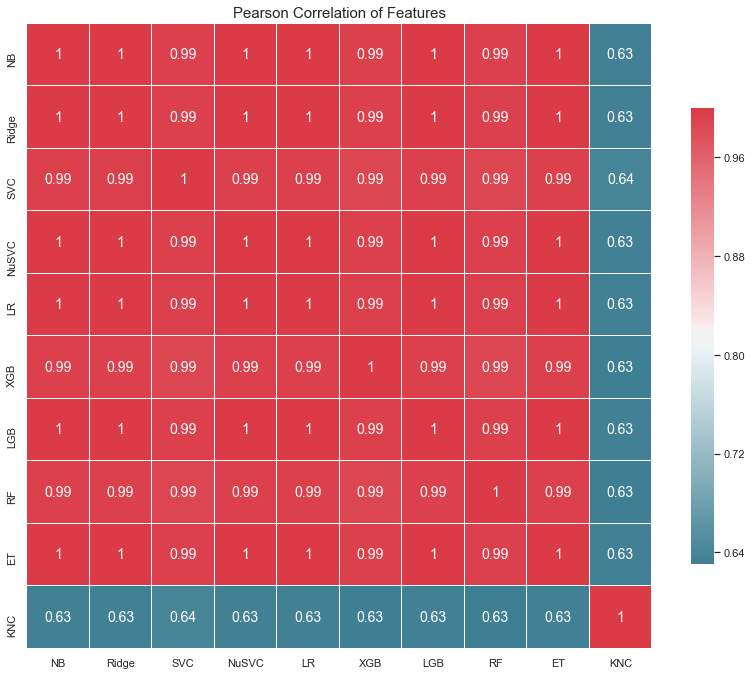

In [261]:
model_name = ['NB','Ridge','SVC','NuSVC','LR','XGB','LGB','RF','ET','KNC']
model_predictions = pd.DataFrame(np.concatenate((NB_oof_train,Ridge_oof_train,SVC_oof_train,NuSVC_oof_train,LR_oof_train,
                                                 XGB_oof_train,LGB_oof_train,RF_oof_train,ET_oof_train,KNC_oof_train),axis=1),
                                columns=model_name)
# model_predictions.head(50)
correlation_heatmap(model_predictions)

# Second-level prediction from First-level output

In [262]:
x_train = np.concatenate((NB_oof_train,
                          Ridge_oof_train,
                          SVC_oof_train,
                          NuSVC_oof_train,
                          LR_oof_train,
                          XGB_oof_train,
                          LGB_oof_train,
                          RF_oof_train,
                          ET_oof_train,
                          KNC_oof_train    
                        ), axis=1)
x_test = np.concatenate((NB_oof_test,
                        Ridge_oof_test,
                        SVC_oof_test,
                        NuSVC_oof_test,
                        LR_oof_test,
                        XGB_oof_test,
                        LGB_oof_test,
                        RF_oof_test,
                        ET_oof_test,
                        KNC_oof_test
                        ), axis=1)

In [263]:
x_train.shape

(614, 10)

In [264]:
temp = pd.DataFrame(x_train)

In [265]:
temp.loc[:,4].value_counts()

1.0    512
0.0    102
Name: 4, dtype: int64

In [374]:
x_test.shape

(367, 10)

In [375]:
Y_normal.shape

(614,)

In [ ]:
# Bayesian optimization for Meta_learner XGBClassifier

space = {
        'max_depth': hp.quniform('max_depth', 2, 20, 1),
        'min_child_samples': hp.quniform ('min_child_samples', 1, 20, 1),
        'subsample': hp.uniform ('subsample', 0.8, 1),
        'n_estimators' : hp.quniform('n_estimators', 50,1500,25),
        'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
        'gamma' : hp.uniform('gamma', 0, 1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.3, 1.0)
}
trial = Trials()
def hyperopt_XGBClassifier(space):
    model = XGBClassifier(n_estimators= int(space['n_estimators']),
                           max_depth = int(space['max_depth']),
                           min_child_samples = space['min_child_samples'],
                           subsample = space['subsample'],
                           learning_rate= space['learning_rate'],
                           gamma = space['gamma'],
                           colsample_bytree = space['colsample_bytree']
                           )
    
    score = cross_val_score(model,
                            x_train, 
                            Y_normal, 
                            cv  = cv,
                            scoring='roc_auc'                            
                           )
    print("AUC Score {:.3f} params {}".format(score.mean(), space))
    return {'loss':(1 - score.mean()), 'status': STATUS_OK}
best = fmin(fn=hyperopt_XGBClassifier,
            space=space,
            algo=tpe.suggest,
            trials=trial,
            max_evals=1000)
print(best)
clf = XGBClassifier(n_estimators = int(best['n_estimators']),
                   max_depth = int(best['max_depth']),
                   min_child_samples = best['min_child_samples'],
                   subsample = best['subsample'],
                   learning_rate = best['learning_rate'],
                   gamma = best['gamma'],
                   colsample_bytree = best['colsample_bytree'])
final_score3 = cross_val_score(clf,
                        x_train, 
                        Y_normal, 
                        cv  = cv,
                        scoring='roc_auc'                            
                       )

print('Cooresponding loss:', final_score3.mean(), sep='\n')

In [269]:
clf = linear_model.LogisticRegression()
cv_results = cross_validate(clf,
                        x_train, 
                        Y_normal, 
                        cv  = cv,
                        scoring='roc_auc'                            
                       )
print('The mean cv Training score:',cv_results['train_score'].mean())
print('The mean cv Testing score:',cv_results['test_score'].mean())

The mean cv Training score: 0.7436017571420688
The mean cv Testing score: 0.7435207902225859


In [271]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

In [272]:
cv_results['train_score']

array([0.73937572, 0.75089521, 0.75261926, 0.74963168, 0.73864892,
       0.74198058, 0.73206094])

In [268]:
clf = XGBClassifier(colsample_bytree= 0.8015108548851223, 
              gamma= 0.08250170313479895, 
              learning_rate= 0.007489280162898703, 
              max_depth= 19, 
              min_child_samples= 11, 
              n_estimators= 75, 
              subsample= 0.9613809231458298)
cv_results = cross_val_score(clf,
                        train_cl[ML_columns], 
                        Y_normal, 
                        cv  = cv,
                        scoring='roc_auc'                            
                       )

print('The mean cv Testing score:',cv_results.mean())
cv_results

The mean cv Testing score: 0.773858830113709


array([0.81674473, 0.75117096, 0.67440476, 0.81419753, 0.85802469,
       0.6882716 , 0.81419753])

In [ ]:
clf = XGBClassifier()
cv_results = cross_validate(clf,
                        x_train, 
                        Y_normal, 
                        cv  = cv,
                        scoring='roc_auc'                            
                       )
print('The mean cv Training score:',cv_results['train_score'].mean())
print('The mean cv Testing score:',cv_results['test_score'].mean())
cv_results['train_score']

In [ ]:
prediction = second_model.predict(x_test)

In [ ]:
prediction